# **Introduction**

**IOS apps info analytics**

The dataset that we have used contains information about apps present in apple store. It has 763831 rows and 19 features It provides information such as app name, developer name, Date of release, Age rating, Average Rating and many more. Each app and developer have their unique id’s. Features in the dataset have numerical as well as object data type. 7 features are numerical 12 are object type.

**To start with the Analysis,**

As a part of pre-processing data cleaning should be done. So, for selecting the features required for the analysis we dropped the column which contained more than 50% of the Null data. ’Seller_Official_Website’ had more than 50% Null values. So, remaining 18 features are used for analysis. We analyzed the relationship between features to avoid redundant information and found that all features are independent of each other.

**The next part is Visualization with graphs and table,**

We also framed appropriate questions to extract meaningful insights into the data. We have used bar graphs, histograms, distribution plots, pie charts, heat maps, comparison tables and pivot tables for easy representation of the results.

**Finally, we have applied Machine Learning models,**

We have applied machine learning algorithm like Linear Regression, Multi Layered Perceptron and Support Vector Regression, where the model will predict genre for the given app based on its description given in the dataset. The model is trained with 60% of the data and tested on remaining 40% data. Model helps in predicting the genre which are missing. 


In [6]:
# importing necessary Libraries
import pandas as pd   #(data manipulation)
import numpy as np  #(array and maths)

# Visualisation Libraries
import seaborn as sns 
import matplotlib.pyplot as plt

# Libraries for Machine Learning implimentation
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [7]:
# some constants
SEED = 42 # random state

### Colulmn specifications
**IOS_App_Id** - The unique IOS app store Id for the app

**Title** - The title of the app

**Developer_Name** - The name of the apps developer

**Developer_IOS_Id** - The unique Id for the app developer

**IOS_Store_Url** - The URL to the web app store preview for the app

**Seller_Official_Website** - The website of the app seller if it was provided

**Age_Rating** - The age rating for the app

**Total_Average_Rating** - The rounded mean of all ratings

**Total_Number_of_Ratings** - The total number of ratings the app has received

**Average_Rating_For_Version** - The average rating for a particular version

**Number_of_Ratings_For_Version** - The total number of ratings the app has received for particular version

**Original_Release_Date** - Official release date and time of given app

**Curent_Version_Release_Date** - Latest version release date and time of given app

**Price_USD** - Price of an app

**Primary_Genre** - principal genre of the app

**All_Genre** - All  genres that are available in  the app

**Languages** - language used in the  app

**Description** - brief description about the app



In [7]:
# Change the path to wherever the file is located 
path = 'D:/IOS_Apps_Info.csv'
df = pd.read_csv(path)
shape = df.shape
print('DataFrame Shape :', shape)

# as the _id column is given by the data creator it can be dropped
df = df.drop(['_id'], axis=1)
df.head(10)

DataFrame Shape : (763831, 19)


,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
0,1224614786,abc - writing style cursive flashcards worksheets,Wattana Kamdee,1.202553e+09,https://apps.apple.com/us/app/abc-writing-styl...,NaN,4+,-1.0,-1.0,0.0,0,2017-04-10T23:00:59Z,2017-04-10T23:00:59Z,0.00,Games,"['Games', 'Books', 'Family']",['EN'],This application helps you practice cursive sc...
1,1111182407,abcForAll,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall/id1111...,NaN,4+,-1.0,-1.0,0.0,0,2016-05-11T02:21:43Z,2019-05-30T07:23:27Z,6.99,Education,"['Education', 'Books']",['EN'],裡面包含三個部分：電子書，我的課本和遊戲。\n電子書\n\n電子書裡有許多種類，包含發音、入...
2,1203161394,abcForAll tw,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall-tw/id1...,NaN,4+,-1.0,-1.0,0.0,0,2017-02-09T03:50:59Z,2019-05-30T07:22:55Z,0.00,Education,"['Education', 'Books']",['EN'],這是abcForAll的免費版，僅提供有限的資料庫。\n\n購買付費版即擁有以下完整內容：\...
3,1257965362,abegs books reader,Arab Bureau of Education for the Gulf States,1.168221e+09,https://apps.apple.com/us/app/abegs-books-read...,https://social.abegs.org/,4+,-1.0,-1.0,0.0,0,2017-11-21T02:06:58Z,2017-11-21T02:06:58Z,0.00,Education,"['Education', 'Books']",['EN'],تطبيق اصدارات مكتب التربية العربي لدول الخليج ...
4,1143009457,aBooks - Sách Truyện Online,Phuong Anh Do,9.585161e+08,https://apps.apple.com/us/app/abooks-s%C3%A1ch...,https://www.facebook.com/abooks.mobi,12+,4.5,202.0,4.5,118,2016-09-07T06:33:45Z,2018-01-17T21:10:42Z,0.00,Book,"['Books', 'Lifestyle']","['EN', 'VI']",aBooks mang lại trải nghiệm đọc sách điện tử t...
5,1469906216,aComic Manga Comic Novel Story,Mong Anh Nguyen,1.440262e+09,https://apps.apple.com/us/app/acomic-manga-com...,NaN,9+,-1.0,-1.0,0.0,0,2019-06-30T09:21:38Z,2019-07-23T08:38:25Z,0.00,Entertainment,"['Entertainment', 'Books']",['EN'],"aComic is an online novel application, always ..."
6,883528624,actmobile,Al Musanna College of Technology,8.835286e+08,https://apps.apple.com/us/app/actmobile/id8835...,NaN,4+,-1.0,-1.0,0.0,0,2014-06-11T04:20:34Z,2018-03-22T22:51:44Z,0.00,Education,"['Education', 'Books']",['EN'],Al Musanna College of Technology Mobile applic...
7,1437233219,Ad gentes,JPM Publications SA,9.977781e+08,https://apps.apple.com/us/app/ad-gentes/id1437...,NaN,4+,-1.0,-1.0,0.0,0,2018-10-02T22:55:13Z,2018-10-02T22:55:13Z,0.00,Book,"['Books', 'Travel']",['EN'],"You have booked your next trip with ad gentes,..."
8,1198931669,adult color anti stress therapy coloring book,Kannika Khunwatananon,1.139140e+09,https://apps.apple.com/us/app/adult-color-anti...,NaN,4+,-1.0,-1.0,2.0,4,2017-01-27T00:55:01Z,2017-02-25T02:35:35Z,0.00,Book,"['Books', 'Entertainment']",['EN'],the best mandals coloring book for adults is n...
9,937284936,aDyslexia,Gameteam,3.568890e+08,https://apps.apple.com/us/app/adyslexia/id9372...,NaN,17+,-1.0,-1.0,5.0,2,2014-11-13T07:47:32Z,2014-11-13T07:47:32Z,0.00,Book,"['Books', 'Productivity']",['EN'],aDyslexia is designed to help people with read...


In [ ]:
# Columns in the dataframe
print('There are', len(df.columns), 'columns in the dataset\n')
df.columns

There are 18 columns in the dataset



Index(['IOS_App_Id', 'Title', 'Developer_Name', 'Developer_IOS_Id',
       'IOS_Store_Url', 'Seller_Official_Website', 'Age_Rating',
       'Total_Average_Rating', 'Total_Number_of_Ratings',
       'Average_Rating_For_Version', 'Number_of_Ratings_For_Version',
       'Original_Release_Date', 'Current_Version_Release_Date', 'Price_USD',
       'Primary_Genre', 'All_Genres', 'Languages', 'Description'],
      dtype='object')

In [ ]:
# Statistics of the data
df.describe()

,IOS_App_Id,Developer_IOS_Id,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Price_USD
count,7.638310e+05,7.247520e+05,763831.000000,7.638310e+05,7.638310e+05,763831.000000,763831.000000
mean,1.139422e+09,9.309664e+08,0.071417,6.022106e+02,4.123308e+01,37.203248,0.455612
std,2.950845e+08,3.735073e+08,2.081239,3.072561e+04,4.429742e+03,917.328513,6.954337
min,2.817365e+08,4.240900e+04,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000
25%,9.890648e+08,5.616837e+08,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,0.000000
50%,1.192633e+09,9.814802e+08,-1.000000,-1.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.392776e+09,1.242220e+09,-1.000000,-1.000000e+00,3.000000e+00,1.000000,0.000000
max,1.488844e+09,1.501334e+09,5.000000,1.203608e+07,2.193230e+06,257689.000000,999.990000


In [ ]:
# The datatype of all the columns
df.dtypes

IOS_App_Id                         int64
Title                             object
Developer_Name                    object
Developer_IOS_Id                 float64
IOS_Store_Url                     object
Seller_Official_Website           object
Age_Rating                        object
Total_Average_Rating             float64
Total_Number_of_Ratings          float64
Average_Rating_For_Version       float64
Number_of_Ratings_For_Version      int64
Original_Release_Date             object
Current_Version_Release_Date      object
Price_USD                        float64
Primary_Genre                     object
All_Genres                        object
Languages                         object
Description                       object
dtype: object

In [ ]:
# Null values in each column (Column containing null values more than 50% can 
# be dropped to reduce the number of features)
df.isna().sum()

IOS_App_Id                            0
Title                             39079
Developer_Name                    39079
Developer_IOS_Id                  39079
IOS_Store_Url                     39079
Seller_Official_Website          452131
Age_Rating                        39079
Total_Average_Rating                  0
Total_Number_of_Ratings               0
Average_Rating_For_Version            0
Number_of_Ratings_For_Version         0
Original_Release_Date             32684
Current_Version_Release_Date      32684
Price_USD                             0
Primary_Genre                     39079
All_Genres                        39079
Languages                         39079
Description                       39080
dtype: int64

In [ ]:
# Datatype for each column and the null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763831 entries, 0 to 763830
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   IOS_App_Id                     763831 non-null  int64  
 1   Title                          724752 non-null  object 
 2   Developer_Name                 724752 non-null  object 
 3   Developer_IOS_Id               724752 non-null  float64
 4   IOS_Store_Url                  724752 non-null  object 
 5   Seller_Official_Website        311700 non-null  object 
 6   Age_Rating                     724752 non-null  object 
 7   Total_Average_Rating           763831 non-null  float64
 8   Total_Number_of_Ratings        763831 non-null  float64
 9   Average_Rating_For_Version     763831 non-null  float64
 10  Number_of_Ratings_For_Version  763831 non-null  int64  
 11  Original_Release_Date          731147 non-null  object 
 12  Current_Version_Release_Date  

In [ ]:
# Unique genres
unique_genres = df['Primary_Genre'].unique()
print('total unique genres',len(unique_genres))
print(unique_genres)

total unique genres 25
['Games' 'Education' 'Book' 'Entertainment' 'News' 'Finance' 'Reference'
 'Business' 'Utilities' 'Shopping' nan 'Lifestyle' 'Music' 'Photo & Video'
 'Travel' 'Sports' 'Productivity' 'Health & Fitness' 'Medical'
 'Navigation' 'Stickers' 'Social Networking' 'Food & Drink'
 'Magazines & Newspapers' 'Weather']


In [ ]:

#print the number of unique values in each column of our dataset
print('the number of unique values in each column of our dataset.')
unique = df.nunique().reset_index()

#nunique returns a series, we have to convert it into data frameunique = df.nunique().reset_index()
unique

the number of unique values in each column of our dataset.


,index,0
0,IOS_App_Id,763831
1,Title,723819
2,Developer_Name,262162
3,Developer_IOS_Id,263979
4,IOS_Store_Url,724752
5,Seller_Official_Website,206455
6,Age_Rating,5
7,Total_Average_Rating,10
8,Total_Number_of_Ratings,9757
9,Average_Rating_For_Version,1951


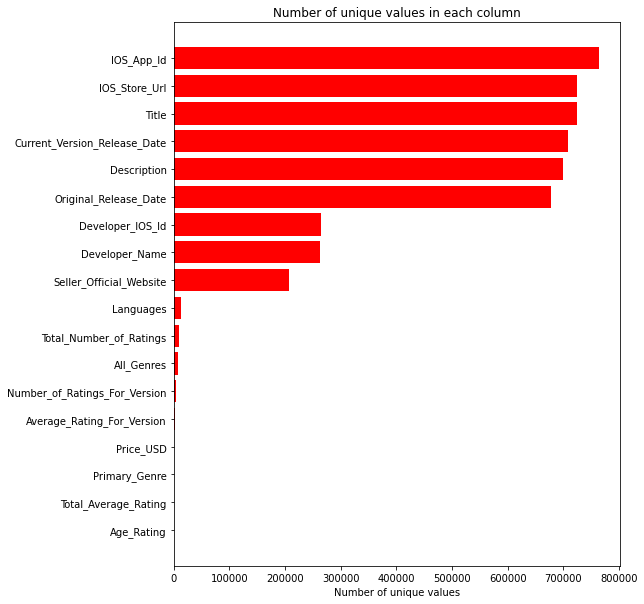

In [ ]:
#a plot of number of unique values in each feature Vs features
unique.columns = ['Feature','Number_of_Unique_Values']
#sns.barplot(x='Feature',y='Number of Unique',data=unique)
unique = unique.sort_values(by='Number_of_Unique_Values')
ind = np.arange(unique.shape[0])
width = 1.7
fig, ax = plt.subplots(figsize=(8,10))
rects = ax.barh(ind, unique.Number_of_Unique_Values.values, color='#FF0000')
ax.set_yticks(ind)
ax.set_yticklabels(unique.Feature.values, rotation='horizontal')
ax.set_xlabel("Number of unique values")
ax.set_title("Number of unique values in each column")
plt.show()

In [ ]:
# Display the apps for required rating
def no_of_apps_of_rating(rating):
    rating_df = df[df['Total_Average_Rating'] == rating]
    print(rating_df.describe)
rating = int(input('Enter the rating: '))
print(no_of_apps_of_rating(rating))
print('There are', len(df[df['Total_Average_Rating'] == rating]), 'apps with rating', rating)

Enter the rating: 5
<bound method NDFrame.describe of         IOS_App_Id  ...                                        Description
17       887460412  ...                                    alMahdi Library
21       814578277  ...  A collection of The Grand Ayatollah Wahid alKh...
39       988673309  ...  Classic Books.  Gorgeous looks.  Dive into the...
102      609526718  ...  Die dealbunny.de App entdeckt für euch die bes...
128     1419671135  ...  Probably you have learnt a lot of words with a...
...            ...  ...                                                ...
763635  1454875483  ...  With Touhou Mix, you can enjoy the familiar me...
763638  1435072313  ...  【Overview】\nThis game is the Fan-Made STG Game...
763750  1355972377  ...  Tower Jumper- One of the most Addictive iOS ga...
763758   965788449  ...  Build the highest tower in the world to reach ...
763802  1294475965  ...  From the creator of Block Invasion comes a new...

[27836 rows x 18 columns]>
None
There are 278

In [ ]:
# Function gives the stats about the specific genre
def genre_stats(genre):
    gen_df = df[df['Primary_Genre'] == genre]
    print(gen_df.head())
    print(gen_df.describe)
genre = str(input('Enter the genre required: '))
print(genre_stats(genre))

Enter the genre required: Games
     IOS_App_Id  ...                                        Description
0    1224614786  ...  This application helps you practice cursive sc...
13   1139526365  ...  aircraft Coloring Book for free game for kids....
14   1143877640  ...  Aircraft Jigsaw Puzzles - one of the most popu...
90   1136750684  ...  coloring abcd game Coloring Book for  kids. Pa...
107   973827628  ...  Wat hoort er niet bij?\n\nIn deze app moet je ...

[5 rows x 18 columns]
<bound method NDFrame.describe of         IOS_App_Id  ...                                        Description
0       1224614786  ...  This application helps you practice cursive sc...
13      1139526365  ...  aircraft Coloring Book for free game for kids....
14      1143877640  ...  Aircraft Jigsaw Puzzles - one of the most popu...
90      1136750684  ...  coloring abcd game Coloring Book for  kids. Pa...
107      973827628  ...  Wat hoort er niet bij?\n\nIn deze app moet je ...
...            ...  ...      

In [ ]:
print('There are', df[df['Total_Average_Rating']<0].shape[0], 'negative values')

There are 598607 negative values


In [ ]:
def english(string):
  '''
  Function takes a string as input and returns True if the language is English
  otherwise False
  '''
  ret = 0
  for char in string:
      if ord(char) > 127 or char == '?':
          ret += 1
  if ret > 3:
      return False
  else:
      return True
    
print(english('?????? ? ???? ??????'))
print(english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english('Docs To Go™ Free Office Suite'))
print(english('Instachat 😜'))

False
False
True
True


In [ ]:
# Language boolean masks
mask_ios = df['Languages'].map(lambda x: 'EN' in str(x))

# Splitting our dataframes to compare them
ios_english = df[mask_ios]
ios_local = df[~mask_ios]

In [ ]:
# Let's check how our fuction performs on ios dataframe, where we have separate language column
print(f"There are {df[(~df['Title'].astype('str').map(english)) & (mask_ios)]['Title'].count()} apps our function defined as non-english when they actually are")
print(f"Out of {df.shape[0]} apps in totall and {ios_local.shape[0]} non-english apps in Appstore dataset")

There are 11074 apps our function defined as non-english when they actually are
Out of 763831 apps in totall and 74110 non-english apps in Appstore dataset


4+               585372
17+               67981
12+               45837
9+                25556
Not yet rated         6
Name: Age_Rating, dtype: int64


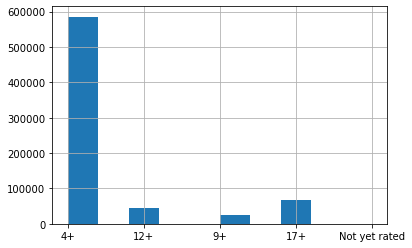

In [8]:
# Distribution of Age rating 
df['Age_Rating'].hist()
print(df['Age_Rating'].value_counts())

In [ ]:
# Let's make function to rename existing content_rating categories
def content(i):
    if i == 'Not yet rated':
        i = 'Unrated'
    elif i == '4+':
        i = '4+'
    elif i == '9+':
        i = '9+'     
    elif i == '12+':
        i = '12+'
    elif i == '17+':
        i = '17+'
    
    return i

In [10]:
ios_4 = df[df['Age_Rating'] == '4+']
ios_10 = df[df['Age_Rating'] == '9+']
ios_12 = df[df['Age_Rating'] == '12+']
ios_17 = df[df['Age_Rating'] == '17+']
ios_unrated = df[df['Age_Rating'] == 'Unrated']

In [11]:
# Drawing comparison table 
print(f"{'IOS':>8} \ {'rating':>20} \ {'reactions per app': >20} \ {'totall apps': >20} \ ")
print('---' * 28)
print(f"{'overall':>8} \ {df['Total_Average_Rating'].mean():>20.2f} \ {df['Total_Number_of_Ratings'].sum() / df['Title'].shape[0]:>20.2f} \ {df['Title'].shape[0]:>20} \ ")
print(f"{'4+':>8} \ {ios_4['Total_Average_Rating'].mean():>20.2f} \ {ios_4['Total_Number_of_Ratings'].sum() / ios_4['Title'].shape[0]:>20.2f} \ {ios_4['Title'].shape[0]:>20} \ ")
print(f"{'10+':>8} \ {ios_10['Total_Average_Rating'].mean():>20.2f} \ {ios_10['Total_Number_of_Ratings'].sum() / ios_10['Title'].shape[0]:>20.2f} \ {ios_10['Title'].shape[0]:>20} \ ")
print(f"{'12+':>8} \ {ios_12['Total_Average_Rating'].mean():>20.2f} \ {ios_12['Total_Number_of_Ratings'].sum() / ios_12['Title'].shape[0]:>20.2f} \ {ios_12['Title'].shape[0]:>20} \ ")
print(f"{'17+':>8} \ {ios_17['Total_Average_Rating'].mean():>20.2f} \ {ios_17['Total_Number_of_Ratings'].sum() / ios_17['Title'].shape[0]:>20.2f} \ {ios_17['Title'].shape[0]:>20} \ ")
#print(f"{'Unrated':>8} \ {ios_unrated['rating'].mean():>20.2f} \ {ios_unrated['rating_count'].sum() / ios_unrated['app_name'].shape[0]:>20.2f} \ {ios_unrated['app_name'].shape[0]:>20} \ ")

     IOS \               rating \    reactions per app \          totall apps \ 
------------------------------------------------------------------------------------
 overall \                 0.07 \               602.21 \               763831 \ 
      4+ \                 0.06 \               472.73 \               585372 \ 
     10+ \                 1.13 \              1190.59 \                25556 \ 
     12+ \                 0.73 \              2314.35 \                45837 \ 
     17+ \                -0.04 \               688.22 \                67981 \ 


In [ ]:
# Creating pivot table for content rating for IOS
table_content_ios = pd.pivot_table(df, index=['Age_Rating'], values = ['Total_Average_Rating', 'Total_Number_of_Ratings', 'Title'], 
                           aggfunc={'Total_Average_Rating':'mean', 'Total_Number_of_Ratings':'mean', 'Title':'count'}, margins=True, margins_name='Overall')

table_content_ios = table_content_ios[['Total_Average_Rating', 'Total_Number_of_Ratings', 'Title']].rename(columns={'Title':'totall_apps', 'Total_Number_of_Ratings':'reactions per app'})
table_content_ios

,Total_Average_Rating,reactions per app,totall_apps
Age_Rating,,,
12+,0.727676,2314.354932,45837
17+,-0.040982,688.224930,67981
4+,0.058431,472.729903,585372
9+,1.128678,1190.588159,25556
Not yet rated,2.083333,1228.916667,6
Overall,0.129188,634.736019,724752


In [12]:
print('Number of unique categories in Play Market:',df['Primary_Genre'].unique().shape[0])

Number of unique categories in Play Market: 25


In [13]:
print('Total apps:', df.shape[0])
print('Free apps on market:',df[(df['Price_USD'] == 0)].shape[0])
print('Paid apps on market:',df[(df['Price_USD'] > 0)].shape[0])

Total apps: 763831
Free apps on market: 649376
Paid apps on market: 75263


In [14]:
print('there are', len(df[df['Average_Rating_For_Version']<0])+len(df[df['Average_Rating_For_Version']>5]), 'wrong values in average rating')

there are 294048 wrong values in average rating


In [17]:
year=input("Enter the year:")
y=list(df['Original_Release_Date'])
t=list(df['Title'])
#print(y)
s=[]
j='';
for i in y:
  #print(type(i))
  j=str(i).split("-")
  s.append(j[0])
#print(s[5])
for i in range(len(s)):
  if year==s[i]:
    print(t[i])

Enter the year:2019
aComic Manga Comic Novel Story
aiat audio
andisk学习盘
ayscan
bcontract
biblioUPO
bookapa
bookWithMe
bREADER Cloud
cBook
chatprint - Chat Buch
dawratyCenter
dF - Die Fachwelt GmbH
dogeared.app
dream meanings 2019
e-BooksEasyStore
eBieb
eBook EIT.swiss
eBook Library 2
eBook Maker + X
eBook Maker Pro + X
eBookBazaar
eBooks - Adobe Reader & Story
eBooks - Kho Sách Online
fairy tale book, kumoncho
farsamooz
featherfall - text stories
fReads
glory to glory devotional
grau blau miau
hoc ngoai ngu hieu qua
hondana
iBiology
iCalibre
iCool Quran Radio
iEman
jElearning - Japanese Online
jKana
johnKeatsSelectedPoems
justeng
k2cart_Books
karen hymn
kawebook
koopl
linguista
madReader
meditations
miniRAINBOWS - Learn to Read
myDbook
myfan.ai for 조아라
myQuote Bible
one more layer
peep - Chat Story App
phone numbers
polyplot
project worm
rapLector
saanrize -African Kids Content
senzaLIBRO
stockholdingdms
study photo
thien sieu toan tap
thien sieu toan tap ipad
viyan
weChurch
word互动教程
z

Danielle Norman Romance Author
Danışan Kitab
Darse Nizami
Darshanam
Das Neue Testament
Dasubhashitam Vidya
Data Structure Display
DatiBooks
Daytona Beach Ocean Towers
DbApp!
DbookEasy
DBV-Merkblätter
De hond van Baskerville
De reizen van Gulliver
De waanzinnige skivakantie
De wonderlijke tovenaar van Oz
DEAD CITY Text Adventure Lite
Death Within Earshot: Bose AR
Decision Fiction
Decodable Readers L1 Sample
Decodable Readers L2 Sample
Decodable Readers L4 Sample
Deerlet
Deja Review: Pharmacology, 3/E
Der Borro Medien Kiosk
Der gestiefelte Kater AR
Der kleine Prinz Hörbuch
Der kleine Vorleser ©
Dermoscopy Criteria Review
DeRose e-books
Ders Planım-Kazanımlar
Des Dreams AR Book v.1
Destiny Read
Learn German A1 A2 B1 B2
Deutsch Luther Bibel (1912)
Devotional Bible -MultiVersion
DGMS 2019
Dhamma IAS
Dhamma Payeik
DHOHA Magazine
Diabetes UK Events
Dialogs: fiction chat stories
Diccionario Biblico Cristiano
Dictionary English
Dictionary, Voice Translator
Dictionary-Offline
Didan Magazine
Die 

Naučite Bosanski Njemački
Naval Library
Navodaya vidya mandir
NDC Ministry
NDIA AR
Nebraska NG Family Programs
Nepali Bible Offline
Nepali Bible*
Nepali Christian Songs
Nepali Phrase
NerkNovel
Nethra domain
Netread
NEU Reader
New American Standard Bible
New Birth Atlanta
New City Katechismus
New HOC VAN HAI
New Horizons Myanmar
New HV BA
New HV MOT
New HV MẪU GIÁO
New King James Bible version
New Living Translation Bible
New MAM NON
Newcastle’s Best: Travel Guide
NewEdu 4 IEF Tech in Focus
NextOFF
NG Transportation
Ngaahi Hiva
Nghe Đọc Truyện
Ngôn Ngữ Ký Hiệu
Ngôn tình online - offline
Ngā Pae
Nigeria History
Nihol
Nirvaan Gyan
Nitelik Yayınları
Nitnem
Nitnem Paath
NIV Bible - Bibleall
NOBLE Libraries
Noen
Noisy Book
Noorani Qaida with Audio
Northwood Elementary
Not-BOSS
Notebook نوت بوك
Notebook: Write Notes & Secure
Noticeboard App
NOTIFIQ Método TRON
Notre Dame Academy
Novecento-La Puglia in Guerra
Novel Bag
Novelly
NovelMate
NovelToon-Novels Updated Daily
Nox. Through consciousness

Viva Sanchita Class 5
Viva Sanchita Class 7
Viva Sanchita Class 8
Viva Start Up Science Class 7
Viva Start Up Science Class 8
Vividbooks
Vize E-Okuma
Vlieg mee met Peter Pan
VMangaX
VNBET
VND-Shopping
Vocably: A Vocabulary Library
Vocabulary via Story - EngZero
Voice Aloud Reader
Voiz - Audiobook & Podcast
Voiz Hangoskönyvtár
Volfyirion
Volume of Excavation
VoxBook
VOYAGES by KARENA LAM
VU biblioteka
VUCX
VVBook
VZ Expresate Lector A Unidad 2
VZ Expresate Lector B Unidad 2
VZ Expresate Lector C Unidad 2
VZ Expresate Lector D Unidad 2
VZ Expresate Lector E Unidad 2
VZ Expresate Lector F Unidad 2
VZ Expresate Lector G Unidad 2
VZ Expresate Lector H Unidad 2
VZ Expresate Lector I Unidad 2
VZ Expresate Lector K Unidad 2
Waar is de kaas?
Wadny-Driver
Wahrheit oder Pflicht - FUN XL
Wahrheit oder Pflicht - Gay
WALKYTALKIES
Wallachia
Warren-Newport Public Library
Warriors Characters
WaWaYaYa JoyReader Pro -学汉语学华文
Wayne Clark's Classes
WebRead
WEC India Energy Handbook
WeComics
Weekend en Beauj

iDeliverd Driver
idenfit - time & leave
iDENprotect
identity autoID
identity Scanner
idibu
iDigitalQ8
iDirector
ido.kiwi
iDocsWeb Family
iDocuments 5
iDoklad
iDriveYourCar Drivers
iDrop
iDrop - Job Site Delivery
iDrop Dropper
iDS Organizer
iduven
iESS Innovation
iEx Trader
iexPbx
iExpress Wholesale
iF Chile
iFast Hospitality
iFeet
iFibre
iFinca
iFings - NIQ
iFleet Africa
iFleet Delivery
iFleet Vehicle GPS Tracker
iFly Sikorsky Performance S-70
ifm mobile
iFollow
iForsyning
iFScanner
iFuel Solutions
iFundi
iGaming Business
iGB Affiliate
iGB North America
iGen Scheduler
iGente
iGeree
iglooworks
iGlow Studioz
iGM
ignite 2.0
iGO Air Ticket
iGO Anywhere
iGoalZero
iGoo Ofertas
iHACapp
iHAULIT DRIVER
ihbarVeKidemTazminati
iHEA 2019
iHello
iHobbs Hair And Beauty
iHome Search
iHonestly
iHoreca App
ihost.bz
iHQMobile
iHRP.Hei
iHusky.com
iikoDriver
iInspectit-Easy Inspection App
iiotsys™ IoT Switch
iisal
iJob Jober
ijobs.shop
iKarat
iKarrz
ikasDisplay
ikasPOS
iKcon Communicator
iKcon Telecom
iKFP

Achievo
Achina
Achou Angola
ACI Convention
ACI Events
ACI Jacarei Mobile
ACIA Salto Mobile
ACIBC Action Days
ACIEM
ACIF
ACIM
ACIST Pulse
ACK2019
Ackerchef
Ackley-Peters-Haubert Online
ACLEDA Authentication
Aclub Achab
ACME Cargo Track And Trace
Acme Point of Sale
ACME TAEKWONDO
Acme Universal
ACMetrix
ACN YEG Business DIrectory
ACOAIH
Acosta Go
ACOT
ACP Advanced
ACP Fire & Security
ACP Lite
ACP Productions
ACPE FCU Mobile
ACPI2019
ACQ Congrès
Acquire Chat
Acquire Reviews
Acquire3D
ACR Events
ACR Ticketing
ACRide
Acromegaly Conference
Acronis Events
Across Express
Across Express Driver
ACROSS Magazine
ACRP 2019
Acryl Client
ACS 2019
ACS Customer Conference
ACS School Partnerships
ACSA 2019
ACSA Madison
ACSC Connect
ACSD 2019 Wheaton
ACSEP 2019
ACSESS 2019 Conference
ACSESS 2019 Conference (FR)
ACSP
ACSZ Partners
ACT - Expertise technique BTP
Act 20/22 Residency
ACT Advisors
ACT Events Portal
ACT Executive Weekend 2019
ACT Forum
ACT IDN
ACT Middle East 2019
ACT MY
Act2Impact
ACTBE Horie


Agwan Motors
Agylia Microlearning
Agência Sisters
Ahad
AHAHVet
AHBA
AHBS
AHC Scottsbluff
AHCA Convention
Ahead Hair
AHEAD OSMA
AHF 2019
AHF Annual Conference
AHIC 2019
AHKsmart
AHL-ALEBEL
Ahlan by Al Hilal Bank
Ahli Store | متجر أهلي
AhluPos
AHMP 2019
AHMV
AHOC Pets
AhorroSBS
AHPI Vet
AHSAA Conferences
AHSV
Ahter
AHTKY Insurance Agency App
AHVAP Events
AHVMA Events
AI Assistant
AI Business Card Generator
AI Conference
Ai Everything
AI Insights
AI Paris 2019
Ai 名片
Ai-Fi Central
AI-FM Customer App
AI-FM Field App
Ai-macro  알림이
AIA Conference on Architecture
AIA Constellation
AIA Florida Info
AIA-AR Convention
AIAC18
AIAED-AI+智适应教育峰会
AIB Contractor
AiBB All-in-one Crypto App
AIBLE: Job Search
AIC 2019
AICA Mobile App
AICD Passport
AICR 2019 Research Conference
AID2019
AIDAF
AIDC 2019
AIDC Summit 2019 -Rajiv Jaitly
Aider
AIDO signer
AIE Conference 2019
AIESL Safety Management System
AIF - Les Ateliers
AIFEC
AIFThePlatform
AIHce EXP
AIHM Annual Conference
AIIB Event
Ailyra IoT
AIM Mobile
AI

Anmol Jewellers Karigar
Anmol Trade
ANN HOST
Anna Grois
Anna Kock - Catalogo
Anna Kukjane
Annak App
AnnaWholesale Hàng Úc Xách Tay
Annette Translator
Annex Cloud
AnniList Inspector
AnniList Mobile
Annistaff E-Timesheets
Annsborough IPS
Annuaire Technopark
Annual AppRaisal
Annual Conference 2019
Annual Radiology Meeting (ARM)
Anoloc
Anoloc Conducteurs
Anonymous Wallet
Anote
Anousith Express
ANOVI
ANP 360
Anpa Gross
Anpei 2019
ANREV Events
Ansa Care
Ansar Smile Bahrain
Ansar Smile Qatar
Ansar Smile UAE
AnswerOn
AnswerRocket
Ant Queue
Antara Warga
ANTDEL
Antea Trabajador
AnteaCheckIN
Antelope eNameCard
Antelope Enterprise MDM
Antena Imobiliária
Antenna Workshop
Antex Shamlany
AnthemGold
Anthony D. Castelli Injury App
Anton Neier
Antonia SIP VoIP Dialer
Antsig
ANU Open Day 2019
Anuario Latam
Anunturi UK
Anushree
Anvi Service Tracking
Any Service - أي خدمة
ANY WIDGET - mobile dashboard
Anycar - Đại lý
AnyConnect Smarter Camera App
AnyDeal: RealEstate
AnyIdea
Anyon App
AnyPay MY
Anysa
AnySer

Ashoka European Changemaker
ASHS 2019
AshSolutions Metronome
ASHT 2019
Ashurst Partners Conference 19
ASI Mobile App
ASI Show Chicago
ASI Show Fort Worth
Asia Clean Energy Summit 2019
Asia Door
Asia EDX
Asia Pacific Career Conference
Asia Risk Congress 2019
Asia Video Summit
Asian Actuarial Conference
Asian-African Chamber (AACCI)
AsianOne HRMS
Asil Grup Otogaz
Asimsen
Asinte
ASIPI Lima 2019
ASIS - Mobile Engagement
ASIS Europe 2019
ASIS NYC 2019
ASIS Workforce
Asistir Servicios
Ask ADOIT (Early Access)
Ask ADONIS (Early Access)
Ask Experts
ASK Health
Ask HiM!
Ask Sika
Ask Your HR
Ask4 Partner
Askbrake
Askelma
Askersund Bostadsapp
AskHR Belfast
AskingApp
AskmeLeb
AskMePass - Password Manager
ASKOAS
AskUrbanZoom
AsliZyka
ASLP Healthcare Suite
ASM2019
ASME ASM 2019
ASMIC 2019
Asmus Farm Supply
Asnani Store
ASNC 2019
ASOATT
Asociación Júndiz
Asociado Godiz
ASOFIA Events
ASOPRS
ASP Conference 2019
Aspen Audio Key
Aspen Auto Clinic Service
Aspen RxHealth
Aspen Tour
AspenUC
ASPEXS
Aspira Cre

B2B Offline Rochy
B2B Sales & Marketing Exchange
B2B Wholesale Clothing
B2BSoft POS
B2Gnow 2019 User Training
B2make
B2OCRM
B2Rent
B2W Inform
B32 Play
B3App
B4B:BuyforBlacks
B4Dealer: Bid Used Cars
B4WEDO
B84 Store
BA Simulation
BA Transfer
BA-Cube TV
BAA Marketplace
Baater
Baazr
Bab Rizq Jameel Careers
Babagro
Babagro Driver
Babagro Store
Babalooba
Babel Street
Babel Universal Translator
BABO
Baboon Driver
Babor Malaysia
Babs
Baby Coming
Baby-App
BabyCareKh
Babymall And Care
Bac Si Oi
Bacapp
Bacapp Proveedores
Bacca TeamBook
Back Pocket AR
Backbook Capture
Backstage from Ticketmundo
Backstreet Bites Tracking
Backyard Oasis
Backyard PI
BacMetall - Sell your catalyst
Bacon For Business
Bacon Insurance
Bacon Work On-Demand
Bada Business
Baddelni
BADDY
Badgemeister
Badi Community
Badi Pro
Badi Pro Plus
Badminton helper
BADS Conference
BAEMIN Merchant
BAEMIN Rider
Baeza 2019
Bagdar
BaggerIJ melder
Baglioni MetricS
BAGP
Baheya App
Bahrain Society of Engineers
Bahri
Baic Iraq
Baikingu Report

BGW KongressApp
Bgz Takip
BH Convey
BH Group Home Radar
Bhagvati Coal Movers
Bharat Jain
Bhawani Plywood
BHBFC
BHCCU Business Mobile
BHCustomerApp
Bhel House
BHFL - Homes and Loans
BHGE Annual Meeting 2019
BHGRE Brand Events
BHIM UCO UPI
Bhima Gold Tree
Bhive Event Organizers
Bhive Events
BHONSTYLEZ
BHP Insurance
BHS GO HIRE
BHS Optima
BHTAPP
Bhutan Post
BI
BI Campus Stavanger
BI Dashboard VZ
BI WORLDWIDE EMEA Events
BI-OTG
BIAMICON
Bianchi Participações
BIAS – Brazil Int’l Apparel
BiAssure
Biała lista podatników VAT
Bibit - Investasi Reksadana
Bibliothekartag
Bibul Kurye
Bibul Sipariş Takip
Bibul Yemek
BIC Factory
BIC Innovation Project Logger
Bickle Insurance Online
BICO.
Bicobit - 시작이 다른 혁신적인 암호화폐 거래소
Bid & Build
BID Alumnat
Bid n Buy
Bid Newsletters - Tra cứu thầu
BidaBids
BidBaxter
BidCoz Snap
Bidder AUCTIONS LIVE
BIDDING WARS APP
BIDEC 2019
BidFX Trader
BidoBido
Bidstation
BidStream
Bidwonder futár
Bidwonder partner
Bidxpert
BidXprt
Biella Pizza
Bienal do Livro Rio 2019
Bienvenue

BTreino
Bts - Group chat fun
BTS Events
BTS Top Up App
BTT Lawyers
BTZ Merchant
Bubb Insurance Online
Bubble Teath
Bubble Time Car Wash
Bubbles & Bows Pet Services
Bublup
Buck-e
Bucket Tracker
Buckeye Fasteners Company App
BuckleBath
Buckler XP
Bud Meow Fleet
Budapest Luxury House
BUDDEY
BUDDEY Man
Buddey Merchant
Buddha
Buddy
Buddy Delivery
Buddy Performance
Buddy Rider
Buddy帮帮
Budget planner - expense track
Budgeting & Business Planning
BudSpace
Bueno Malves Advogados
Bueno Student
Bueno Teacher
BuffIndia Scanner
Buhler PolyOne
Build IT 2019
Build The Americas
Build Ultra
Build Zone
BUILD-IT Mobile
Buildapart
Buildary.Online
Buildboard App
BuildBook
Builder Advantage
Builder Lynx Mobile Tools
Builder99
BuilderBase
Builderbox
BuildersMART
BuildHome
Building Brave
Building Holland Match & Meet
Building Stack - Tenant Portal
Building the Future
Buildings Mobile
Buildingz Office
BuildIt Mobile
BuildITs
BuildITServices
BuildMost
BuildNext Pro
BuildOps
BuildPro Responsive
Buildr Constructi

CDB Banco RCI
CDC Procurement
CDD · Next
CDGpay
CDI Today
CDISC
CDJApp.
CDL Líderes
CDL Practice Test Master
CDL Practice Test.
CDLApp
CDP Advisory
CDS Chauffeur App V2
CDS Midwinter Meeting
CDSCMobile
CDSMobile
CDVTC – Car Driver VTC
CDW SMARTtracker
CDX Visitors
CE 2019
CEA Transportation Conference
CEALECT ME
CEAT ASSIST
CEATEC 2019
CEB Care
CEBASmobi
CeBiM - cosmetics
Cebod Telecom Softphone
Cecil College Mobile
Cecily Clune AR 2.0
CED Greentech Connect
CEDA Events
CEDAP Outils
Cedar Brook
Cedar Grove Animal Hospital
Cedar Hill Marketplace
CedarFix
Cedes Shop
CEE Investment Conference
Ceewi
CEFLI
Cegos Opale
CEH Exam Prep
CEIBS European Forum 2019
CELA Global Network Summit
Celebration of Hope
Celebrino
Celebrity Shoutouts
Celebrity Spa & Salon
Celebrium-X
CelebVue
CelebVue Example App
Celenia's Friendly Ride
Celerion Participant Pay
Celiance
Cell Access
Cell Access Pro
Cell Site Registration USA
Cell Trade
CellBadge Facility Access
Cellocator iDrive
Cellofane
CellOn
CellOn Provide

CIPFA Annual Conference 2019
CIPP ACE 2019
CIPP Data Logging
CIPR 2019
Ciprianni Pizzas
CIPS Simulador
Ciputra Information System
Circal
Circl Application
Circle C Auction
Circle Connect Merchant App
Circle Connect Mobile App
Circle K Bilvask
Circle K Event app
Circle of Wealth®
Circuit for Teams
Circuit Zolder
Circular Studio
CIRE19LUX
CIRED 2019
CIREParis19
CIRI Annual Conference
Cirrus
Cirrus Wealth
CIS Experience
CIS QR Scanner
CISA Mastery Test Prep
Cisco eStore App
Cisco Intersight
Cisco Partner Club 2019
CISD
CISES
CISI Bolduc
CISM Mastery Test Prep
CISM Test Prep.
CISSP Mastery Test Prep
CISSP TEST PREP
CISV Brasil
CITCOR
CITE Conference
Citec TwentyFive
CITGO LubeAlert
CiTi Real
CITICOVER USER
Cities Agent
Cities Today Institute
CITIMUBER ONESHOP STORE
CITIMUBER PROVIDER
CITIMUBER USER
CitiPanda 2.0
CitiPOS Kitchen
CITiS
Citiscape: NYC DOB Alerts
Citiwrks Streets
Citiykey Directory
Citizens S&L for iPad
Citizens S&L of Leavenworth
CITRAS - 360 Law Group
Citrus Alert
CITRUS BI


Confluence 2019
ConfluxOne - todo list sorted
CONFORMiT® Control
Confratute 2019
Confusion Corner
Conférence Londres
Congo Agenda
Congres Handhaving en Naleving
Congreso 10MMXM
Congreso Abogacía
Congreso ADECI 2019
Congreso Alacero
Congreso ALSUM Guayaquil 2019
Congreso APLU
Congreso CIDE 2019
Congreso Hoteleros
Congreso Jurídico ICAMALAGA
Congreso Parques 2019
Congreso Psicología Colombia
Congresso Abitrigo 2019
Congresso BRASPEN
Congresso Cefaleia 2019
Congresso de Diabetes 2019
Congresso de Oftalmologia USP
Congresso Fenabrave SC
Congresso IBAP 2019
Congresso IBDA
Congresso Mão 2019
Congresso SAE BRASIL 2019
CongressoAço2019
Congrès Cinov
Congrès des Mousquetaires 2019
Congrès RH 2019
Congrès Unifor 2019
Coniben
Conjoint Analysis
Conmodum
Connect (X)
CONNECT - CrewLounge
Connect AI
Connect Bazaar
Connect by Lumi
CONNECT BY SG GUINEE
Connect Communities
Connect Conference
Connect Dez Sapore
Connect ERP Mobile
Connect IT Event
Connect Labs
Connect Lyncros
Connect Mobile - Gestor
Conne

DCall
DCC Sales
DCDial: Auto Dialer & SMS
DCE掌上通
DCFI APP
DCG Conference 2019
DCH Toyota City Dealership
DCIIA Events
DCM Portal
DCM数字化触点管理
DCNet Digital
DCNPL Hills Vistaa
DCS DSS
DCX - Digital Summit
DCX/IFRA Expo 2019
DD Business App
DD Calculator
DD Delivery Samui
DD Drivers app
DD Sport
DDC CTS Student
DDF Summit
DDNS Vizeo
DDT Wallet
DD订-商务娱乐一键订
De Boa
De creatieve kappers
De Eland De Zon
DE Expo 2019
De Haan Crew
De Heus MM Feed Order App
DE Insight
De klussen
DE LA MORA Conferences
De Lantaarn
De MakelaarsApp
De West Wind Nigeria
De West Wind Nigeria Driver
De Wissel Hoogstraten
DE-Brands
DEA CONSEILS
DEACOM DISCOVER
DeadMouse
DeadStock Search
DEAL Exhibition
Deal KSA
Deal KSA Merchant App
Deal Room
DealatCity / ديلات سيتي
Dealcentive
Dealdone
Dealer App Center
Dealer Connect 360
Dealer Hub App
Dealer Intelligence Mobile
Dealer Loan Calculator
Dealer Maintenance
Dealer Meeting 19
Dealer Messenger
Dealer Mobile
Dealer Week
Dealer-Connect
DealerInfoWeb
DealerSA
DealersCircle Comp

Dipendenti in Cloud
Dipendo
Diphyc
Diplo
DipuPay - Diputación de Cádiz
Direct Auto Mall Rewards
Direct B2B
Direct for Business Customers
Direct Freight Driver
Direct Hotel
Direct Local
Direct Portal
Direct Relief - Data Volunteer
Direct Selling Pro
DIRECT ZZP
DIRECT-TX
Director Doctors
Director Mobile 18 for iPad
Director Mobile 18 for iPhone
Directway Recruitment
Direktiva Access
Direktvertrieb Steiermark
Diretório Sitec
DIRK 2019
DirtBid
DIS SP Z O O PROJEKTOWANIE
Disappear Dents Mobile App
Disastex - Disaster Experts
Disciples of Christ - GA
Discocil Accesos
DiscoEat - Partner Platform
Discount Selector
DiscountByHour-Business
Discova
Discover H&B
Discover Membership
DiscoverLink
Disef App
DISGÁS
Disha 2019
DishGo Driver
DishGo online food delivery
Disk Água Aquavita
DiskReparo Cotação
Disney LA Screenings
Disney Stars Disneyland® Paris
Dispatch.City - Dispatcher
DispetcherskayaStudent
Displai Commercial
Displai Homes
Displai Onsite
Display Week 2019
DisplayNote App
DisplaySweet Liv

Early Warning Europe
Early warning indicators
EARMA 2019
Earn A Living
Earnhardt Toyota
Earnings Season
Earp Expo
EARSLite
EAS Alert Management
EAS Scanner
EASA 2019 Convention
EASECOX GROUP
EaseFix
EASFAA 2019
EasiFixx Provider
East Atlanta Vet
East End Foods
East Kilbride Credit Union
East Maitland Conveyancing
East Pottawattamie County 4-H
EastCoast Check-in
EASTEC
Eastern Analytical Symposium
Easterns Automotive Group App
Eastman Credit Union Business
Eastman Good for Good
Eastside Home Search
Eastside Homes for Sale
Eastwind Polyphone
Easuni
Easy Asset Manager
EASY CABZ Driver
Easy Cap Rate Calculator
EASY Customer
Easy Eats Courier
Easy Event Check-in
Easy Inventory
Easy Invoice Pro - PDF export
Easy Meeting
EASY Noise Control AR
Easy One 360
Easy Park - Parking Management
Easy Parts Egypt
Easy Photo Reminder
Easy Scanner Camera to PDF
Easy Scroll
Easy Settings
Easy Sign
Easy SME
EASY STUDYING
Easy Taxi Nepal
Easy Taxi Nepal-Driver
Easy Technician V
Easy Travel Shop Corporativo
E

Engage CRM
Engage Events
Engaged Communications Encom
EngagePlus
Engagex Appointments
ENGaiGE 2019
Engaz CRM
ENGIE Carsharing
ENGIE DMAN
Engie DMAN Maintainer
Engiexpo Industrial Expo
Engine
Engine 8 Media
ENGINE SHARK
Engineer Seals
Engineering Career Center
Engineering industry 4.0
EnglishCon
EngMark – App bán hàng online
EngMotor SG
Engst Lackierzentrum
EnGuard Box
Engway
Engway Credenciado
Engy.Buy
Engy.Courier
Engy.Customer
Engy.Service
Engy.Vending
Engyj
Enid AgChex
Enid Business AgChex
Enjiz
Enjoy Bus Rome
ENKA Online
Enkel
Enkidu Business
ENL Clients
ENL Sitters
Enlace COPEC
Enlightened Monk
Enliven Event Connect
Enorpa Smart
EnOS 2.0
Enovents
EnPOS b2b
EnPOS Promo Mobile
Enqlare
Enquire CRM
Enquirypro
ENR Global Best Projects
ENR GWIC
Enrich Insider
Enrollink
ENS Recruitment
ENS Tracker
EnsembleIQ - Events
EnsightPlus
ENSIS MetricS
Enspire
Enspire Conference 2019
Enspire HR
Entegra Coach Sales Tool Kit
Entegra Purchasing IQ
EnterBubble
Entergy - Climbing Higher
Enterprise Post

Eyears
EYECAM Security
Eyedius Pass
Eyefficiency
EyeLearn
EyeLevel: The Team OS
EyeSite
EyewearUruguay
Eyewitness Maintenance
Eyrus Visibility
EZ Consumer
EZ Fix Partner
EZ Home Inspection Software
EZ Invoice - Simple Invoicing
EZ LYNK ELD
EZ Merchant App 2
EZ Provider
EZ Register
EZ Salon Checkin
EZ Stock from Encompass
EZ-AC Tech
EZ-APP
EZ-Parts
EZAR
EZB CEO
EZBitex
EzCheckuser
EZCS
Eze Shoring
EZECOM
EZG GustoAPP
EzGED 3.3
EZGO MY
EZHire App
Ezi Loads Australia
EziTrack Mobile App
EZJobs Local PartTime Seasonal
EZLead
EZLynx AgentLynx Conference
EZMAX SG CRM
Ezmo Dental Clinic
EZMR
EZON
EZPartner Mobile
EzProcure
EZPrompt
EZQuality
Ezra Coaching
EZreward
EZSportsRP
EzVz
Ezy Clean
EZY EDU BIZ
Ezy Suvidha
EZYBook BIZ
EzyBooker
Ezylead
EzyPOS
EZZM 3.0
E企碰碰
E店运营
E贸通
F Business
F Drivers
F Rehab
F&B Easy Menu
F&B LA 2019
F&B NY19
F&C Intranet
F&D Woodfired
F&F Finstagram
F&M Bank Remote
F&M Bank — Mobile
F&M Bank — Tablet
F&M Mobile Remote Deposit
F-gas Invio CamereCom
F-Secure Events
F.

Fingrowth Mobile
FinHero
Finhub
Finhub Mobile
Finishing Industries Forum
Finlo - For Business
Finlog Carsharing
Finndent Designer
Fino - Sửa chữa 5s
Finoa
Finodex Copy Trade
FinPocket
Fins Car Wash
Finstar.Online
Finstone Partner
FinSusApp
FinTech Abu Dhabi
Fintelekt Asia AML/CFT Summit
FinteXploration
Finutive Projects
Finvoice
FINWAVE Smart Office
FINWAVE Trade
FinWhiz
Fio Smartbanking CZ
Fio Smartbanking SK
Fiore and Sons, Inc
Fire Business
Fire Codes Compliance, LLC
Fire Notification
Fire Stick TV Remote
FireDoor Safety
FireEye Helix Mobile
FireFirstVideo
Firefly Driver App
Firehawk
Firehouse247
FireLive!
FirenzeBio
FireRock CC
Firestorm Route
Firethorn WP
Firm Retreat 2019
Firma jako tým
Firmadan - Firma İlan Sitesi
FirmaM
FirmDash
First American Bus Deposit
First Atl App
First Bite
First Call 247 Ltd
First Class Legal
First Commercial Bank TX
First Commercial TX for iPad
First Deposit
FIRST Events
First Express Insurance
First Financial Mortgage App
First Florida Bank for iPad
Fi

Fred Mobile Contract
Fred Mobile Transport
Fred Mobile Yard
Freddie's Family Market
Frederick Douglas Apartments
Frederick Mmieh
Free Form Minds
Freeance for Cityworks 7
Freedom Bail Bonds TX
Freedom Care HHA
Freedom Cores LLC
Freedom From Laundry
Freedom Live
Freedom Mobile Access
Freegy Business
Freelance Africa
Freelance Invoice
Freelance Paris
Freelance Portal
Freelancer - Orders to Invoice
Freepay
FReeStart Platform
Freight Book
Freight Control Management
Freight Density
Freight Tiger
Freight Trust
Freight Waiting List
FreightBro
FreightCheck
FreightClock
Freightera
Freightliner of St. Cloud
FreightMate
FreightOn | Book your load
FreightPath Driver App
Freights - Exchange Platform
FreightWise
Fremap Works
Fremont Motor Service
French Fab Tour
French Florist Flower Delivery
FrescoFud
FrescoFud Delivery
Fresh Forward
Fresh Life Floral
Fresh Mobile
Fresh N Clean Laundry
Fresh Tasks 2.0
Fresh To Go
Fresh Up Mattresses
FreshBankPro - 프레시뱅크 프로
FreshCheq
FreshchowDriver
FreshchowRestaura

Glesga Grub
GLH
GlidAR
Glitter Chimp
GLN - Global Logistics Network
GLNK Meeting 2019
Glo Caribbean
Gloauto
Global Aviation Track & Trace
Global Beauty
Global Business Forum 2019
Global Care
Global City Hackathon
Global Cold Chain Expo 2019
Global Contracting Services
Global Dial
Global Dismissal App
Global DIY Summit 2019
Global DX Summit
Global Equity Organization
Global Excellence Awards
Global Executive Cars
Global EXIM
Global Fintech
Global Gathering 2019
Global Gender Summit 2019
Global Goals BusinessNavigator
Global Grain
Global Halal Industry
Global House
Global Impact Team
Global Ironing Deliveries
Global Kongu Foundation
Global Laundry
Global Leadership Conference19
Global Leadership Sales Summit
Global Legal Summit 2019
Global Lines
Global Live Eye
Global Magazine
Global MU
Global Offset
Global Oiler Lite
Global Pass
Global Permits
Global Prosperity Solutions
Global Protein Summit 2019
Global Response Center
Global Secbase
Global Security Summit 2019
Global Stroke Alliance
G

HD 2019
HD CPD
HD SalesBook
HD Salon and Spa
HDA Pro Portal
HDAYA
Connect - HDC
HDFC Udaan
HDFleet
HDI Events
HDI Mobil
HDKOT
HDMA
HDPRO Mobile
HdsVatandas
HDVision Mobile
Head Changerz
Head to Tail Vet Hospital
Head Tâm Anh
Headgrower
HeadLight Materials
HEADO.Управление
HeadSnHead
Headsoptics
Healife
Health & Care Day 2019
Health + Care
Health Coach Institute Events
Health Justice 2019
Health Products
Health Safety App
Health4You Australia
HealthBenefitApp II
Healthbridge Job Portal
Healthcare Internet Conference
HealthCheckPerfectStore
HealthDataSpace
HealthGigJobs
Healthjobs4U Job Search
HealthLock
Healthy Fish
Healthy Paws LLC
Healthy Workers
HealthyMe
HealthyTeen19
Healy Group Online
Hearsay Relate for Blackberry
HEART 9/11
Heart Conferences
Heart Lake Insurance Online
Heart Ocean Owner
Heart of Chelsea Vet
Hearth Connect
Heartis
Heartland 24/7
Heartland Customer Display
Heartland Foods
Heartland Kiosk
Heartland Register
Heartland Restaurant
Heartland Time Clock
Heartland Time Mo

Iglesia ministerios de gracia
Ignite 2019
Ignite by Boardroom
Ignite Church SA
Ignite Deliveries
Ignite Deliveries Pro
Ignite Digital
Ignite Growth Summit 2019
Ignite Your Inner Potential
Ignite-U
Ignite-ايجنايت
Igniters Network
Igniting Souls Conference
Ignition Vehicle Group Ltd
IgnitionPeople Career Passport
Ignitis savitarna
Ignác Mobile
Igor-Sílico
IGot It App
IGotHuntsville
IGREJA BATISTA VIDA NOVA
IGT Mobile Dashboard
IGT Mobile Host 5
IH Landlord
IHC 2019
IHCA 2019 Convention
IHCL Control Checklist
IHeartTravel
IHG AR
IHR Microlearning
IHR OFFICE
IHRSA
IHS Markit Events
Ihsan Career
Ihsan International Schools
II Fórum Nacional da Hotelaria
II Hong Kong Summit 2019
IIA CIA Mastery (Part 1-3)
IIAB Mobile
IIAD 365
IIAM NC2019
IIAYL Notificaciones
IICC Conference Sweden 2019
IIDA SHIFT
IIFL LEADer
IIFLW Connect
IIHF Ordering
III CIAF
III Congreso Iberoamericano
III Workshop Transformar
IIMHL/IIDL Events
IIMPACT 2019: LIFE 4.0
IIMV Alumni
IIR Connect
IIRP Engage
IIT Delhi Industry 

INTLO
Intone Timesheet
Intop
Intop Homes
InTouch - Your Property Portal
InTouch Advertising
InTouch Messenger
InTouch Platform
Intouch Sales Orders
INTouch SPAR
Intoxalock
IntraceConnect
Intralox Aline
Intranet Perbras
Intrepid Response
Intrex
Intricom Fichajes
Introbot
Introbuddy
Introducing
Introduction App
IntroLend
Introview
Introvoke Streamer
Intrvo
Intuitae
InVastor
Invenio Live
Invenstory
Inventa Candelaria
Inventaris
Inventeam Attendance App
INVENTORUM Count 2019
Inventory - Stock Management
Inventory Mirror
Inventory360
Invercrosa
Invermerica
Inversiones Grupo IYG
Inversor Uy
Invest ASIA 2019
Invest Brampton
Invest Turk
Investaware
Investip
Investire
Investment for Africa forum 19
InvestNow
Investor Conferences
Investor Ideas
Investor Projector
Investor's ToolBox
Investors Commercial Banking
Investors Live
Investors Trust Convention App
InvestUkraine IP
Invezta
InVida Events
Invida Resolve
Invigor Pay
Invimit
INvision GO
Invitation Card Maker- eCards
Invitation Maker: Invite M

KingRide Driver
Kings College India
Kings Cross
Kings Park PS
Kings Quarters
Kingsbrook Brokerage Online
Kingsgate Insurance Online
Kingsland Blvd Vet
Kingspan HSEQ
Kingspan IKON Experience
Kingspoint Insurance Online
Kingsview
KINKON
Kinney Pike Insurance
Kinsbursky Catalyst Catalog
Kinship Workforce
KINTO Share
KINZA.PRO
Kiomda
Kiosk by fitDEGREE
Kiosk VPass
KioskBuddy
Kiosker - Fullscreen Browser
Kiosker.io Lite - Web Kiosk
Kipu
Kiraak Party
Kirana Mobile App
Kiraz Teknik
Kirby Subaru of Ventura
Kircubbin IPS
KirisOrganizer
Kirkedal
Kirsch Ref Guide
Kisan Smart
Kish Insurance Customer Care
Kisokos
KistAnime - Anime & Manga
KissanSathi
Kissflow Digital Workplace
KissnTells Advertiser
KissXXX風格女鞋
KIT Conference 2019
Kitabcha
Kitchen Display
Kitchen Finder
Kitef Delivery
Kitluy
KiTouch
KITS Mobile XRPro Viewer
Kitsap Home Builders
Kitsdy
KITSUI
Kiwi Smart Bite
Kiwo Mobile App
Kizeo Forms ( 2019 )
Kiến Thức AZ
KK Spinners
KK Vet
KKB Fastigheter
KKB personal
KKM
KKU Öğrenci Mobil Uygulam

LaunderStation Manager
Laundr: On Demand
Laundream App
LAUNDREASE
Laundrolite
Laundry Booking
Laundry Doctor
Laundry EPay
Laundry management System
Laundry Pick App
Laundry Point
Laundry Portal
Laundry-X
Laundryboy Prime
LaundryCare.biz
LaundryXpress
Laura Lee Cahal Real Estate
Laureus Charity Night
LAVACARROJÁ
LavaDo
Lavdas Furniture
Lavela Store
Lavender Law® 2019
LAVITA
Laviviane
Lavonne Webb
Lavori
Lavu POS 4
Law 247
Law Data 360
Law Of Botswana
Law Office Mobile
Law Offices of JCC
Lawarni
Lawclik
LawDroid Voice
Lawlink Conference
Lawn Pro
LawnGuru Pro
LawPartners
Lawrenson Homes
Laws Heroes
Laws Of Sri Lanka
LawWorks
LawX
Lawyer 101
Lawyer App
LAWYER BAG
Laxani Cargo
Laxmi Blocks
Laxmi Capital Market
LAXSY (ラクシー)
Layanan Paspor Online
Layer8 Toolkit
Lazatu
LazerMotor
LB Auto Force (M) Sdn Bhd
LB Eventos - Comercial
LB Luxury Tax Services
LBASense Insights
LBB KartenService
LBC Private
LBMRecords
LBP Board
LbR
LbR MgR
LBS Alumni Events
LBS Edge Suite
LBS View
LBSALL 차량관제 모바일
LC Man

Lined Up app
Linen Tech Manager
LinerFinder
Linford
Linga Stock
Lingusta Metodu
Linistry for Business
Link Airport Transfer Ltd
Link App Marketplace
LINK Connect
Link Me App -
LINK One2One
Link VMS
Link.me App
Link4All Mobile
Linkab
Linkab Chauffeur
LinkBoss
LinkCar Lite
Linkcard Loyalty
Linkear
Linked Assist - Merchant
Linked Assist - Support Agent
LinkFusions
Linkontro 2019
LinkOrder
LinkPague
Links Consultants
Linksafrica
LinkUp
LinkUp Especialista
Linner Stock Manager
Linnex bestilllingsapp
Linno Lync SC
LinQRS for Professionals
Linusdagarna
Linvio Event Manager
Linvix Mobile
LinxEdu
LinxOne Invoice
Lion Conference 2019
LIONHEART CONNECT
Lions Edit Ecuador
Lip lick pizzeria
Liquatrans
Liquid Cab App
LiquidCoat
Liquiliter
Liquor Delivery
LiquorTX – Bar Sales Data
LIRIS-Connect
Lisa - Virtual Assistant
Lisa Paxson
Lisbeth
LiSEC.eye
Lislienid’s
List Pix
List-Pro
List-X
LISTA & Vidmar Storage
Listening Into Action (LiA)
ListenTool
Lister - Product Listings
Lister Mason
Listing Alert
Li

Makam-Trans Communications
Makan App
Makane
Makani مكانى
Makank-مكانك
MakankService- مكانك الخدمة
Makati Express
Make an app without coding
Make It Native
Make Money - real app
Barber Scheduling Manager
Make PageCall
Make Password_PRO
Make Social
Makeba Merchant
Makeba Money
Makent Cars-Car Rental Script
MakeOver Look Good Everyday
Maker 360
MakerFaireOman
Makers Gym
Makes Scents
Makeup Helper USA
Makina Emlak
MakinaAlSat
Making More Sales
MakingNails
Makkah Dental
Makki Masjid
MaklerGame
Makri
Maksigym
Malaeb Ole ملاعب اوليه
Malayandawer auto consulting
Malaysia Mortgage DIY
Maldives Ports Limited
Mall-E
Mallard Court
Mallard Point Vet Clinic
Mallcom India - PPE
Mallers
Mallzzz wallet
Malmarket
Malouf RSA
Malplas Windows and Doors
Malsom Money Transfer
Mama Llama's Barn
Mama Money
Mamak Belediyesi
Mamamia Driver
MaMaMiaVendor
Mammoth Film Festival
Man and van supermarket
Man Koop Shopping
MAN Pride
MAN ServiceCheck-in
Manaco
Manafeth
Manage & Control
Manage Flats
Manage Quick
Manage S

MHE RADReview
MHEL RATE CAL
MHIAA 2019
MHISchool
MHJ 24/7
MHP Assistant
Mi adelanto
Mi Atcco
Mi Contador
Mi Folio
Mi Gasolina Dura y Dura Más
Mi Lavado
Mi Lavado Biz
Mi MSR
Mi negocio enDigital
Mi Nosis
Mi Pago Bancaribe
Mi Punto Latino
Mi Sacapp
Mi Tienda ABI
Mi Tricot Visa
Mi viaje PSN
Mi viaje SegurClass
Mi-Facility
Mi-Swift
MIA - Master Injector Academy
MIA Conference 2019
Mia Gelateria
Mia – Globus Mitarbeiter App
MIABC RMC 2020
Miami Housing Market
Miami Postings
Miami Swim Suits
Mibanco
MIC Colorado
MIC MetricS
MICC Ltd
MICC Onco Events
Miccosukee
MICE Awards 20
MICE FORUM SOCHI (MFS)
Mice Neurol Event App
Michael Page US
Micheletti Insurance Services
Michelin 2019 Conference
Michelin Cities Congress
MICHELIN EUN EVENTS
Michigan Ag
Michigan Assoc for Justice
Michigan Broadband Summit 2019
Michigan City CDJR
Michigan Plaza
Michigan Realtors®
Michigan Recycling Coalition
Michigan Townships Association
Michni
Micoope en Linea
Micro Focus Universe
Micro-Skills
Microbiome Labs
Microb

Motor Pool
Motorize - موتورايز
Motornostix
Motorpromo
Motors ­- Car Dealership
Motorshop
MoTv8 & Visual-eyes
MOU9AF
Moudak
MouKai
MOULDIES
Moulée
Mountain Camp Organizer Kit
Mountain Fresh Laundry
Mountain Service Sales Pro
Mountain View Animal Hospital
Mountain West CUA
MountainOne Insurance Online
Mountnessing Tennis Club
MovadoPOC
MOVE 2019
MOVE Atmovia
Move It - Client
Move It - Driver
Move It Cloud Mall
Move It Driver / Provider
Move It Helper
Move It Now
Movefast SPP
Moveit_Driver
MoveMan Job
MOVEMENT by Michelob ULTRA
Movement Mobile
Mover BOL
Mover Survey
Mover.az
Moverzz Vendor Canada
Moverzz-Canada
MoveStat Pro
MoveTivity
Movex Express
Movez Fitness Studio
Movida Move Você
Movildrive
Movilitas Mobile Acceptance
MovilVentas AppsTrack
Movimat 2019
Movimentacao SDG
Movitrack
Movve Rastreamento
Movvi
MOW Volunteer
MOWO Mobile Workflow
Moxie IoT
Moxtra Business
Moy&Saec
MOZA Mobile App
Mozaic Law Practice Management
MozCon 2019
MozWavelength
Mozzaa
Mozzo: Your Project Hub
Moët Hen

Mínima Rio
Móbile Passageiro
Môi giới Bất động sản
Möt Stockholm
Mühendislik Programları
MüllMelder!
Müsiad Vizyoner
MÜSİAD Bulut
Müzikbank
Müşteri Portalı
Müşteri Takip
Mısınız?
Một Chỗ
N KAIROS® LLC HD
N'GAGER
N.T.T. Summit 2019
N21 BG
N21 RO
N2N_INGREDIENT
Na Mapi
NAA Conference and Show
NAAA
NAACCR/IACR 2019
NAADAC 2019
NAAG Meetings
Naail & Co
NAAP - Asset Management
NABE Connect
Nabil Abbas - Attendance
Nabor App
Nabttah نبتة
NAC2019 Conference
Nacap Portal
NACCU 2019
Nachrichten Kryptowährung
NACM Credit Congress 2019
NACSA 2019
NACUBO Annual Meeting 2019
NACUMS Conference
NADCA
NADCP RISE
NADO Incidents
NADSM Symposium
NADSP Annual Conference 2019
NAE NWAN Service
NAEA Mobile
NAEC 2019 Convention & Expo
NAEMA Events
Naeron ME
NAEYC 2019 Annual Conference
Nafaesgate
NAFCU Events
NAFDA FS Mobile Ordering App
NAFIS Events
NAfME 2019 National Conference
Nafnspjald
Nag Mad Equestrian
Nagel
Nagle & Associates Injury App
Nagpur Aquariums
NAHB Meetings
Nahdi Doctor App
Nahdicare Clinic

Nova Paulistana
Nova POS
Nova Poshta Lite
Nova Quincy
Novagems GuardApp
Novagems ManagerApp
Novasyte NOW
Novaterim Gestion
NovaVue
Novel Coworking - Client App
Novenco Fan
Novez
Novi - Go Novi
Novitool® Aero® Splice Press
Novizone
Novo ConectAR WM
Novo Nexus WMS Client
Novo Tooling Sdn Bhd
NovoDocu
NovoTrack
Novoxel
NOW app
NOW Foods Wholesale Orders
Now Teach events
Now! Task list, to do reminder
NowLocal
NowLogistics
NowMe eShop
NOWON재실관리(의원용)
NOWON재실관리(일반용)
NowPay
Nowy Targ by Skanska
Nowytor
Now® Mobile
NOZL
Nozol Real Estate
NOZZLE CENTER
NPA Annual Meeting
NPC 2019
NPermitParking
NPFanClub
NPIWebPrint
MePOS Report
NPRRA
NPS 24
NPS Diary
NPSM 2019
NPTE Test Prep
Nqssah
NR Fashion
NR Jewellers
NRAIK
NRBC PLANET
NRCC 2019
NRECA Annual Meeting & Expo
NRECA CEO Close-Up
NRECA Conferences & Meetings
NRECA Regional Meetings
NRECA TechAdvantage Experience
NREMT Mastery Practice Test
NRG- Network Return Gas Bottle
NRGSTREAM
NRI
NRS
NRSP Connect
NRW.BANK Veranstaltungen.
NS 360
NS Swim Sch

Oppo Learning Academy
Opportunity Knocks 2019
Opportunity Monkey Directory
OPS Merchant
OpsBase Teamboard
OPSC FALL 2019
OpScope
Opservator Mobile
OPSHOP: Now Everyone Can Sell
Opslock
Optafleet
Optalis
OPTAVIA Events
OPTEC Events
OPTEX Vision
OptifiNow
Optima Leads
Optimal CRM
Optimal CTO 2019
Optimand
Optimaze Worksense
OptimizeApp
OptimizerThree
OPTIMLINE
Optimo Mobile
Optimoo Active
Optimum Fleet
Optimyzer
Optistar Il Tuo Ottico
OptiSurface Mobile
Optoma TapCast
Optticshell
Optum Conferences
Optways
Opus Business Mobile Banking
Opção Agronegócios
OR Connect
OR Manager Conference 2019
Ora
Ora King Awards 2019
ORAC Events App
Oracle Aconex
Oracle Ins Group
Oracle Live Experience
Orak
Orange Cars
Orange Flex
Orange Skill Gaming
Orange Support
OrangeHRM Enterprise
Orb Energy
Orbis Insurance Group
Orbit for Mobile
Orbit Legal
ORBITEC
OrCam MyMe
ORCAWriter
Orchard Connect
Orchard Recruitment
Orchestly
OrchestraHR
Orchestra Chat
Orchestra sales
Orchestrated Mobile Sales App
Orchid Spa
Orc

Perto Teachers
PertyBooks
PERÚ COMPRAS
Perły Samorządu
Pesaro Pizza Pasta & Fine Food
PESITO
Pesticide Formulas
Pesticide Tracker
Pesticide+
Pet Boarding
Pet Grocer Mobile
Pet Grocer Mobile Driders
Pet Grocer Mobile Partners
PET Onboarding and Training
PET Pocket Wide
Pet Retail Brands Conference
Pet Shop Buenos Aires Quitanda
Pet Story - Walkers
Pet Supplies Delivered
Pet Vet Huntley
Pet Wow
Pet24h
Peta Stewart
Petarastir
PetCarPeople
Petcol
PetEats
Peter Executive Limousine Corp
Peterbilt Pacific Inc.
Petersime
PetEsteem
PetEsteem Driver
PetFiestas
Petit hotel
Petitti Garden Centers
PetitTool
Petland Franchise Ordering
PetLinx
Petloka
Petlox Business
PetQuest -Find/insure your pet
Petrey
Petro Vantagens
PetroApp
Petrobidder
Petrol Ofisi Automatic
Petrol Watcher
Petromin
Petrovna
PetShop Ponto Pet Joinville
Petshop курьер
PetSitters
Pettato
PetVacAH
Petville Pet Hotel
Petville Pet Hotel HD
PetZoo.ae
Pevonia CRM
PEX MarketViewer
PF COO Link
PF Lederutvikling 19/20
PFCU VidMe
Pfefferle 

PR Recruitment and Training
Prabhu FX
Prace App
PractiCal
Practical by Mashcal
Praga Studios by Skanska
Pragathi Controls
Pragmatia Control
PRAGYANAM
Prairie Ag Partner
Prairie Sun Bank
Praise Temple Full Gospel
Prans Punnet
Prashasthi
Pratt & Whitney Track
Pravarthi
Praxis IHM
Praxis Summit
PRC EasyView
PRC Tabs
Pre-Trial Monitoring Servies
Preble County Careers
Precatórios App
PreciosUY
Precious Metals Summit
Precise Protective
Precision Equipment
Precision Planting
Precision River K9
Precision Wealth
PrecisionAgent ONE
PrecisionView
Precoa Mobile
Precor ID
Predict Cloud
PredictiveData
Predilink
Predimed Portugal
Preet Jewellers
Prefalux HOME
Preferred Ins. Services Online
Preferred Insurance Services
Preferred Risk & Success
PrefTracking
Preksha
Prelys Partenaire 2.0
PREM
PreMed Meeting
Premia Shopping Del Este
Premier AgChex
Premier Connects
Premier Credit Union Mobile
Premier CU Mobile for iPad
Premier Despatch
Premier Digital
Premier FC Business AgChex
Premier Outdoor Equipment
P

Q2Q Live
Q7 BLINDAGENS
Q7 Leader
Q8 Captain
Q8 Saycal
Q8 Souq | سوق الكويت
Q8Bena
Q8Complex
Q8project
Qairn
QamarGoldDialer
Qamqor - защита для бизнеса
Qarrot
QArt Fashion
Qatar Chicken
Qatar Events Managment
Qatar Link
Qatarwork Manpower
Qatra
QAutoScan Appraisal
QAutoScan Audit
QBCD Qatar Business Directory
QBG FM
Qbitt
QbPLus
QC Produce Tools
Qcardz
Qcash
QChat 1610 - Reflexis One
QChat Messenger
QCHB Store
QCheck 1610 - Reflexis One
QClock
QCon Lead Scanning
QCon São Paulo
QCop K
QCSD Mobile
QcTitan
QDesk
QDMS v2 - Bimser Çözüm
QDocs 1610 - Reflexis One
QDor Provider
QE Market Merchant
QeeR skener
Qenta
QEPC Gateway West
Qerja
QESTField
QeyPlus
Qflow
QGaia
QGO Online
QGram: Business Card Wallpaper
QGroup
Qi Charge
QI Token
QIAM
QicWorks
QIIB Investor Relations
QiK Circle eTask
QiLearn
Qing68
QISS APP
Qistas – قسطاس
QIWI: Все включены!
QJumper Merchant
QKP
QL Rượu Vang
QLA Cargo Track And Trace
QLCCVN - Quản lý chung cư
QLD GOV
QLD Law Group
QLD QR Patrol New
QLeads Mobile
Qlik Data

Relay – Workforce Management
RelCo Move
Released Solutions
Relevation
Reliable 24/7
Reliable Recruitment
Reliable Showing
Reliance Partners Switchboard
Reliant PT
ReliefClix
Religious Order
ReliMobile
Relipos - Purchase
Relipos Menu
Relog Driver
Relog Manager
RelPro
RelyFy Notes
Relógio Ponto
REM Congress 2019
REmaap
Remadays Skaner 2019
ReMAP Presentation
Remarketing Application Live
Remato
Rematrix
Remax1 Portal
RemCard
Remembered-
Remgic
Remicafe
Remind Me - Daily Reminders
Reminder - new memory
Remnant Radar
Remodel Helper
Remodeling.com Pros
Remorquage Top Speed
Remote Adviser
Remote Auditor
Remote Controls for Hitachi TV
Remote ICS (RICS)
Remote P2P Modbus control
RemoteAccounting
Remploy In Work Support
RemTrack
Renascença Imóveis
Renault Dealer Conference 2019
Rencontres des Décideurs RH
Render Pro
Zenimeet
Rendez-vous Québec 2019
Rendezvous App
RENDEZVOUS IHF
Rendezvous Mobile 6.4
Renef
Renesent
Renewable Power AZ
RenewBuy Track
Renewing Energy
Reno - Discounted Restaurants
Re

RTMe
RuAG
Ruah AR Brochure
Ruah CBMC AR
Rubber Tracks of America
Ruber Business
Ruber Delivery
RuBi Payment System
RUBIQ
RUBIQ DHL
Rubitime
Ruciana Gilvani Advogada
Ruckus LTE
Rude Rangers Unite
Rudolph Care
Rudolph Freight
Rudra Finserve
Ruedas De Negocios
Ruffo de Alba
Rug for Me
Rug Maker
Rugby Farmers Elevator
RujulERP Customer Connect
RujulERP Dashboard
RujulERP Users
RUKUS
Rule Calculator
RUMA
RUMA Provider
Rumah Tamu Datin Halijah
Rumba by Socket Mobile
Rumya
Rungway
Runner - FocalServ
Runner Africa
Runner GO Africa
Runner Insight
Runnin' Man
Running Basket
Running Remote Conference
Running USA 2019
RunSol
Runway International
Rupee Rabbit
Ruru Mobile
RUS Aviation Track & Trace
RusGuard Report
Rush - Delivery Driver
Rush - On demand delivery
Rush Expert
Rush Home
RUSH: Driver App
Rusha رشه
RushDelivery Customer
RushDelivery DRIVER
Rushforme
Rushy Hub Rider
RushyHub Partner
Russell Bedford Directory
Russell Lake Vet
Russell Legacy
Rust Insurance Agency Online
Rustic Kitchen
Rusti

Seagull - To Do List & Tasks
Seahub
Seal Solar
Sealtabs
SEAM - Installer
SeaMates
SeAMobile New
SEAPS Asia
Search Company
Search In Events
Search San Diego Homes
Search2Go
Searchie Employer
SearchMAS
Season-Life
SeaSpine GSM 2019
SeaSwimming
SEAT Events
SEAT ProduQción
SEAT Quiz&Learn
SeAToken
Seattle Condos and Homes
Seattle Home Search
Seawolf
SEBconnect
Sebrae RN
Sebuy
SEC Auto Logistics EPOD
Sec BelAir
SEC Connect
SEC Gestor
SEC-COM Cloud Alert
SEC3URE GO!
SecAssist
SECC Symposium
Seco Compare
Secomex expertise
Second Phone Number for Me ·
Second Phone Number °
Second Phone Number ™
Second Phone Number+ Call App
Secondary Connect
Secondbuy
SECRET BOX APP
Secret Garden China
Secret Icon
Secret Note Go
Secretaria.es
SECROM Meeting
SECSDA
Section NE-5 Conclave
Section SR-7A Conclave
Sector Watch
SecTrail Authenticator
Secu365 Mobile
SecuChat Jemmic
Secullum Check-in
Securcity Alarm Sinyal Takibi
Secure Board
Secure Events
Secure GRS - Secure Messages
Secure note - good notes to go
Sec

Sika PY
Sikapa CMA
Sikkerhetsgruppen Smartalarm
SIL 2019
Sila App
Sila IWMS
Sila Pro
Sila Rush
Silicon Allee
Silicon Beach Listings
Silicon Valley Homes
SIlk Customer
Silko Service&Parts
Silkpay
Sillycoin Valley
SILMO FAMILY
Silvans Portal Cleaner
Silveira & Filhos Imobiliária
Silver Pearl
SilverarrowApp
Silverlake Properties
Silverleaf Golf
SIM Online
Sim Rede de Postos
Sima Eşarp
SIMA Show
Simas Equity
SIMASP 2020
SIMAT2020 RA
Simba Direkt
Simbiz Eco
SimCasts™ Marketplace
Simcocks
SIME
SIME 2019
Simfluence 2019
SimhadriTMT
SimhaeeMD
SIMI 2019
SimInvest
SIML
SimLLP
Simmental Australia
Simmons & Fletcher
SIMOFI
SIMON BFUSA
Simon-Kucher Event App
SimonSays123Homes
Simonsen Vogt Wiig
Simple Connector CRM
SIMPLE CUTZ BARBERSHOP
Simple Date Wheel
Simple Farms
Simple Goals Tracker
Simple Hours Tracker
Simple Mileage Calc
Simple Mtg by Centennial Bank
Simple Notepad - Memonga -
Simple Prospect  - MLM
Simple Stock Manager
Simple Style Mobile
Simple Work Planner
Simple-MRM
SIMPLE.ERP mSerwis
S

Social Velocity
SocialAssist.me
SocialClub, Connect Here & Now
SocialEast 2019
SocialHP
Society Teck
SOCIETY. THE LAST CHANCE
SocietyCity
SocietyGuard
Socify.de
Socio Classe
Sociocs
Socios G500
SockSB
SOESD PD
SOFCOT 2019
SofCris Coupon
SofIA Sales App
Sofinet Cloud
Sofortmeldungen
Soft Clinic
Soft Touch Car Wash
Soft Touch Car Wash Centralia
Softball Score Card
Softcar
SoftComm
Softdib Notifica
Softland 3.0
Softmogul Customer Display
SoftPhoneApp
SoftPro Events
Software
Softys Innovation Week
Sogapex Bis
Soggy Dog Salon & Suites
SOgistic
SOgistic SP
Sohn 2019
SOHO Expo 2019
SOHO Group
SOI Honored Guest Program
Soin Task
Sokha Residences
SokoPay
SOL Christian Academy
Sola
Solairus Regional Training
SOLAMI 2019
Solano's Driver
Solar Future Forum Muc
Solar Kumbara
Solar Media Events
Solar Panel Survey
Solar Partner
Solar Sales App
Solar.IoT
Solara Solar
SolarEdge AR
SolariC Geo
SolarPower Summit
SolarTrak Mobile
SolarWinds Empower MSP
SolarWinds Service Desk
Solbacken
Sold.ma
SoldShip
SO

SuitCabs Driver
Suite
SuiteChat
SuitesPro
SuitUp Office
SULBRA 2019
Sulekha NRI Business
SULU
Sulzbach-Rosenberger Zeitung
SUMA Convention
SUMAC
Sumadhura Group
SUMBA
Sumerians
SUMEX FINANTSID OU
Sumi Plus
Sumica
Sumica Rewards
Sumikura
SumiTool Calculator
Summer School on PIL
Summer Thumbnail Maker
Summerlyn Place
Summit 2019
Summit 2020
Summit 21
Summit and Forum Russia-Africa
Summit Canada GlobalLeadership
Summit Home Mortgage
Summit Home Now
Summit Novelis
Summit Q Cars
Summit Wildlife
Summit-2019
Sumus Analytics
Sun Factory
Sun Melodia
Sun Mountain Point of Sale
Sun Solar
Sunbeam Fostering Agency
Sunbelt Builders Show
Sunbit Merchant
Sunbit Practice
SUNBOW30
Suncoast Living
Suncorp Mobile Payments
Sunday Boutique Hotel
Sunderland Animal Hospital
SUNDRAD PHASE I
SundVikar
Sundy 썬디 - 가장 쉬운 태양광발전소 비교분석앱
Suneed
SUNLANDS
Sunlife Energy
SunlikeFD EMS
SunMark Community Bank
SunNative
Suno FnB
Sunoar2u
SunPharmaShine
SunPro+ Enterprise
Sunray Doors
Sunrays App
Sunrise Acceptance
Sunrise E

TaxShield
TaxTree SA
Taxxo Box
Taylor Digital AR
Tayyor.biz
Taza Spa
Tazs Detail
Taç Porselen Kurumsal B2B
TB3
TBA Events
TBA Mobile App
TBD İstanbul
TBDC Timeline
TBDC2019
TBExG
TBI-App
TBLSB
TBM Insurance
TBS Dashboard
TBS eSales
TBS Mobile Warehouse
TBS Remote
TBS Technischer Bedarf GmbH
TC Bulma
TC Food POS system
TC Group
TCA Mobile App
TCAB DRIVER
TCAH Kerrville
TCall Coms
TCall Plus
TCards Online
TCASE Conventions
TCB mRDC
TCB OTP
TCC-Connect
TCCAC
TCConf2019
TCCSRepair
TCD Tampa Bay
TCF Telecom
TCG C-130 Presenter Exhibitor
TCG Codes Enforcement
TCG Scout
TCIA
TCIS Mangalore
TCIS Online
TCL 2019
TCloud
TclubApp Driver
TCL家居照明
TCM Scanner
TCO
TCO Mobile
TCOalarm
TConsig
TCR Wallet
TCRCHI
TCSC Mtrade
Tcsoft Hotel
Tcsurvey
TCT 2019
TCVH AL
TCXhub
TD Ameritrade Events
TD.HĐND
TDB Online
TDEcabinet - Họp không giấy
TDI Secure
TDK Barbershop
TDS My Visitor
TDWI Events
TDX CONVERGE
Te Recargamos.
TE-FOOD Mobil Admin Framework
Tea ERP Reporting Tool
Tea Maker Repair Customer
Tea Maker 

Tiger Quarterback Club
Tiger Scheduling App
Tiger Trade老虎证券-PRO
Tiger Unit
Tiger90 Farmer
Tigersheet
TigerTracking
Tightrope Coffee
Tigmoo
TIGR COMPANY
Tigrus Expert
Tigule Zambia
Tijssen goed voor dieren
TIKAME
Tikkurila Club
TIKO POS
Tiktak Business
TikTime
Tilburg Binnenstad App
Tilden Prep Inventory
Tile Verification
Tileva Motorista
Tileva Passageiro
TiliShare
Tillhub CFD
Tillo.app
TILLY & GUERIN
Tilly Tally Cash Money Counter
Tim Ca Si
TIM Original
Tima - Jira Timer & Worklogs
TIMABO
Timatic Mobile
Timbba
Timber SME Expo
Time & Attendance
Time 2 Clock
Time 4 Tomorrow
Time Appointed
Time Attendance app
Time Beagle
Time Block - for busy people
Time by Ipsidy
Time Care Event
Time Concept
Time Control Online
Time Entry for Business
Time For Change
Time logger
Time Manage App
Time N Plus
Time Out for Tech
Time Tracker & Scheduler
Time Tracker Kiosk by eBillity
Time Trading
Time-Card
Timebeans
Timeclamp
Timedaq
Timedaq Global
Timeet Attendance Service
TimeFleX V2 Group Calendar
TimeFli

TuÓptica#App
TV Arroba
TV Live Tchat
TV Mounting Service Customer
TVB Go
TVi Produções
TVPPA Membership Directory
TVS 10
TVWS IoT
Tuway Driver
TW: IAA 2019
TW: ITMA 2019
TWC Victory
Tweedo - simplifying contacts
Tweet Arka Plan Değiştirme
Twenty Five Kent
24-7 Express Driver
24-7 Express
Twenty20 SmartLock
Twet Chat
TWFG Insurance
Twib
Twin Cities Homes
Twin Creeks Realty
Twin Peaks
Twin Rivers Charter School
Twinfield Samenwerken
Twinfield Samenwerken Klant
Twinio CRM
Twinkies
TwinQels
TWInspection App
TwinThread
TWIST-App
Twisted Rope AR
Twister call
Twittle It Search
TWMobile Training
TWMobileInventory
TWMobileWorkOrder
Two Degrees for Stores
Twobird
TwoDo Lippo Mall Puri
Twohearts - Inbox for hosts
TwoSpaces
TwoWayCast
TX Child Support Calculator
TX Fields
TX.Mobile
TXMD Meetings
TXRestAssoc
TXTA AC 2019
TYA-USA Festival & Conference
TyKiT Organizer
Tyler Pipe Technical Tools
TylerCStore Wholesale
Tyme - Invoice & Time App
Tyme Platform
Tyoaika
Typhoon Wash + King Kleen
Tyre Channe

Vedific Enterprise
VEDOC
VEDU Driver
Veeam Events
Veelap
Veeps Manager
Vega Fasterla
VEGA IK
VEGA Trend Event
VegaOrderPool
Vegarno
VegaWallet
Veggie Box - Order Online
Vehicle Audit by eDriving
Vehicle Booking
Vehicle Concierge
Veho Driver
Vehpal
Vehtra Admin
VehWFM
VEI
Veille FV
VEKA EVENTS
VelaApp
Veldmans Shop
Velg Training
VELIC
Vellex Accidents
Velly Belly Club
Velo Health Partners
Velo-City 2019
Velocia
Velocis Events
VelociTable
Velocity - MercuryGate
Velocity Pay
Velocity Protrader D
Velocity Truck Rental Leasing
Veloopti
Velostics Driver
Velox App
VELUX Days in Paris
Vembela
Vembla
Vembla Agent
Vena Solutions
Venafi Global Summit Tracker
VenCat Expert
VenCat Startup
Vend in STYL
Venda Mais Imóveis
Venda+ Positivo
Vendas Conecta Mobile
Vende y Gana Distribuidores
Vendeur
Vendido
Vending Market
VendingMetrics
Vendo Lite 2019
Vendora
Vendoor
Vendor Compare
Vendor Crush
Vendor MatJenin.my
VendorLink
Vendors App
Vendron Operator
Vendyl
Veneer Selector
Veneosys
Venesky Brown
Venezi

VPN Bubble - Fast VPN
VPN USA™  Fast x Unlimited VBN
VPN ·
VPN 。
VPN+ WiFi Super VPN for iPhone
VPN:Best Safe Unlimited Proxy
VPP 2019
VPPKENNGUYEN - VĂN PHÒNG PHẨM
VPPPA Body of Knowledge
VPS IFA
VPS SmartPro
VPSX Print for BlackBerry
VR GPS
VR Hausverwaltung
VR-PRO
VRA Connect
Vrag
Vrag Partner
VRAINERS/ブレイナーズ 自動受付
Vraj Plastics
VRED Đối tác
VRer! Viewer
VresAlert
VRGENCE
VRM Webshop
VRMA Conferences
Vroom24x7
VRU Cartracker
VRV: Voluntary Refund Value
VS CODE BLUE
VS Commercial
VSE Markets
VSECU Cards
VSG
VSGate
VSight Remote: AR Help
VSL Vigilance
VSmart™ On Demand
VSquare Sales App
VSRA Conferences
VSRFLY
Vstupenky TianDe
VTBC at IMF 2019
VTBConnect
VTC84
Vtex Weaving
VTFX
VTLTransport Attendance
VTMS
VTProGuide
VTR9800
Vtrack DFM
VTS Accelerate
VTSeller
VuBus
VUCA Board
VUCE Colombia
VUEconnected
VuFood
VUMI Russia Convention 2019
Vung Bay
VuoroNet
Vup - RedeIdeal
VuRail
Vusar - View 3D CAD in AR
Vutaride Driver
VuTrans Haulcom
VUUK - 기업 전용 온라인 서재
VV Companion App
VV-Automation
V

WorkDayLog
WorkDone Capture
Workep
Worker by 3D Safety
Worker Insights (WISE)
Worker Pro
Worker Tracker
Workeroom - Local Freelance
Workers' Compensation Rater
WorkerSense
Workfam Mobile App
WorkFeed
Workflow TV
Workforce by Verizon Connect
Workforce City Employee
WorkForce Software VISION 2019
WorkforcePoint
Workglue Basic Timeclock
WorkGuard Personal
WorkHours: Time Tracker
Workif
Workin' with Sasquatch
Working As One
Working Ranch Nation
Working Solutions
Working with Wildlife
Workingdom
Workingna
WorkJoe
WorkLog - Shift Hours Tracking
Worklopedia
Workly : Coworking Space
Workman Success Systems
WorkMode
WorknGo!
Worko
WorkOrBe
Workout Games
Workozy
Workplace Edge
Workplace Manager
WorkQ Mentors
Workraven Pro
WorkReport - 人作業の予定と実績を簡単デジタル化
Works
Works24 Video
WORKSAFE.AI Mobile
WorkSafeLive
WorkSafeNB Conference
Workshapp
Workshop F&I
Workshop Formativo 2019
WorkSlam
Workspace Barossa
Workspace Group
WorkSpan
WorkSteer
Workstem Staff
Workstem Supervisor
WorksTiming
Workstream HR
Wor

Zattek
ZAudit Enterprise Edition
Zawada Insurance Online
ZAX - Compras no Atacado
Zaxby's Znet
ZAZ
ZB Online
ZC Boston Rewards
ZDegree
ZEAG carsharing
Zebra Printer Setup Utility
Zecconsultants
ZEDAL Abfallscan
Zeedni
Zeend
Zeeta Cabs
ZEFIN
Zeggo App
ZEISS PiWeb
Zekelman Driver Rewards
Zelf Voor Het Zeggen
Zellik Insurance Agency Online
Zen HQ
Zen Mobile Agency
ZEN320 Mobil Muhasebe
Zencanna Distribution
Zencanna PoS
Zencey
ZenceyDoc
Zencheck
Zenduty
Zengage
ZenLearn
ZenShreni
ZenSnapMD
Zenspace Unlock
Zentos
Zeny Spa
Zeppelin Rental Mediacenter
Zerite Viewer App
ZerixText
Zero Carbon - ZC
Zero Waste Cup
ZeroC Cabs
Zervant
Zest Care
Zest: Pro Marketing Content
ZeuPos Dashboard
Zeus Cutz
Zeus Delivery
ZEUS X mobile plus
Zeux - Pay, Bank & Invest
ZEWnews
ZeyarWiki
Zeybim
Zeydan Karalar
ZF Car Connect+
ZF Projekt budowlany 2019
ZF4You
ZFlink Mobile
ZFP ForeverUp
ZGP
Zhenski Pazar Market
Zibgo Merchants
Zibgo Storefront
Ziclope Control Horario
Zido Driver
Ziebell's Express
ZieleńtoŻycie
Zi

inso
inTeach AR Eng
internetBAIK
intuiti.pro
inventkrg
inWave - Wave
iOposiciones
ipadai
ipassio - Learn Hobbies Online
iPatente Cloud
iPC Health
iPencil - Vector Design
iPilot - Conhecimentos Téc.
iPilot - Meteorologia
iPilot - Teoria de Voo (Avião)
iPolytalk Card
iPortal for Student
iPPL(H)
iPre School For Kids
iPres 2019
iPrime English
iPuppy
iPure
iReads
iRecord Land
iRobbie-A
iRobokid
iros
iSchool1.5
iSchool回饋系統
iScore5 APHG
iScore5-APUSH
iScuela Learn
iSectionProperties
iSimulate CPR
isiNET
iSmartDuck
isontic Education
iSpeak Language
iSpeaking
iSRMS School App
iStudy Manager
iTalk
iTech - Student
iTekk ICARO
iTellTimePro
iTester
iTopica
iTranslate Lingo
iTuffy
itvedant - Notes, Interviews
iulius!
iUnnati
iVDS
iVerbs Verbes Irréguliers  ENG
iVolunteer4School
iwCLL 2019
iWords Finder
iWoz
ixblox
iXplore Waterton-Glacier
iXWords Light
izrune
i临帖之三门记
i临帖之九成宫
i临帖之峄山碑
i临帖之曹全碑
i临帖之赤壁赋
i南中医
i嘉藥圖書館
i学蒲校园端
i巨人老师—巨人教育教师端
i志愿-广东志愿者
i科博(iCobo)
i行動中科大
i西湖
i郑科
j-v word
jaab'
japson
jasmtsc
jav

Agenda da Madu - Responsaveis
Agenda Degraus
Agenda Electrónica - Represent
Agenda Le Perini
Agenda Menuda
Agenda Navegantes
Agenda Primeiros Passos
Agenda Sagrado
Agenda Tesis
Agenda Timer
Agenda Virtual
Agenda Yázigi by Agenda Edu
AgendApp UAQ
Agentes de Hacienda Test Me In
AGG
Aggie Event Center
AGI Scuola Alta Formazione
AGIF Shanghai
Agile Dojo
Agile Trivia
Agilearn
Aglaya PLAY Controller
AGLG Games
AGN Guerras de Independencia
AGNP: Adult Gero NP Exam Prep
AGO - UMBRASIL
Agora Notebooks
Agostinianas Mobile
Agra Bearcats
Agri Assistant
Agri Pro 4.0
Agri-wallet Academy
Agricoaching
Agrimentors
AgriQuiz
AgroApp
Agroislas
AgroTutor
AgSmart 2019
AGU and JOY : Pot-Plant Nation
AGVS Berufsinfo
AH Insecten
Aha Chinese
Aha Chinese-教师端
AHA Eiendom
AhA Image in English
AHA Parent Portal
AHA Pluggsupport
MathUp-Cool Mental Maths Games
AhluVendor Ahlustore
Ahmedabad Junior
AHS Eagle Maps
AHS QR Scanner
AHSA Fall Conference
Ahsan Al-Qawa'id
AI English 1
AI FlashCard
AI Game
AI Patente
AI Playg

Arabic Alphabet Eng Pro
Arabic Alphabet for Toddlers
Arabic Crypto
Arabic GNA Bible
Arabic Memory Cards
Arabic Numbers Learning
Arabic Phonetics
Arabic Unlocked:
Arabic Vocabulary & Phrase
ArabicSharingApps
ArabicVocaVoca
Arabigo
Arabiya
Arachnomancy
Aracne
Aramator
Aranmore Catholic Primary
Arapça Kelime Kartları
Arara Azul
Arasan Model School
Aravali Eduworld
ARBA
ARBeach
Arbeitsschutz
Arbetsmarknadsdagen
Arbitrary Waveform Generator
Arbor
Arboretum Kórnickie
Arboretum w Rogowie
Arbos Mobile
ARC
ARC Adventures
Arc Flash 101
ARC2500A
Arca Dental
Arcadia - for Curious Minds
Arch-Calc
Archaeology of Harvard Yard
ArchAIDE
ArcheologiaInvisibileAR
ARCHES Game - TWC
ARCHES Juego - TB
ARChessAnalyzer
ArchiApp Plus
Archistoire Alleins
Archistoire Avignon Saint-Ruf
ARchiteque － your world in AR
Archives de la diversité
Arch•i lite
Arch•i San Gimignano
Arch•i Torino
Arcidiocesi di Potenza
Arcohe School
ARCOS_real_time_data
ARCS 2019 Annual Conference
Arcs'19
Arctant Flare
ArdayKaal
ARDMS Skills

BASIC LR for Nurses - Provider
Basic Math For 1st 2nd 3rd
Basic Math Game For Kids
Basic Math Match Puzzle Games
BASIC Programming Compiler
Basic Programming Kit
Basic School for Kids
BasicFirst
BasicFirst - Distributor App
BasicFirst - Recharger App
Basilica di Aquileia
Basistage :-)
Basketball Play Designer
Basque Dictionary Translator
Bass Grooves PRO
Bass Grooves.
Bass Guitar Colour Scales
Bass Trainer
Bassma
Batalha J.
Bates Engage
BATest
Batez Pondu
Bathmi Panelliniwn
Batista da Penha
Batistanet Mobile
Batterijen gezocht
Battery Bash
Battle at the Alamo 3D Viewer
Battle Brains: GDPR
Battle Brains: Maths GCSE
Battle Creek Public Schools
Battle Creek Public Schools NE
Battle for adding numbers
Battle for Cattle
Battle Lake Public Schools, MN
Battle of Batina Museum
Battle of Red Cliff
BAU APP
Baucast - Podcast Player
Bauhaus Dessau
Bauhaus+
Baulkham Hills High School
Bay Farm Montessori Academy
Bayerischer Museumstag 2019
Baylor Career Day
Bayou Academy
Bayou City Tomball
Bayraktep

BritCan Campus
British Council Bahrain
British Council School Madrid
British International School
British Museum Chatbot Guide
British School Lisbon
British School St Petersburg
British School Vilnius
BritishTown YDS YKSDİL YÖKDİL
BRK Checkin
BRK Doku
BRK Kita Eltern
BRK Team
Broadfording Christian Academy
Broadwater Academy
Brobots School
Brock International
Brock ISD
Brockenhurst college
Brockton Public Schools
Brodolom kod Gnalića AR
Brojevi od 1 do 10
BROKE: The Game
Brokernet Akademie
Bromcom Student App
Bromcom Teacher App
BronchoValves
Bronco BEAM
Bronco Express
BroncoCast
Bronson Community Schools
Bronzeon
Brooklyn Center Schools
Brookshine Schools
Brookside Elementary-School
Brown Baptist Church
Brownfield ISD
Brownstown CUSD 201, IL
Brownsville College Ikoyi
BrownU
BRQuiz
BRS Quartet BRAZIL Play Along
Bruceville-Eddy ISD
BrushUp Mental Exercises
Brutal Memory
Bry Deg - bekymringsguiden
Bryant Buzzmojis
BSafe
BSAVA App
BSB Musical: Escola de música
BSEU Timetable
BSK Parent
BS

Channie’s Visual Alphabet
Chapeau à Histoires - Niveau 1
Chapeau à Histoires - Niveau 2
Chapel In The Hills
CharacterCrush
CharacterDaily
Charades: Word Guessing Games
Chariho Regional Sch Dist
Charitas
Charleston CUSD #1, IL
Charlotte CBD
Charlton County Schools, GA
Charm: Social Skills Coach
Chasing Sacred
Chat-Time
Chatty Baby
Chaverim B'Ivrit
Chaya's Creche
CHC Connect
CHClassroom
Che roccia è?
Cheating Madness Fun Game
CheckEdu
Check of MathematicalKnowledge
Checkin UDD
CheckMath
CheckMax
Chef League
Chegg Prep - study flashcards
Chegu Khairi
Chekin
Chem-Cat
Chemguy
Chemical Calculations
Chemicalc
CHEMICALS KZ
ChemicalSense
ChemiDay
Chemie názvosloví a testy
Chemiefaserkombinat
Chemin des Confusions
Chemistry Answers-AP Chemistry
Chemistry AR+
Chemistry Bros
Chemistry Point
Chemistry Science Lab Class
Chemistry with basic Concepts
Chemistry, Elements
Chemodel 3D & AR
Chemyst
Chenango Forks CSD
Cheney USD 268, KS
Cheongdam Learning iStory
Chepex
Cherokee
Cherokee ISD Indians
Cherok

Colombo Británico Cali
Colonial School District
Colonna Map
Color & Learn
Color - Graffiti
Color Air & Water Animals
Color by Numbers - Dogs
Color Circles 3D
Color Fill Book
Color Fruits, Veggies & Plants
Color Gate!
Color Gates 3D
Color Hexa Save Ball Game
Color Kanji Atom
Color Matching Game - Flutter
Color Quest AR
Color Saw 3D
Color Ups! Lite
Color ViBe: Brain & Mind Train
Color Wheel
Color Wings - Fun Fast Flying
Color Your Farm
Color-Me: Princess Jojo Siwa
Color-Shape
Colorado City Unified SD
Colorado DMV Permit Test
Colorado Institute of Music
Colorado ISD
Colorado School District 49
Colorama - Animal Color Book
Colorbee: Kids Puzzle Stories
Colorbook Kid and Toddler Game
ColorCompanion
Coloring & Learn : Drawing
Coloring And Drawing Animals
Coloring Book - Draw Dinosaur
Coloring Book - Drawing book
Coloring book - for toddlers
Coloring Book 6
Coloring Book Baby Animals
Coloring Book Center
Coloring book for kids 3+
Coloring Books ii Anpan
Coloring Game 2020
Coloring Games: Pain

DIFC University Placement
Difem Escuelas
Differential Gear AR
DifferenziaMOci Kalat Ambiente
Digalego
DigestVR
Diggers & Trucks Game For Kids
Diggers & Trucks Games Lite
Digi Campus
Digi Quran
Digi-Key AR Boards Guide
DigiCartAPP
DIGICORO - TimeLapse／よ〜く見てみよう！
Digiland Quiz
DigiLearn Adira Finance
Digimkey
Digiraf
Digisquard
Digit Matrix
Digital Art Library
Digital Campus Parent App v3
Digital CBTe
Digital Dojo Karate Training
Digital Futures Treasure Hunt
Digital Inc Client
Digital Intern Insulin Ed
Digital KRONES Academy
Digital MEdIC
Digital Registers
Digital Student ID Card
Digital synthesis - Chile game
Digital Talent Scholarship
Digital Toybox
Digital_Classroom
Digitale Schoolpas
Digitale veiligheidskundige
DigitalMolcajeteCDC
Digitalwerkstatt Art Studio
Digitech
Digitidal
Digitr
DigiVocab
Dike-New Hartford CSD
Diksha Learning
Dikta2
Diktion
Dilorames R3
Dilworld
Dilworld e-teacher
Dimer dice
Dimmitt ISD, TX
Dimpna
Dimterity
DIncao Bolsa EM
DIncao Vest
Dino ABC's
Dino Baby Kids M

E-İrfan
E-JOY英语
E-Karlygash
E-Learning App
E-Maths
E-plan habilitering
E-Portal do Aluno
E-Portal do Professor
E-REPORT COMP for School
E-Smartboard
E-space For Teachers
E-Stories
E-Sınav Türkiye
E-THOLOGY
E-Vatanparvar
E-Work International
E.I.I.Dalila
E.Robot
E3 Compliance Calculator
E3 Tutoring and Mentoring
E6BX E6B Flight Computer
E@S
EAAF信息平台
EachScape Developer
EACS 2019
Eagle e-shop
Eagle Mandarin
Eagle Online
EagleConnect-La Sierra
Eagles Performance Academy
Eagletown Public School
EANM'19 Congress App
EANS2019 Congress
Ear Doctor Hospital Care games
Ear Dojo
Ear Trainer for Guitarists
Ear Trainer Ultimate
Ear Training - train your ear
Ear Training University
EarGuru
Early College Option
Early ID Screener
Early Learning For Kids
Early Music Primer
Earmazing
Earth - Live The Place
Earth Hero: Climate Change
Earth Moves: Waterfall
Earth Plastic View
Earth To Mars Manual
Earth Weather - AR
Earth's Core
Earthlingo
Earthquake VR
EarTube Real Ear Trainer
EASA Part 66 Exam Trainer
EA

English to Persian Dictionary
English To Portuguese :)
English To Rajasthani
English To Romanian :)
English To Shona Dictionary :)
English To Spanish Dictionary.
Translate English to Spanish.
English To Tamil
English To Turkish Dictionary.
English To Welsh Dictionary
English To Xhosa Dictionary :)
English To Zulu Dictionary
English To-Gujarati Translator
English Tongue Twisters
English Tracing Book Fun
English verbs in sentences
English Vietnam Dictionary +
English Vocabulary Cards
English vocabulary or Hangman
English vocabulary size test
English Way
English Word Game For Learning
English Words - Pronunciation
English Words for Engineers
English words, nouns and test
English-4-Kids
English-Japanese Dictionary +
English52
English@BFSU
English@Takeda
EnglishTalentQ
Engmate
EngMe 1000 từ đi khắp thế gian
EngtoGujDictionary
ENGY EGAT
Enhanced Visitor Experience 2
ENJ
Enjoy All Palazzo Reale
Enjoy Art
EnjoyEnglish
Enlaza2
Enlighten International
Enlighten IQ
Enlitened
EnoKids
Enquiry Admin

Flip note - GlobalLanguageNote
Flip-Over FACES
Flip2Empower
FlipChart by GHS
FlipCode
Flippy 2 - Smart Flashcards
FlipRAS
Flive
FLIX-e
FLL City Shaper
FLL City Shaper 2019 Scorer
FLO - Investment Research
Float - Get Essays Done
Flooant
Flooded Treasures of Djerdap
FloodWalk
Flora y Fauna Lo Barnechea.
FloraHunt
Floramo
Florence augmenté
Florence Superior
Florence Técnico
Florida Driving Test
Florida Gateway
Florida Medical College
Florida Parent Educators Assoc
Floris - a flowery meadow
Floriscope
Flossmoor School District 161
Flou Academy
Flow Application
Flow Laws
FLOW MAKER
Flow Metronome
Flower Colour Drawing Book
Flower Girl Game
Flower Learning Quiz
FlowerOfChina
Flowing Acquasparta
Flowserve Mobile Platform
Floyd Co Schools
FLS Word Bucket
FluenSi - English made easy
Fluent Fast by Woodle Up
Fluent Forever
Fluent In Math
FluentKey Live
Fluently - Learn Punjabi
Fluid Meditations
Flute Master for Schools
FlutrFly
Flutter Catalog
Flutter UI Challenges
Flux Idiomas
RepeatFlow
Fly F

Hamilton School District 328
Hammer - Learn Japanese
Hamro School
HAMS-Student
Hamstech Online Courses
Hamster Bob
Han Xin Counting Soldiers
Han4ABC - Hanzi learning
HAN4me
Hana Story
Hanaf Teachers IF Ukraine
Hancock Central Schools
Hancock Promise
Hand Count
Hands 2 Help
Hands On ASL
Hands On English
Handschool (Nueva Versión)
HandsOnMath
HandsUp! Student Edition
HandsUp! Teacher Edition
Handwriting To Text Recognizer
Handwritten Math to LaTeX
Handy Linux Commands
Hang-mania
HangHang Monster
HangiÜlke - Ülke Bulmaca
Hangman by Lucky English
Hangman for Kids. Astrokids
Hangman game - Guess the word
Hangman Ninja
Hangman Triple Mania
Hangover The Game
Hansraj Model School
HanTongE (한통이)
Hanwei
Hanyu+
HanziCraft
HANZY
HaoClass
HAOMU
Hapan 5
Hapan Zoo
HAPC
HAppi
Happy by Harmon Hall
HAPPY CAMPER LIVE
Happy Child
Happy Days (Emotions)
Happy Drawing Smiling Faces
Happy EE
Happy Eyes
Happy Family
Happy Farm
Happy Farm - Animal Sounds
Happy Farm - Collection
Happy Farm - Stickers
Happy Food 

IMC ACADEMY.
ImCal HSA
ImClass在线教室—老师教学神器
IMCPBC
IMGSOS
Imi
IMI App
IMIG
IMIN - Trắc nghiệm nhanh
IMMA Art Trail
Immanuel Baptist - Lexington
Immersity VR
Immersive Chinese
Immortal International School
Immunitates
Immunology Quiz Mcqs
ImmunoSummit
IMO - International Math
Impact Lives Church
Impara il Copto
Impresora UCM
Impressions Expo
Improv TV
Improve English Vocabulary
Impulse: Brain Games & Puzzles
IMRC
IMS-Ghaziabad
Imtihan Student
Imtihan Teacher
In HIM Global Media
In Our Boots
In The Building
In the footsteps of Kings
In The Know
In Una Goccia
In Vivo Journal
In&Out Pastoral
IN-Tech Mobile
IN250anos
In4.0 Access AR Map
In4Wood
INA - de Innovatie Netwerk App
InComp
Incompany
IncVocab German
IncVocab Italian
IncVocab Spanish
IND Text Scanner - Offline OCR
INDESAG App Movil
Indi
India Quiz
India Story
Indian Air Force: A Cut Above
Indian Classical Raagas
Indian International School
Indian Land Elementary School
Indian Orthodox Radio
Indian Public High School
Indian School Mulad

Jawhara School
JaxLibrary
Jayarrajesh Matric
Jayhawk USD 346
Jazz Licks
JBCN Borivali MSO
JC Art Gallery
JC Tuition Singapore
JC World TV
JCDR | English Edition
JCU GP Notifier
Jdih Kemnaker
JDU
JEADV
Jean Piaget BH
Jeckther
JeDevine
JEEVANSHILP CAMPUS
Jefferson C-123 Schools
Jefferson Co North USD 339, KS
Jeffersonville Athletics - IN
Jeg læser
JEI 온라인 연수원
Jella!
Jellow AAC Communicator
Jelly Splat!
Jenesse4Hope
Jenkins Independent Schools
Jenks Church
Jennings County Athletics - IN
JENNY SKOL APP
Jenny's Kindergarten
JEOL USA Periodic Table
JERIN - Jerman dan Indonesia
Jersey City Global CS
Jessamine Cnty. Schools
Jessamine Co. Public Library
Jet 4 You
Jet's Bot Builder: Robot Games
JET78 RAW ILS
Jetisy Eriktileri
JetSpeak
Jeu Défis
Jewels School of Kinshasa
Jewish Calendar and Holidays L
Jewish Federation of PBC
Jewish History in Worms - ShUM
Jeziorak i Okolice
JFK Moonshot
Jfokus Conference
JFV Grotius
JGMM: Joe Griffin Media Mins
JGrammar
JIA2019
Jig Jigsaw Puzzle
JIG TRUST
Jig Wo

Konch
KONcorder
Konferencja PNT 2019
Konferencja RODO 2019
Konferencja testerzy.pl
Konfirmation Lidingö församlin
Kongre Sürücü Kursu
Kongress 2019
Konjugation Keyboard
Konkurs matematyczny NovaMath
Konnis Tour
Konrad Adenauer: Das Videobook
Konstruktionsmechaniker
Kool Konnect
Kopa WiFi EDU
Kopa WiFi Lab
Korean Alphabet Writing
Korean For Beginners
Korean Hanja Handwriting !
Korean Khmer Dictionary V1
Korean Pocket Dictionary
Korean Pronunciation - Mepro
Korean Vocabulary
Korean War Veterans Memorial
Korean: language dictionary
KoreanRun
Kortexino
KOSCON 2019
Kosmos Kaffee AR
KOTESOL National Conference
Kotetsu 古典文章の読解支援アプリ
Kotlin Programming Compiler
Kotlin Recipes
Kouzelný výtah
Kovacs Institute Tennis
Kovai Vidyashram Coimbatore
Kovai Vidyashram Kangayam
Koyil
Kořeny slov
Kościoły Przemyśla
Kp Police Laws Guide
KPI Schedule
KPPIKG
KPS
Kpss Bu Sene Son - 2020
KPSS Burada
KPSS Güncel Bilgiler 2020
KPSS Online
Kpss Çıkmış Sınav Soruları Çöz
Krabička pre Afriku
Kraker Portal
KrakkaRÚV


Lorain City School Dist
Lorain County JVS
Lord of Algorithms
Loreto College Marryatville
Loreto College, Crumlin Road
Loreto Kirribilli
Lorien Novalis School
Lost Poem
Lotería Aritmética
Lotería Bilingue Naturaleza
Lotería Bilingue Objetos
Lotería Náhuatl
LotusHub
Loudoun Awakening
Louis Pasteur by Ventura
Louisiana OMV Permit Test
Loup City Public Schools, NE
Lourdes Academy – WI
Louth Libraries
Love Cats App
Love Destination TV
Love Green Home
Love Life USA
Love Nature 4K
Love Sketch HD
Love Spell Online
Love the Reef
Love Worth Finding Ministries
LOVE-Storm
Dragonfly Hunter CZ
Lovelady Independent SD
LovePorcelain
LoveTech Online
LoveWithScience
Loving Family 代代有愛
Lovinggood Middle School
Lovington Public Library
Low Top－Brain Training Game
Lowry Alert
Loxodromica
Loyalsock Township SD
Loyola College
Loyola Montessori
LPB App
LPIC-1: Exam 101-500 & 102-500
LPS.Mobile
LR ImageView
Mathefragen Go
LRP Media Group Conferences
LRP's National Institute
LS - Sciences 2
LSA Lions Decatur, I

Maths Galaxy
Maths in school
Maths IQ Trainer
Maths Mania : M
Maths Me
Maths Multiplication Quiz
Maths PDF
Maths Pocket
Maths Race for Kids
Maths riddle classic
Maths Sharpener - Quizzes
Math Shed
Maths Sol
Maths Speed Test
Maths Tester
Maths Training
Maths World Series
MathsBooster
MathScore
Mathspace for Students
MathStep: Basic Math Skills
Mathstroid
Mathtermind
MathTile - Fun game of Math
Mathtivity
MathyBot: Math Loops robot
Mathématiques Web
MaTid
Matidia AR Mix
Maties Cam
Matios
Matlab程序设计
Matric Grammar Helper
MatricsMate
Matrix Education
Matrix Numerics
Matside Wrestling Team Stats
Mattekompisar
MatteMaraton Distanse
MattePortal
Matter Volume Calculator
Mattetrinn Lite
Matthew Ferry
Mature Masculine
Matuto
Maud Public Schools, OK
Mauerwerk
Maugham School H.S.A.
Maulana Abdul Habib
Maumie - Self Video Modeling
Maunzi LAB
Maunzi LAB for Mobile
Maurício Salles
MAUÁ
Mav Life
Mavi Sürücü Kursu
Mavis Live
Mawhiba
Max Color Tower
Max Devices Course From AV 402
Max et Lili : Quiz
Max 

Molecular Forge
Molecular Games
Moleculr
MoLI Audio Tour
Molly - English Word Game
Molly Maze
Molly of Denali: Learning App
MOM Congress 2019
Mom Net Mobile
MOMA Storia dell'Arte
Moment AR
Mometrix University
MoMind
Momind English
Mommy Mindpower
MoMo教学管理平台
Mon compte formation
Mona Preparatory School
Monaca for Study
Monahans WPISD
Monaia
Monami
Monarch 2019
Monarch Bali
Mondo Istruzione
Mondovi Schools
MoNet VR
Monett R-1 School District
Money Accumulate
Money Adventure
Money Boss
Money Boss Guardian
Money Twist KS2
Moneyskills
Mongu
Monica Ho School of Ballet
Monica's School
Monica: Learn English
Monin - Classroom
Monkey Attack: War Fight
Monkey Doctor
MonLycée.net
Monmouth - Roseville CUSD #238
MonnaLisa 2.0
MonaLisa Mobile 2.0
Monroe County, Iowa Tours
Monsieur Denis
Monsignor Donovan Catholic HS
Monster Flash Cards
Monster Matematik
Monster Matematik Mini
Monster Math Counting Game Pro
Monster Math: Pro Quick Math
Montana City ESD 27
Montana MVD Permit Test
Monte Vista Baptist Ch

Neurology Quiz
NeuroNavigator
NeuroQuiz
Neurosurgical Atlas
NeuroSurgical.tv App
NeuroTools GDL
Nevada CS
Nevada DMV Permit Test
Neviim To Go
New American Bible (NAB)
New Bloomfield R-III SD
New BlueSmart Baby Tracker
New Born Baby Sleep Quiz
New Cambridge School Cali
New Church Arbre de Vie
NEW CITY FELLOWSHIP ST. LOUIS
New College Swindon Connect
New Covenant Church - MI
New Eton House
New Garden Friends School
NewGenderation
New Generation Schools
New Hampshire Bar Association
New Hampshire DMV Test
New Hanover County Schools TV
New Home ISD
New Hope Church - Moville
New Hope FBC
New Hope Palm Harbor
New Horizons Regional Edu Ctrs
New Innovations
New Kid Spelling Game 2019
New Life Church Milton Keynes
New Life Gardner
New Life Poland
New Life Sanctuary Brunswick
New Light Institute
New Lisbon Schools, WI
New London Connect
New Madrid County R-I
New Mexico MVD Practice Test
New Mode
New Orleans Culture City Guide
New Orleans Jazz Houses
New Rue Eur Cars Puzzle Game
New SAT Vocabular

Owl Brawl: Battle Royale Quiz
OWL international school
OwlWatch
Own360
OWNA Childcare App EU
Oxford College Halloween
Oxford County Library Mobile
Oxford Crescent School
Oxford Discover Quiz Game
Oxford EduCare
Oxford Int School Hoshiarpur
Oxford MPLP
Oxford Phonics World: School
Oxford Union
Oxon VSLAC Carers CPD
Oğuzkaan Kütüphane
P.A.R.K.
P.H.C.S.
P.N.F. School
P.P. Savani Teacher's App
P.P. Savani Vidhyabhavan
P.S. 094 The Henry Longfellow
P.T.S
P21
PA AIS
PA DMV Test
PA Society of PAs
PAA App
Paccy Escape
PACE Group
Pace Spartans
Pacific Visions EcoAlliance
Packer Homework
Paczkow - Javornik
Padeye Design
Padho
PADI Training
Padre Noel Lozano
Padres Preparados
Padres TecnoRutas
PAEA 2019 Education Forum
Paediatric calculator
Paestum
PagaMeia (Carteira estudantil)
Page County Public Schools
PageTurn
PAH Augmented Reality
Pahal Design
Paigham Quran TV
Painanis
Paint and Quest
Paint Horse and Pony
Paint Run 3D Color Path
Paint Talk
Paint with Planets!
Paint With Water Book
Painting A

PL2G - Priority Life 2 Go
Plab 1700 Questions (MCQs)
Plabable
Place Value Math Chips
Place Value Palace
PLACEm - Die Mitrede-App
PlaceReader
Plagiarism Checker -Prepostseo
Plainview Public Schools
Plaksha University
Plan WZR
Planck
Plandi - TokApp School
Plane Truth Golf
PlaneEnglish
Planejamento Estratégico
Planet Genesis 2
Planet Traces
Planeta Coop
Planetary Recognition
Planetonia
Planets in AR
Planetversaries
Planisphere
PlannedActs
Planning Aéropyrénées
Plano de Vida
Plant Breeders Futurium
Plant Coven
Plant Identification: Plant ID
Plant Identifier - Leaf Snap
Plant Pro
Plant Scan - Identification
Plant Scan Pro- Identification
Plant-ID
Plantan
Plantation High School
Plantify
Plants by Fieldguide
Plants of South Eastern NSW
Plants,Trees N Flowers
PlantSnap Plant Identification
PlantVillage Nuru
Plasma School
Plastic Guide
Plastic Surgery MCQs
Plataforma ASTA 2.0
Plataforma AVA SAE
Plataforma Ingeus
Plataforma John Harvard
Platform Art
Platform for FLL City Shaper
Platform Youth S

QuantIC
Quantum 3
Quantum Competency Validation
Quantum Scholars
Quantum TiqTaqToe
Quarry Bay School
QUB Virtual Tour
Queensland Application
Quem Come o Quê
Quenchable
Quest Browser
Quest by Globe
Quest Solutions
Quest4est
Questanya
Quester!
QuestGO App
Question Queuer
Question Up UCF
QuestionBank - Ôn thi vào 10
Questions Examen Permis B
Questionsly
Questless
QuestLife (Enterprise)
Questor-Trivia and Fun
Quick Anzan
Quick Cards Spanish
Quick Formula
Quick Grab Numbers
Quick Grasp
Quick Math - Brain Booster
Quick Math - Brain Training
Quick Math - Mental training
Quick Math Learning Brain Game
Quick Math: Math Games Learner
Quick Maths - AIME Trainer
Quick Maths by Matt
Quick Pick
Quick Schooling
Quick Time Quiz
Quick-Talk
Quick-Talk Lite
Quickaid
Quilcene School District #48
Quinn
Quinton Public Schools
Quito Vascular 2019
Quivertheapp
Quiz - Times Tables
Quiz 101 Fun Offline Cool Game
Quiz ADR
Quiz App
Quiz Architect
Quiz Art  2019
Quiz CIEE
Quiz CQC (Merci e Persone)
Quiz Electrão
Q

S2S Classes – Exam
S4ET
S5급한자정복2
S61C CFI
S61C student
SA Soccer: Daily Training
Sa-kiu
Sa-Les Plus
SAA SDS
Saarc2019
Saarthi The Path Guider
SAAS Sports Association
Astrom SAAS NG
SABITOU CONSTRUCTION
Sabuydee Cultural
SACBA | رابطة طلبة كلية العلوم
SACGC TD
Sachin Superspeciality Clinic
SACMJP
Sacred Directions AR
Sacred Heart - Mona Vale
Sacred Heart Catholic School
Sacred Heart College App
Sacred Heart College of CI
Sacred Heart International
Sacred Heart PS, Belfast
SADIP 2019
Sadık Uygun Cep
Sadık Uygun Öğretmen
SAE - Argentina
SAEA APP
Saeko
SAF 2019
Safcoin
Safe Campus
Safe Cats
SAFe Community Mobile
SAFE Guava
Safe Halls Student Tracker
Safe Harbour Putnam County
Safe Kids
SAFE RDC
Safe Redbirds
Safe Schools Initiative
Safe to Schools
Safe-School
Safe2Say Something PA
SAFELU
Safety Day
Safety Now Alerts
Safewalks U of I
Safiyya Bint Huyay School
SAFS
Saga
SAGABiZ
Sagah - Biologia Molecular
Sagah - Ecologia Geral
Sagah - Legislação e Ética
Sagah - LiterArtículos
Sagah - Técnica

Sight Words Cards
Sight Words for Dolch Words
Sight Words for Kids
Sight Words Game
Sight Words Learning LinGo kid
Sight Words Teaching Aid
Sight-Reading School
Sightreading Coach
SIGLA Event
Sigma Chi Reach Out
SigmaPlayer2
Sigmo
Sign Babble
Signal 88 Convention 2019
SignalScope Advanced 2018
SignalScope Basic 2018
Signamy
SignIn @ Riinvest College
SignLang
Signos del Caracol
SIKAP ORANGTUA - At-Taubah
Sikh American Institute
Sikh Colouring
Sikh Foundation
SikhNet Stories
SikkerKollega
Sikêra Júnior
SILC Online
Silent Swipe
SilkData
Silly Sentences Part of Speech
Silver Biotics University
SilverOT
SIM app
SIM Attendance
SimchaApp
Simcoe County Libraries
Sime Darby Privileges
SimExam Exam Engine
SIMGO
SimKraft
SimmAPP
Simmons Events
Simms ISD
SIMON Everywhere
SIMON MobileCoach Client
Simpl Patient Monitor
Simple Bilingual Education
Simple Calculator for iPhone
Simple Circle of Fifths
Simple Drawing For Kids
Simple Flash Card Maker
Simple Lines Anatomy
Simple Multiplication for Kids
Sim

Solar System Maker
Solar System Quiz!
Solar System Scope VR
Solar System Sizing Calc.
Solar.IO
Solarise Academy
SolarQuotes
SolarSystem
SolarSystem-AR
Soldier Kit Bag
Solheim
Solis Sight Words
Solis USA States and Capitals
SolLib EnDim
Solo Bambini
SOLO SMARTECH
Solon Community Schools
Solutionizm
Solve Math Word Problem Solver
Solve Me - Number puzzle fun
Solve! 3
Solvemoji
Solvemoji Pro
Somali Dictionary Translator
SomehowECG baby:Dr.AnimeSeries
Something Eerie
SomexNet
Sommeil & Pneumologie
Sommet Maths : Appli-élève
Somonauk CUSD 432
Somos Netland
Somos San Agustin
Son of a Saint
Song Memo
Song Meter Mini Configurator
Sonho Verde
Sonoformy. Komponuj z PWM
Sonoma County Libraries App
SonoSim
Sonuç Video Çözüm
Sooke School District 62
Soor Malhar
SophiaTalks
Sopianae Roman Walk
SOPTOP WiFi Education
Sorag - Jogap
Soroptimist News
Wasteland
Sorting algorithms visualised
Sorting by Teach Speech Apps
Sorting Syllables Lite
SortingCells
Soru Hafızam | YKS KPSS DGS
Soru Kalesi Video Çözüm

Swift Essentials
SwiftAssess GradeMate
Swiftian Masters
Swiggy Academy
Swimming Calculator
Swimulations
SwingOffice
Swipe2Solve
SwipeK12 Student ID Card
SwipeLMS
Swipezi - Learn Chinese
SWiPTips
Swipy Trash
SWIS App for Executive
Swiss Mobile Academy
Switzerland History
Seqitaire
Swosti Shree Gurukul
SWR Jr.Biol
SWR Jr.Chem
SWU BUS
Sycamore Elementary School
Sydney Metro augmented reality
SygdomsQuiz
Sygeseminsg
Syiked Podcast App
Syllabits
Syllabuddy
Sylvan Hills Family Ministry
Sylvan InHome
Sylvan Tutors
Symbolab Practice
Synagoga we Włodawie
Synagogue Subotica
SyncGrades
Synode 5D
Synonyme Français
Synonymes et Antonymes
Synonyms
Synonyms - Find perfect word
Synonyms Words
Syosset CSD
Syromalabar Townsville
SZE Iránytű
Szent Márton Kids
SZIG Helyettesítés
SZTE Kutatók Éjszakája
Székelytermelők
Sánit 1
Sánit 2
Sánit 3
Sánit 4
Sát Hạch Chứng Chỉ Xây Dựng
Sát hạch lái xe ôtô II
Sécurité Maisonneuve
Sésamo TV
Sígueme App
Sózdi tap
Sözdebir Sürücü Kursu
Sözdil
Sørby Utleie
Sûne mûle
Sın

Tiny Converter
Tiny Guess
Tiny Hearts Education
Tiny Mini Forest: kids games
Tiny Piano Synthesizer No Ads
Tiny Rewards
Tiny10s
Tipp mal ERW
Tippkarten
TIPS ON CALL MS
Tiptrack
TipTrainer
Tiqets: Colosseum & Forum
TIS Bhopal
TIS Cambridge AR Brochure
Tishi Music Box
Titan District Connect
Titan Leader
TITANIC 3D
Titanic Premium
TITI Global News
Tiếng Anh Theo Chủ Đề
Tiếng Hàn chuyện nhỏ
TK Budi Luhur
TK Ceria Parent
TKBTV雲端播放器
TKD 2019
TKDK Plus
Tkhrooj
TKOJPC
TKWs
TK天天外教网
TK數位學習網
Tlaab Consultant
Tlali Descubriendo la Geología
Tlaxcallan
TLC Academy
TLF Events Tamil
TLI Park
TLI Park-Teacher
TLLF
TLSLearning
TM-World
TMED Speak
TMFA Peer Support
TMI
TMO App
TMPlanner
TMT
TN DMV Test
TN HSE(+1) Result
TN LEARN - Учебная программа
Tnal Khmer
TnECHO 2
TNJ International Preschool
TNSAE 2019
TOAC2019
Tobo Learn Croatian Vocabulary
Tobo Learn Romanian Vocabulary
Tobo: Learn Czech Vocabulary
Tobo: Learn Danish Vocabulary
Tobo: Learn Dutch Vocabulary
Tobo: Learn French Vocabulary
Tobo: Learn 

Veroni AG
Veroni RE
Versed by Summit
Versicherungstagungen 2019
Verticalizado
Vertikom Academy
Vertikom Academy für iPhone
Vervoco Remote
Verzity
Veselībnieks
Vet Quiz
Vet Tech Exam Buddy
Vet Terminology Quizzes
Veterinary Anatomy Quiz
Veterinary Assistant Quizzes
Veterinary Manual
VetProtect
VEXcode IQ Blocks
VHDL Compiler
VI Konferencja PTN
VI School
Via Culturalis Audiotour
VIA-Industrialis
Viaberry Connect School
Vicon Capture.U
Victers Live Streaming
Victor, The Torso
Victori Affirmations
Victoria International Schools
Victory Christian Academy
Victory Church IL
Victory College Prep Academy
Victory Family Church Dothan
VictoryMTP
ViCTour AR
Vida Próspera
Vidarbha Association of MM
Videlo - AR Videography
Video Manual For Pigments
Video Touch - Sea Life
VIDEONALE.17
Videoshop EDU - Video Editor
Vidhya Sagar Banepa
Vidrx Health
Vidsan Charterhouse
VidSummit ON-Demand
VIDYAA VIKAS MHSS TIRUCHENGODE
Vidyalai
Vidyanchal-Myelin Teachers App
Vidyashree School, Rohtak
Vidym
Vidzy
Viedu GV

Wizako - Online GMAT GRE Prep
WizPoints
WizSchool - 코딩교육플랫폼
WK2 AR
WK2-Alphabet Fun AR
WK3 AR
WK3-Phonics Fun AR
WK4 AR
WK4-Phonics Fun AR
WKTConsult
WLC - Learning
WLDX The River
WM Symposia 2019
WMES 2 Go
WMMC19
WMTワーキングメモリートレーニング2
WNat
WNC Safe
WNCC Safety
WNL
Wo Hui Mandarin
Wo ist was – Tast-Modell – LS
Where is What – Tactile Model
Wo ist was – Tastmodell – BL
Wo ist was – Tastmodell – DGS
Wo ist was – Tastmodell – Kids
WO Nobel
WOC Retreat
Wodeu: Learn Korean by Reading
WoGSoft SLC Companion App
WOLF route
Wolfpack v2.0
Woli: Word List made easy
Wolmer's Boys' High School
Women in Medicine Summit
Women Lift Up
Women of Influence COS
WONCA 2019
Wonder Kids 1 VR
Wonder Kids 3 VR
Wonder Pond
Wonderbit
Wonderful Kidz
Wonderland - PreK Learning
Wonderland : Beauty & Beast
Wonderland : Peter Pan
WonderPi
Wonderschool
WonderSkool- Career Counseling
WonderWords!
WONGA International School
WONK: Book Home Tutors
Wood Number Puzzle
Wood-Mizer Africa
Woodall Public Schools
Woodbury Univers

2019 TASN Conference
2019 YKS Tercih Robotu
2019 대한상하수도학회 한국물환경학회 공동학술발표회
2019 한국군사과학기술학회 종합학술대회
2019 한국군사과학기술학회 추계학술대회
2019 한국병원약사회 추계학술대회
2019 한국병원약사회 춘계학술대회
2019年 法学検定アプリ
2019年版「スタケン」賃貸不動産経営管理士
2019新现代汉语字典最新版-成语词典大全
2019雲科開展營
2019년 대한금속재료학회 추계학술대회
2019년 대한금속재료학회 춘계학술대회
2019년 대한용접접합학회 추계학술발표대회
2019년 대한용접접합학회 춘계학술발표대회
2019년 한국복합재료학회 추계학술대회
2019년 한국복합재료학회 춘계학술대회
2019년 한국섬유공학회 한국염색가공학회 공동학술대회
2019년 한국폐기물자원순환학회 추계학술연구발표회
2019년 한국폐기물자원순환학회 춘계학술연구발표회
2019년 한국항해항만학회 추계학술대회
2019년 한국해양공학회 추계학술대회 및 정기총회
2019년 한국해양과학기술협의회 공동학술대회
2019년 해양환경안전학회 추계학술발표회
2019년도 공동학술대회
2020 Atlas Perpetual
2021 Mobile
2048 Blast
2048 Block Shooter - Merge Pop
20以内加减法
21CC Player
23 Equations
2390 Vocabs - คำศัพท์ TOEIC
23rd IOS PG Convention
24 Studios
247libMobile
24U Multiply
25. Norddeutsche Gefäßtage
25th OrlTaif Conference 2019
27 congreso SEEOP
28 Categories For Kids
29k: Find Yourself & Others
2B2b-一起來學注音
2Comic - Truyện Song Ngữ
2D French Horn Fingering Chart
2D Oboe Fingering Chart
2D Trombone Slide Positi

Abaigar - NYDO Entremutilvas
ABC Australia iview
ABC KITE FEST
ABC NEWS 24x7
ABCD Weddings
Abenteuergolf Tecklenburg
Aberiz
Abigail and Masood
Abirochas
ABK Radio
ABL Asset Management Vouch365
Abolengo Cholula
Abolição
Abominable Movie Stickers
About You
ABS TV Radio
Absenteeism
Absurd 360°: 3d Poly Puzzle
Absurd Monsters Puzzle - Wear
ABÁ: Jogos, Música e Diversão
AC Beer and Music Festival App
AC Milan Official App
AC Quiz
ACAAD
Academia Film Olomouc
Academy Screening Room
ACC App
ACCAR El Salvador 2019
ACCECITY
ACCELERAPP
Access AMI
Access Play
Access Zoovie POS
Accessibility Days
Accounting Stickers
Accurate Battle Simulation
AccurateRace
ACE COLLECTION APP
Ace Pilot Girl - Airplane Game
Ace Spider Solitaire Classic
Acebird IPTV
Acercándose a Dios
Acereros de Monclova Oficial
Ach Party
Ach Shop
Acharya Habba 19
Ackermans Live
Acontece na U.Porto
Acoustigram
ACP AR
AcquaMob
Acrobatic Animals 3D
Lunar Fun App
ACT MEDIA
Actable
ActaFun
Action & Sound
Action Commando: City Battle
Actio

APOPS Radio
Apostadores
App Casa de los Balcones
App Clube
App for Siri for iPhone
App HSP - Dialog
App Lille
App Palazzo Besta
App Personería de Bogotá
APP REALTY
App to the Tower
App Toque de Bola
APP UMEO
App Vem
App-Lones
App-Quds
APPalio
APPEDIR
ApPet
Appetize
AppGaffe
AppGo Pro - Ultrafast Booster
Appinya
APPlayer
Apple Cinemas Elite Club
Apple Hunter
AppleJack Festival
Applz
Appollo
Appquimia
Appracadabra
Apprecie Photo Edit & Filters
APPropos
AppScape
AppStash: Dice Roller
Appu Series App
APQ Awards 2019
APROachGolf
APS Radio
Apsession Event Manager
Apulia Web Fest
AQ: First Contact
LABer
Aqua d'Or
Aqua Race IO
Aqua Reef
Aqua Run - Waterpark Roller 3D
Aqua Thrills: Water Slide Park
Aqua World Emoji Stickers
AquaBeat
Aquacentrum Malkander
Aquapark Flip - Fun Swim 3D
AquaPark Fun.io
AQUAPARK IO
Aquarium Games
Aquarium Live Wallpapers
Aquarium Map Japan
Aquarium Pack
Aquatronica EVA
Aqui Agora Notícias
AquiTem
Aquário Urbano
Aquí Manda La Jefa
Ar balance ball
AR Cake Baker: 3D Coo

Bao Bao Boy - Animated
BAPR - Cetak Foto Online
BAPU
Bar Fiamma
Bar Link
Bar Seu João
Bar Vino
BAR-TABS
Baraem - براعم
Baraja de Lotería Mexicana
Baraka Media
Barbara Cox Radio
BarbaXDrums
Barbecue Puzzle
Barbecue!
Barber Duels
Barber Haircut Beard Makeover
Barberias Panama App
Barboss Tournaments
Barcelona Guide Bureau
Bardi Sports Podcast
Bares de Cuenca
BarkGrr
Baronova ARt
BaroqueMe
Barra Activa
Barrancabermeja Virtual
Barranqueros Travel
Barrett-Jackson
Barry Makes Faces
Bars & Hoops Radio
Barshow Bartender
Barshow Usuario
Barstool Bets
Barta24
BarWave
Barzellette forti
Base Lille
Baseball - Stickers Pack
Baseball Wallpapers HD
Baselworld - Official App
Bash Quotes Reader
Bashful American Manatee Emoji
Bashnya AR
Basic Controller for Mambo
BASIC格付けチェック
Basket Busters - AR Basketball
Basket Dunk 3D
Basket Flower Collect
Basket Goal
Basket Master
Basketball Basics with Baldy
Basketball Beauties
Basketball Challenge Puzzle
Basketball Club Story
Basketball Flick 3D
Basketball Lines
Ba

Black Fury - One Man Army
Black Gospel Music Radio
Black Gospel Music Radio App
Black Hole vs Furniture
Black Humanity - Multiplayer
Black Kingdom
Black Liberty Records
Black n White - Escape Puzzle
Black Nebula
Black Saluki Dog Sticker
Black Sheep App
Black Star Burger Баку
Black Star Burger Беларусь
Black Webbed Hero Wallpapers
Black-Square
Blackboard - Draw your Ideas
BlackCat Stickers Pack
BlackChip
Blackhole Reverb
Blackhole Shuffle Board.io
Blackjack  ‏‏‎‎‎‎ ‏‏‎‎‎‎
Blackjack Pirate Kings
Blackjack Pro 2020
BLACKNAZARENE OFFICIAL App
Blackout Puzzle  Maze Run Game
BlackPathConnect
Blackpink Wallpapers HD
Blacks Network
BlackVAR La comunidad del VAR
Blades Tale
Blagnac Rugby
Blahaj Shark
Blare: Share, Stream, Discover
Blast Maniac
BLAST RADIO FM
Blaster Chef
BlastStar
Blatt Adventure
Blaxity
Blaze Run
Blaze Tower
Blazin 99.3
Ble Chat by LetTechnologies
Bleak Fruit Stickers
Blendy! - Juicy Simulation
Bless Collection Hotels
Blessed Bars
Blessed Beatz
Blessed Love
Blessed Sports
Bleu

Cap Nature's Quest
Capacitación del Arizona LGMA
CapacityConference2019
CapacityConferenceiPad19
Capataz: Semana santa cofrade
Capela N. Sra. da Conceição
Capela São Paulo Apóstolo
Caper
Capicú Lite
Capimo
Capital 107
Capital FM de Cuiabá
Capital Fun!
Capitaldisko
Capitalist : Game Company
Capitalist Zoo
Capitol Hagen (official)
Capps Ministries
Capriolandia
Capshot Puzzle
Capsmatik - Kolay Caps Yap
Captain Barbershop
Captain Fisher
Captain Marvel AKA Shazam 1941
Captain Marvel Stickers
Captain Watch - Films & Séries
Captain's Orders
Caption_it
Captions.ai for Photos
Captis Vita
Captive App
Capture – Community Chats
Capu Salute
Capunga
Car Bang Annihilation Clash
Car Battle Arena - Online Game
Car Battle.io
Car Battle: Demolition Opponen
Car Builder Mechanic Simulator
Car Builder: Drive it!
Car Crash Madness Rider
Car Crash! 3D
Car Crash! II
Car Crash: Derby Xtreme Car
Car Demolition Bumper.io
Car Dodge
Car Drifter 3D
Car Drive: Skill Parking
Car Driving Racing: Fast Speed
Car Driving 

Cobra IPTV Player
COBRACON
COC
COC Gems Calculator 2019
COC Original
Coca Cola 360
Coccolo App
CocconApp
COCINA ON
Cocinando La Salsa De New York
CockroachFoodWar
Cocktail Party Stickers Pro
Cocky Radio
Coco Beach House Mallorca
CocoFun
Code Expert
Code for Nerima
Code In The Dark
CodeBroCafe
CodeInc
CodeName Fox GO
Coders Jackets
Codnix Studio
Coe College Kohawks
COFFEE FLAIR
Coffee Says
Coffee Teddy
Coffee Trails App
Coffee-Art
Cogeco Média
Cognaware
COGOP Radio
Cogwind 3D
Coin and Spin Master Village
Coin Avengers
Coin Drop Pro
Coin Hole
Coin Run!
Coin Rush!
Coin Toss Simulator
COIN: Always Be Earning
Coinastrology
Coins Station-Nice Collection
Coleman SOCIAL DETOX APP
Coleman Team Builder
COLINA: Legacy
Collabo - Rediscover Your City
Collage Kid
Collage Maker - Photo Grid
From Letters 2 Words
Collect Ball 3D
Collect Cats - Neko Runner 3D
Collect Cubes!
Collecte sonore
Collectibles Network
College Basketball Live
College Football Live
College Park Skyhawks
Collins Road Theatres
Colo

Creciendo Juntos - Cetelem
Creciendo Juntos - Kia
CReed Global Media
Creek Nation Connect
Escape Evil Grandpa Room
Creepy Granny Haunted House 3D
Creepypasta Brasil
Crevice Anima
Crew Me Up
Crew Perfect
Crewship
Cribbage Blitz
Cric Bank -Live Cricket Update
CricHum
Cricket Association Lucknow
Cricket bat making fun factory
Cricket Fast Updates
Cricket FPV
Cricket Live - Score
Cricket Live Net Score
Cricket Live World
Cricket Mazza 11
Cricket Stickers Pack
Cricket Updates Live 2019
Cricket WC 2019 Schedule, Live
Cricket World Cup Mayhem 2019
Cricket World Sports HD
Cricket Worldcup 2019.
CrickLive - Live Cricket Score
CricScoreBoard
CricUP - Cricket Scores & News
CricZiner
CRIKNOW: Cricket Scores & News
Crime City Cops: Terrorist Ops
Crime City Parking Simulator
Crime Escape: Army Hunter Chas
Crime Street Driving Style
Crime Thief Sims Robbery Games
Crime.io - Battle Royale
Criminal Case: The Conspiracy
Criminal Detective Story
Criminals Transport 2019
CrimsonHeart2™
Critical Modern Str

Drift Side - Fast Racing
Drift Star - Burnouts
Drifter.io
Drifting Car In Sea Port
Drifting Level Skills
DRIFTLINE
Drikke
Drink & Eat Around World EPCOT
Drink Beside
Drink Go
Drink Inc
Drink Love Laugh
Drink Yes Or No
Drink-App
DrinkAR: Wine, Beer & Spirits
Drinking Game - Funny Pack
Drinking Out Loud (Party Game)
Drinkio - Truth or Dare
Drinks On Me.
DrinkSmart
Drinktivity: Drinking Game
Drip Thirty3
Drive and Drop
Drive and Park Sims
Drive And Park•
Drive And Shoot : Death Race
Drive Heavy Machines Construct
Drive Masters - Crazy Traffic
DRIVE with Mike & Peter
Drive-Gym
Driver Skill Slotz
Driver Transporter Cargo City
Driveroom
DriversHub
Driving Bump: High Speed Car
Driving Bus Student:City Road
Driving Car UnderWarter 19
Driving Car: City Life Parking
Driving Prado Around City
Driving Simulator: 2019
Driving Sky Track Master
Driving Train On Impossible Tr
Driving Truck Construction Cit
DRK ENTRETENIMENTO
DRM - do kapsy
Dro
Drone Controller for Bebop
Drone Controller for Jumping
Dr

ExcuseApp
Excusotron
Existential Crisis Films
Exit 111 Festival
Exit Live
Exitos Suaves
EXiTS  - Room Escape Game
EXNI 2019
EXO Lasertag
Exospecies
Exotic Cars In Portugal
Expanse X
ExpansionRdo
ExperGamez
Experience Dino Forest Shootin
Experience Real Trains 2019
Experience VW
Experiencia Mazda CX-30
Experiencia Mágica Santafé
Experimentarium
Expert Bottle Gun Pro
Expert Bottle Shooting
Expert City - Car Driving 2
Experts Play
Explode Ball
Explode Ballz
Explore Malabar
Explore North Little Rock!
Explore Springdale
Explorer experiment
Explosion sounds! Loud!
Expo Enertam 2019
Expo Virtual AR
Expoceres
ExpoRail 2019
ExportIt
Expose: Video & Story Creator
Expresión Perú
Express Mail
Express Thru
Express Train Game for Toddler
Express Video
Expression King
Expressions
ExpressTV
EXPREZION TV
Extermination Alien: Rescuse F
Extermination Terrorist War
Extirpate Zombie: Rescue Perso
Extra FM 103.9
Extra Peppers
Extra TV Player
ExtraFM
Extravaganas 2019
Extreme Balancer Hoverboard 3D
Extreme B

Fliip.me
Flik Thru
Flikatrip
Flimo
Flimsy Dragon
Fling a Robot
Flinx - fireworks music player
Flip & Slide Full Ad Ver
Flip 2019
Flip And Drive
Flip Flop Forest Swipe Block
Flip It 2 - Shape Puzzles
Flip Man!
Flip Race 3D
Flip Runner
Flip That Switch
Flip Trick Master
Flip-Jump!
Flipcide
Flipinity: Puzzle Game
Flipout - Predict and Win
BALLS VS NUMBER
FlipPix Plus
Flippy Bottle Origins
Flippy Coin
Flippy Food
Flippy Idle 3D
Flippy Kicks
Flippy Rush
Flippy Snow Rider Race
FlipWildAnimals
FLIPY GAME
FlirtyMoji - Flirting Emojis
FlitAR
Flixchat - Cool Short Videos
Flixi
FLIXY
Float Bubbles
Flokk - pop-up parties
Flooded!
Floor BSB
Flop'em
Flora Art
Floretina App
Florida Gators
Florida Supercon
Flourish Savings
Flow
Flow Festival 2020
Flow Fit - Word Puzzle
Flow Fit: Sudoku
FLOW HEALTH TEC
Flow Pipes
Flower Defense Force
Flower Fever
Flower Journey-Dual the Match
Flower Legends Match 3
Flower of Life Meditations
Flower Rain
Flowergarden Solitaire Pro
Flowers - Stickers Pack
Flowers and Zom

Gambler Corp.
Game Author
Game Beast
Game Controller for Mambo
GAME DAY Challenge
Game Day GIF Selfie
Game Deals Tracker
Game Dragon matching
Game For Fame
Game Master Helper
Game Night.io
Game Of Bar
Game of Colors: Coloring & AR
Game of Fonts
Game of Thrones Slots Casino
Game Of Throws
Game of Trenches: WW1 Strategy
Game On Banglalink
Game Over
Game Point
Game Release Dates
Game Royale 3 - Jump & Jan
Game Show Meme – Tile Maker
Game Split
Game Stat Tracker
IGDB
Game Tester App
Game Time Sport
Game With Playing TimeOut
Game World Wallpaper
Game.com - Instant Play
Game.ly Live
Game365
GameBoxAdapter
GameClip
GameClub - a new way to play!
GameGuru for - Apex Legends
GameGuru for - Fibbage 2
GameGuru for - Overcooked
GameNet - Code Vein
GameNet - Crash Team Racing
GameNet - Farming Simulator 19
GameNet - Garry's Mod
GameNet for - House Flipper
GameNet for - Human Fall Flat
GameNet for - Hunt: Showdown
GameNet for - Moonlighter
GameNet for - RimWorld
GameNet for- MORDHAU
GameNets - My Tim

Générations Daher
Gıybettin
H&B TV Now
H&X Deluxe Master Edition
H.P.FRANCE rooms
H1S
H2O Live!
HA Birthday Frame
HA Classic Hoarding Maker
HA Day Dates
HA Kitchenware Lessons
HA Math Test
HA Pocket Play School
Ha Tinh Tourism
Habanero's Fresh Mex
Haber Ne Diyor
Habesha Wallpapers & GIFs
Hablo
Hacker Keys
Hacking Quest
Hackney Carnival
HACKPAD 2 - ハックパッド2 AR謎解きゲーム
Hadaf - هدف
Hadi - Live Trivia Game Show
Hadi İpucuna Bak!
HADO Fighter
Hadsome Husky Animated
HAENSCHBIER AR
Hahash
Haidar Ahmad
Haiku Disrupted
Haimney
Hair Brush
Hair Cut Idle!
Hair Style Changer-Makeover Ap
Hairstyle Try On Bangs PRO
Hairstyle Tutorials by Bespoke
HairWorld+
Hakawati
Hakini VIP حاكيني
HAL350
Halav'Eat
Haldis Mobile
Half - Face
HalftonePix
HujiCam: Fun Face Filters Cam
Hall about Sports
Hall of Fame Kamp Lintfort
Hallal Families
Hallo Tourist!
Hallowe'en
Halloween - The Spooky Sticker
Halloween Cakes
Halloween Candies Catch
Halloween Clock
Halloween Coloring Color Book
Halloween Countdown !
Halloween Count

Hunting calls full -
Huracanes de Tampico Oficial
Hurricane App
HURRICANE FACTORY
Hurry Ball
Hush - Loud noise detector
Hush: Never Have I Ever
Husky - Teen Life
Husky Dog Funny Stickers
Husky Howling
Hustle Strike - Bounce Action
Hustle.
Hustler Casino
HutScene Streamer
Huxter
HV Eichmann
HV Hering
HV Kron
HV puzzle
HWE
HWWS WebTV
Hybrid CARnival
Hybrid Gifting
Hydro Homies
Hydroplane Racing league
HYFS Lighting Speaker
Hykr
Hymns for Worship App
HYPE
Hype Club
Hype-O-Dream
HypeChat
Hyper Cooked
Hyper Dice
Hyper Drillz
Hyper Gun
Hyper Helix Casual
Hyper Light Drifter
Hyper Puzzle
Hyperchase
Hyperflow
Hyperun 3D: Driving Racing Car
HypeSpots Scanner
Hyprface
Хёндэ AR
Gale Hero-fun adventure
Hôtel Sabatier d’Espeyran
Hỏi ngu Chủ Tịch
Hỏi Ngu: 99% Trả Lời SAI
I am - bread
I am A-Lin
I am celebrity. Voice Changer
I am cool boy
I am Dubai
Party Games For Drunk Groups
I am Zoe
I Can Do It Cards
I Can See Ghosts
I Doctor foot surgery simulate
I Have A Hunch
I Look Like ??? Future App
I Love 

KCHE AM 1440
KCOD
KCON THAILAND
KCRT 92.5
KCRV-AM
KCRV-FM
KCS Club & Resort
KCTV SmartView
KCTV 제주방송
KDHLtv
KDLK - Today's Country!
KDUB Radio
KEA Login Helper
Kedi Annesi
Kee Cities
Keegan's Public House
KeegansList
Keep Hot-air Ball : Upward
Keep It Up! plane game
Keep Tom Alive
Keep Trading
KeepApp_
Keeper of the Ring Wallpapers
KeepSolid SmartDNS
KEEW-FM.COM TODAY'S SOUL
KEFG(전친모)
Kefír
KeG
Keg Track
Kelani Yogurt
KelChi Events
Word Hunters - Word Game
Kelime Kurdu - Türkçe
KELİME BULMACA
Kellie and Pete Sticker Pack
Kemer Bay
Kenex App
Kentucky's Edge
Kermis App
Kermis Keijenborg
Kernel
Kerpal Prankboard
Kesslers
Kevin Glancy
Key II Music
Key Quest
Key West Songwriters Festival
Keyboard Instrument Simulator
Keys To The City
KFBC
KFLK FM
KFMO AM 1240
KG Ponyhof
KGMS AM 940 Radio
KGSB-DB - Radio 1
Kguide - Korea Tour Guide App
KGV Racetracks
KH Giessen App
KH Trivia
KH Witt
KH-Borken - Das Handwerk
KH-HL
KH-RE
Khanbook
KharChManager
Kharon
KHits Idaho
KHKX KICKS 99.1
Khloe Official 

Latin Fever Music
Latin GRAMMYs
Latin Mix Masters
Latina Brasil
Latino 99.8 fm
LATINOSFM
LATITUD LA VICTORIA
Latitude28
Latitude28 Band Phone App
Laughing Colors Jokes
Laughs & Groans Dad Jokes
Laulupidu
Launcher Magic Prank
Laundry Idle
Lauramoji: Laura Marano Emojis
Laurel: тесты для девочек
Laurus Nobilis Music Famalicão
Lava Climber
LavaBall
Lavapark.IO - Fun Water Slide
Lavinsta Arkadaşlık Sitesi
Laxmi Chalchitra Mandir
Layer Up
Layers of Fear: 3D Horror Game
Layton: Diabolical Box in HD
Lazaretto: Survival Horror
LAZIO YOUth CARD
Lazy Bones Emoji Funny Sticker
Lazy Caption
Lazy Cat Puzzle - slidey block
Lazy Egg
Lazy Egg Animation
Lazy Jet - Hyper spaceship
LazyA**
Laçatour
LBDJ
LCFCFoxes
LCFFB
LCKY
LCSC App
LDating-Chat y citas Lesbianas
LDN emulator
LDS Ward Photo Quiz
LDZ Anzeigenblatt
Le avventure di Sinan
Le Bench
Le Briochin
Le Château Enchanté
Le Courrier Cauchois
Le Dépliant Augmenté
Le Grand Club
Le K by Kedge
Le Mans
Le Mans 24H 2019 Live Timing
Le Parterre
Le Petit Age

Mahjong Tours
Mahjong*
Mahoning Valley Cinema
Mahou Conciertos
MAI Movie
Mail-Box!!
Main Street Mysteries
Maine Vibe
MainPlace Holiday
Mairena Pasión 2019
Mais Bilheteria
Mais juntos que nunca
Maiz1
Maize Cleave 3D
Majblomman
Majestad TV
Majestic Star Casino
Majestic Way of Life Radio
MAJiiK
MaJong Calculator
Major League Reefers
Makar Sankranti Uttarayan Kite
Make 888 - Brain Training
Make 9
Make a Cup
Make Birthday Wishes
Make Christmas Postcards
Make It Happen Toyota 2019
Make it Mandala
Make It Zero - Board Game
Make Super Squishy - Simulator
Make Sushi More! 3D
Make Sweet Candy Kitchen
Make the right task
Make the Waves
Make Tusok The Lumpia
Make Velentine Frame
MakeAvatar
Makedox2019
Makeout Memories Radio
MakePass: Barcode to Wallet
Mal3abak ملعبك
Mala Luna Music Festival
Malaysia TV Schedule & Guide
MALECÓN CLUB
MALECÓN RADIO
Maleficent: Mistress of Evil
Malhar 2019
MALL.TV
Mallet Puebla
Mallo Berna
Mallorca App für den Urlaub
Maloka Trex
Malwee Kids Aperte o Play
Malz Smart Ho

Minus28
Minuscule AR
Minute Music Player
MinuteRay
MinuteSight
Minuto Leitura
MiOcio
Music Inside Rimini
Mira RD
Mira2
MirabelRadio
Miracles Now
Mirare One
Mirror Drawing - Draw & paint
Mirror Photo Collage Maker
Mirrored: Create painted emoji
MIS Audioguia
Mis Beneficios BCP
My Memes App
Mis Puntos Comunio
Misadventure In Little Lon
Mischievous Mak
MisCon 33
Misfitz
Misioneros de Jesus Int
Miskita Stream
Miss Supranational
MISSCHESTNUT
Missed Texts
Missile Commandish
Missile Launch 3D
Missing
Missing Word Find Fruit Name19
Mission Bank Van Driver
Mission Control GG
金币夺宝
Mission Escape Horror:Ghost Ho
Mission Force: Shooting Army
Mission IGI Commando Shooting
Mission Impoppable
Mission Police: Explore City C
Mission Rescue City: Army Figh
Mission Zombie: Survival FPS
Missions Pilot:  Police Helico
Alcancemos +
Mistelhexen - Die App Official
MiT
MITASAI 61st
Mitmex Live Wallpaper
Mitra Media Loyalty
MITsp
MIU - Model United Nations
Miwaresoft PostCards
Mix 94.7 WBRX Altoona
Mix and Ming

MuzArcade
Muzeek Radio
MuzeTV - Voice Over Videos
MUZIK Live
Muzikna
MVHub
MVICALL
MVMNT TV
MVP Circle
MVSN
MX Expat Radio
MX HD Video Player
Mx Video Player:Media Player
My 101.5
My 1st XyloPhone - Full
My Airport Town - City Games
Albert: Virtual Dinosaur Pet
My Alien Sticker Pack
My Animal Town - Pet Games
My Avatar - Avatar Creator
My Axys
My baby pony bath
My Banuba: Family Face Filters
My Beard My Rules
My Best Travel Mate
My Binge List
My Black Card
My Blue Ridge
My Bookshelf
My Boomer Radio
My Bridge FM
My Bubble Pop
My Bunny Salon - Pet Care
My C1V
My Cafe : Cooking Fever Tycoon
My Cafe Shop - Restaurant Chef
My Cast Compliment
My Cat Town-Pet Games for Kids
My Cat! – Virtual Pet Game
My Cheerleader Prom Choice
My Chef Panda: Cook Restaurant
MY Chinese Museum
My Christmas Trails
My City．臺東
My Color Palette
My Coloring Pages Games
My Complete Digital Legacy
My Cricket App-Local Tournment
My Cute HuskyBoy
My Diary Plus
My Dinosaur Town—Caveman Games
My Dream Home Makeover
My DUC

Ojello.
OjichatClone - オジチャットクローン
OKAPPA GIRL(yumekawa)
Okay Disco (official)
Okean 24/7
Oklahoma Lottery
Oklahoma Sports Network
Oklahoma Youth Expo
Okotoks Cinemas
Oktober App
OKTV  - A voice for children
Oku Game - The DJ Runner
Okupy
Ola Go
OLA 超火高颜值小世界
Old Man Like Ron
Old Music - Oldies
OldDogKids
Oldies But Goodies
Oldies Music Radio 50s 60s 70s
Oldies Radio Stations Online
OLE2019
Olhar de Cinema - Curitiba IFF
Olheiro FC
Olimdal
Olimp Rowing
Olive Smart Ear
Olivia bar iiko
Olivia Lane
Olivia Sunny Mood For iMessage
Ollie Skater
Olo - Promo
Oltmanns-Натуральные продукты
Olympus Greek Gods
Om Nom Sushi Match
Omad Shou
Omamo
Oman Cinemas & Showtimes
OmaOnni
OMB
OmDemand
Omega AR City
Omega WORKSHOP Fest
OMG56 Radio
OMGJIS
Ominous Beeping App +
OMM
Omnia Vatican Rome
OmniCam App
Omnitrix Assault - Ben 10
Omnivor AR
Omohchi
OMR19
Omroep Meierij
OMU.GG
Omuz
ON AIR RADIO France
ON ALL ON
On Bouge Grand Paris
On En Est Là
On set continuity
On Target Living Experience
On The Fence
On t

Photo Editor ­
Photo Editor ◦◦
Photo Editor·
Photo Editor⊙
Photo Editor⋅
Photo Effects & Stickers
Photo FamiliAR
Photo Filter Effect Editor 4K
Photo Frames - Pictures Editor
Photo Fun - Masquerade
Photo Garderobe
Photo Go Pro
Photo Lyrical Video Maker.ly
Photo Prediction
Photo Presets for Lightroom
Photo Reality
Photo Recognition: Twin finder
Photo Sticker Maker
Photo Story Creator
Photo Text - Easy Text on Pics
Photo to ASCII
Photo to Slideshow Video Maker
Photo To Video With Music
Photo Warp Gif Maker
Photo Watch Face
Photo.ai – AI Photo Editor
Photocards
PhotoDrip
Photographs - Puzzle Stories
Photon AU
Photon Elves
PHOTON³ (PhotonCube)
PhotoPad for Instagram
PhotoPerfectApp
Photopia - Photo Editor
PhotoRoom - Make Studio Photo
PhotoShootR
PhotoSticker
PhotoTube AR
Phrase Wheel
Phrases Stickers for iMessage
Pianbosco Village
Piano Endless Jump
Piano for iPads
Piano for iPhones
Piano Hop - White Tiles Dash
Piano Keyboard - Magic Tiles
Piano Latest
Piano Music Tiles－Tap Tap Game
Piano 

PriNail
Prince Affa
Prince Experience
Princesa FM 100.3 - Candelária
Princess and Bunny Makeover
Princess And Daddy Salon
Princess And Unicorn Makeover
Princess Big Day Designer
Princess Braided Hair Stylist
Princess Color by Number
Princess Coloring Book Sparkle
Princess Cooking & Food Truck
Princess descendants dress uma
Princess Doll House Cleaning
Princess dress up adventure
Princess Fashion Tailor
Princess fashion winx dress up
Princess Magic and Dress up
Princess Peace
Princess Pet Puppy Care
Princess Pony Horse Caring
Princess Pop: Bubble Shooter
Princess Rush
Princess Salon Kpop Fans
Princess Sarah Halloween Party
Princess Shoe Store
Princess Theatres
Princess Wedding Bride Planner
Print alive
Printworks AR
Prinzengarde Blau-Weiss
Pris, bonne balle!
PrismScroll Sheets
Prison Break-Escape Game
Prison Episode -Survival Story
Prison Escape 2019
Prisoner Jail Break: Chapters
Prisoners Escape Rope Jump
Private Eye Game
Privato App
Prize claw machine 3D
Pro 8Ball Pool World League
Pr

Rally Racing Car Games 2019
RallyeRadio
RallyOnNet
RallyZ
Ramadan Couple
Ramadan Dubai
Ramadan Kareem Stickers Pack
Ramadhan Stiker Hijab Girl
Ramalan Shio 2020
Ramp Car Stunts
Rampage Racing Car Arena
Rampage Worms - Run Masters
Ramped Up!
Rampy - Arkadaşlık ve sohbet
Ramses Book
Randish - ランダムにお店検索できるグルメアプリ
Random Drawer
Random Giveaway Picker™ Raffle
Random Heart Cutie
Random Life Choices
Random Movies for Netflix
Random Number Generator App
Random Prompt and Character
RandomTekk
Randou
Randy - Photo Filters
Range Broadcasting
Rangers in Love - Animated
Rangers of Oblivion
Rangs Desi Karaoke
Rank King App
Ranked: College Football
RankerTV
Ranking do Futebol
Ranking Maker
Rankone Studio
Ranoda - 12.3.16
Ransom!!
Rap Fame: Hip Hop Music Studio
Rap-Z - Make Fun Music Videos
Rapport
Raptor Radio WRPT
Raptor Rush
Rapunzel doll
Rararadio
RARE Art
Rat Buddy - Animated
Rat ta ta
Rate Your Fears!
Rathumakara FM
Rating
Rating Full
RatioScan
Rats got Life
Ratsailla
Rattle Toy
Ratzfatz over the

Rádio 106 FM - Ao Vivo
Rádio 98.1 FM
Rádio Absoluto USA
Rádio Academia Grátis
Rádio AD Belém FM
Rádio Aliança FM 90.9
Rádio Alto Minho
Rádio Betesda
Rádio BPressUsa
Rádio Brasil - Radios Online
Rádio Canaã
Rádio Casa Do Biscoito
Rádio Centro
Rádio Cidade Lem
Rádio Clube Online
Rádio Conexão Rural
Rádio Costa do Sol FM
Rádio Costa Dourada
Rádio Cultura do Palmares
Rádio Cultura FM Castelo 101,7
Rádio de Portugal
Rádio Educadora do Cariri Fm
Rádio Fan Atlântico Sul 94,7
Rádio FM Super
Rádio FM Super Igarapé
Rádio Fortaleza FM 90,7
Rádio Fênix 87.9 FM
Rádio Gramado FM - 87.5
Rádio Haná
Rádio IMM News
Rádio IPB 3
Rádio Jornal Caruaru
Rádio Lider Som FM
Rádio Line Play
Rádio Luan
Rádio M24
Rádio Macaúbas FM
Rádio Mais Top FM
Rádio Manchete Usa
Rádio Maracaí FM
Rádio Miramar FM
Rádio Mix Litoral
Rádio Moral FM - Torres - RS
Rádio Novamania
Rádio NSRainha
Radio Portugal FM - Radios PT
Rádio Português
Rádio Presságiu's
Rádio Putzgrila
Rádio Recivil
Rádio Resgate Melodia
Rádio Sideral FM
Rádio 

Simple & Easy Beats Maker Drum
Simple & Easy Beats Maker Pro
Simple AR
Simple City Coach Bus Driving
Simple daily sticker
Simple Dart Scoreboard
Horoscope 2O2O
Simple Numbers Game
Simple Party Games for DL-200s
Simple Photo Pro
Simple Sight
Simple Sound Fun Effect
SimpleRoulette
SimpleXylo
Simply Dance
Simply Neon
Simply South
Simply Texts Stickers Pack
Simposio Alliance 2019
Simran K Official App
Simrishamn 900år
SIMULACRE
Simulacro
Simulator of Brawl Boxes
Simulator of the Real guitar
Sin City: Hidden Objects
Since I - countdown, reminder
Sindhi TV
Sindu Sinhala Songs & Podcasts
Sing & Fly - Hit The Note
Sing mit mir Kinderlieder
Sing, Happy Birthday
Singapore Radio Online
Singing Telegrams Now
Single basketball
Single Lines
Singly Karaoke
SINGNOW
SingSangSong 씽쌩쏭
Singtel Cast
Sing（Vsing）: Karaoke Apps
Sinhala Stickers
Sinister Night - Horror Game
Sinodal Salvador
Sinusoide
Sioux Falls JazzFest
SipatGo 2019
SIR Safety Perugia Volley Club
Siren & Air Horn Sounds
Sirenes
Sirens - alarm

Stakester
Staks der Storch
STALKER Bandit Soundboard
Stalker For Dota 2
STALYC 2019
Stamp of Gold
StampedeHouston
Stampy Says
Stancem
StandApp Comedy Selfies
StandForSumn
Standoff - Good, Bad, Others
Standon Calling Festival 2019
Standstill Radio
Stanza Velocity
Star 102.5FM
Star Blast! - Shoot 'Em Up!
Star Cinemas Lake Havasu
Star Cute Pun Funny Stickers
Star Fighter: Galaxy Wars
Star Gazer+
Star Grey Dog - animated
Star Route
Star Sports: Table Tennis
Star Sweeper Mania
Star Tap Up
Star Traders: Frontiers
Star Trailer
Star Wars AR Book Holoscanner
Star Wars Celebration 2019
Star Wars™ Ultimate D-O
Star Κεντρικής Ελλάδας
Star-Beachでマッチング
Star.Live
StarBarrage
Starbox: kids tasks to-do list
StarBuzzer | Buzzer for groups
StarChaser!
Stargher Art
StarLight - Test hand speed
Starlights
Starlync
Staro Rīga 2019
Staroke - Karaoke Şarkı Söyle
StarPages
STARPARK 스타파크
StarPlayer+
StarPlayrX
STARPOLL with AAA/STARNEWS
Stars Odyssey
STARS THRIVING FORWARD
StarSearch Movie Database
Starship Chas

SWISSARTEPXO
Switch - ns/epic/ps4折扣查询
Switch 6
Switch Club
Switch Jump Move
Switch Move
Switch Shapes
Switch Through Gap
Switch TV Belize
Switch TV Kenya
Switcharoom
Swizzl
Sword Art Online
Sword Fish 3D
Sword Hunter ソードハンター
Swordy Quest: An RPG Adventure
SWR Classic
SX-UFO
SXM Festival
SXPRadioApp
Sybel - Série audio et podcast
Syiar
Sylvester Manor Walking Tour
Sylvesters Orkester
Symbols USA Stickers
Symese Cat
Symfo25
Symmetry Art - Draw Pixel Art
Symmetry!
Sync: Party Hard
SyncEee
Synchronize Festival
Synchrotron
Syndesie V2
Syndicate Numbers
Synorafm 98.7
Synthwave Run
SYRC - Salsa Y Ritmo Caliente
Syrinscape Online Player
SYUBEA
Syync
Szeged Napja
Sztuka DC. Świt Superbohaterów
São Braz Realidade Aumentada
São Marcos FM - 104.9
São Paulo Moto Classic - SPMC
Séniors Charente
Série A for Friends
SÖZ TAPMACA
SözBaz
Südtirol Jazzfestival A. Adige
Słowo Klocki
T Nine
T-Mobile TV GO
T-Mojix
T-Pose
T-Rex Park: Dinosaurs Survival
T-rex: Dinosaur Games For Kids
T-sport體育平台
T-Stack AR pro

Tirgan Festival
Tistahel
Titan23
TitansRX
TITO | Asistente de mesa
Tiya - Voice Chat & Match
Tiến Lên
TKaraoke Songbook 2
TKD PH
TKKG - Die Feuerprobe
TKSM
TL: Открытка
Tlaloc
TLD Presents Trump Facials
TM-JOY
TMS player
TMSM Radio
TMVBars
TNAS Player
TNHSInspire Radio
TNL NOW
TNN TV Live
TNT Fireworks
TNT Youth
To The Moon...
TOAF AR
Toane
Toasty Crackers - Flip the Cat
ToBeContinued Tool
TOCA Centers
Toca o Terror
Tod & Sal
Today Dance Radio
Today's Hit Ringtones -iPhone
Todays 97.5
Todd Bear Moods For iMessages
Toddler Race Car Driver Games
Todlio
Todogram
Todos Iguais Todos Diferentes
Todos os Radios Aqui Argentina
TOFU
TOFU GIRL
Together Ucob
TogetherWeMod
TogetHYr
Togi and Toga
Toi to Go
Toilet Culture
Toilet Talk With Tank
Token420
Tokes 'N Treats
Tokyo ReviewHub
TokyoMetro TraInfo
Toluaye José Antonio
Tom & Tommy - Jumping mission
Tom & Tommy - Sky Jump
Tom Cat's Jungle Adventure
Tom Rowland
Tomanji Argento
Tomato Soni
Tombola
Tombola Christmas
Tomboy Tracy
Tommy Lasorda's Base

Ultimate St. Valentine's Quiz
Ultimate Stickers App
Ultimate Trivia for Annie!
Ultra Ent.
Ultra Sports TV
Ultra Swingball
UltraTap Delay
UltravVisionTV
Uludağ Music Festival
Umadepresp
Umaza FM
UME电影
Umjaho Race
Ummah Quizz
Umojis
UmpScores
Un día sin minerales
Una gestió diferent del dolor
Unbearable Love Valentines Day
Unbearable Tank Wars
Unblock Ball - Block Puzzle
Unblock Me - Parking Hero
Unblock Wood Escape
Unbroken Soul
Unburden
UNCHI POTOPOTO GAME
Uncle Next Door
UncommonShop
UND Wue 2019
UndAR The Sea: AR Ocean World
Undead Horde
Undead Hunter FPS Sniper Shoot
Undecimo - Administraciones
Under The Radar Online
Undercovers
Underlords Companion
Underpass Bridge Building Game
Underwater ATV Quad Demolition
Underwater Biker Stuntsman
Underwater Fast Bicycle Stunt
Underwater Garden -Noah Aqua-
Underwater Racing Tunnel Car
Underwater World Stickers
Underwater!
UNEARTHLY JUGGLER
Unfriended
Ung i Bjerke
UNHIDE Conference
UNI 2019
Uniamo Passioni
Unica Partecipante
UNICEF India At Sev

WakhalTV
Wakkea - Gana dinero y trabajo
WAKT 106.1FM
Wal Bolivia
WAL RADIO
Waldbühne Kloster Oesede
Walk Master : Simulator Game
Walk&Draw
WALK&フォトコン！ クス玖珠
Walkerz
Walkie Talkie Communication
Wall
Wall Shapes
WallEditer
Waller County Fair
Waller: HD Live Wallpaper
Wallfly
WALLP - Wallpapers & Photos
Wallpaper color
Wallpaper for Gamers HD
Wallpaper maker for any iPhone
WallpaperMobile
Wallpapers 4K & HD Backgrounds
Wallpapers by 7Fon
Wallpapers Editor: Cool Themes
Wallpapers for Fortnite.
Wallpapers For Forza Horizon
Wallpapers for iPhone 11 XR 8
Cool Wallpapers for iPhone HD
Wallpapers for iPhone 4K & HD
Wallpapers for iPhone X,XS MAX
Wallpapers for IPhone ⋆
Wallpapers for me
Wallpapers HD & 4K Themes
Wallpapers Ultra HD 4K
Wallpapers °
Wallpapers.io
Wallpapers゜
WALLPER - Best Live Wallpapers
Wallpop!
Wallpy - Amazing Wallpapers
Walls Breaker
WALLS－Wallpapers for iPhone 11
Wallume - Customize Wallpapers
WallUp: Wallpapers
Wallywood
Walsertreffen 2019
WAM PARK
WANAIPTV Player
Wandbook


Word baton
Word Battle Brawl
Word Bliss - from PlaySimple
Word Stacks Connect Blocks
Word Buddies - Word Game
Word Campaign
Word Candy GO
Word Canyon: Calm and Relaxing
Word Choice : A Love Story
Word clause
Word Connect - Link Letters
Word Connect - Puzzle Game
Word Connect Finder Challenge
Word Crossing ∙ Crosswords
Word Fall - Puzzle Word Game
Word Fight - new spelling game
Word Games - Offline Games
Word Games Collection
Word Games Tour: Crosswords
Word Generate : Crossword game
Word Guess Picture Quiz
Word Halloween: Word Searching
Word Hop
Word Hop ‏‏‎‎‎‎ ‏‏‎‎‎‎
Word Land
Word learning
Word Line - Puzzle Trivia Game
Word Master LITE
Word Maverick
Word Muddle
Word Numbers
Word Play: Brain Challenge
Word Poco
Word Puppy
Word Puzzle Hidden Alphabet
Word Quest - Word Search Game
Word Race - Puzzle Game
Word Reorganization
Word SAVVY
Word SAVVY - Swipe
Word Search - Crossword Game
Word Search - Pro Puzzles
Word Search 2019
Word Search 400
Word Search 400 PRO
Word Search Champion LITE


#AppalachiaApp
#BFF
#Camera & Photo Editor
#IOCISONOETU
#OMG - Celeb Look Alike
#PizzaNight
#SelfieChallenge
#Solitaire
#stories
#TheMovement
#TopIt
#WTP@
#Yo Soy Bacán
$ S.E.B >
(in)cohérence
(دللي جمالك (مقدم الخدمة
+Colour Dash+
+Reggae Music Radio
+TV by IENTC
- Presidential Memes -
-恋愛-肉食草食チェック
.shop
.Slide-Out-Menu
0 Jumps!
0..9
0MPA
1 Dollar Piano
1 Tap Roulette
1% Survival Escape
1+1 AR
1+1 video
10 Seconds: Word Search Puzzle
10 Year Challenge
100 - Spørsmål
100 Color Ballz Single Tap
100 Doors Family Adventures
100 Doors Game 2020
100 Doors Happy Family House
100 Doors World Of History 3
100 Shield Rush - Center Game
100 Years EA
100 Years of Felix
100 คำถามอะไรเอ่ยกวนๆ (2019)
100+ Happy Thanksgiving Day
100.1 The Wolf
100.3 The X Rocks
100.7 The Raven
1000 Batteurs pour la paix.
1000 Christmas Radio
1000 Flachwitze
1000 Jahre Wald
1000 Questions ~ Drinking Game
1001 TVs
100m Perfect Trick Shot 3D
100StoryDough
101 The One
101.5 Today Radio
97.1 VLZ - WVLZ
101.9 the Beat
102.

Agiza24 Chef
AgPreference AgChex
Agribank Soft Token
AgriPros
Agritrade
AgWorkers Insurance
AGXPay Mobile
Ahli Mobile-Palestine
Ahlibank e-Trade
AHLIC Final Expense Calculator
AhorroPro
Aiala Negócios Imobiliários
AIB DigiTrader
AIBL Wallet
AIC-Mobile
AiCramApp
Aided Trade
Aiera
AIHR Technologies
Air Force Finance FAQ
Airbase - Spend Manager
AirPOS by GHL Thailand
AIX Connect
AI打板
AI股票配资王-股票配资投资助手
Aja Digital Mobile
AjatoPay
AJS Token
AJST
AK BARS TRADE
Akonto
Akron
AL AKHDAR MOBILE
Al Madina e-insurance
Al Rajhi Bank JOR
Al Rajhi Bank KWT
Al Rajhi Bank KWT - "for iPad"
Al Super!
Al-Rateb Payroll
ALB Döviz
ALBANK Mobil
ALBOS
Alennsar Mobile Pro
Alerus Financial Fitness
Alerus Mobile
ALEXpay - Allied Exchange
Alfa Home Broker
Alfy
Algorand Wallet
ALH Postbox
Alhoria Epayment Services
Aliança Serviços Terceirizados
Alice Finance
Alka
All About Currency
All Americas Insurance
All Coin Wallet
All Currency Converter
All In One Servicing
All India Sarafa Bazaar
All Loan EMI Calculator
Allbit

BIP Wallet
BirdPay Reader
Birmingham Bloomfield CU
BIS 24
Bischoff digital
Bit7Pay Cryptocurrency Wallet
BitAsset - 全球領先的數位金融服務平台
BitBayWatcher
BitBucks Wallet
BitBuddy
BitCAD Wallet
Bitcoffeen
Bitcoin Address Tracker
Bitcoin Calculator & Converter
Bitcoin Cash Register (BCH)
Bitcoin News
Bitcoin Of America Wallet
Bitcoin price BTC rate live
Bitcoin Runner
Bitcoin Secure
Bitcoin Simulator: Idle Tycoon
Bitcoin Wallet - DoWallet
BitcoinOld Wallet
Bitcreek Wallet
Bite Pay
BITEEU
Bitfinex
Bitfinex Ticker
BitFreezer Crypto Wallet
Bithumb Global
Bitkub
BitLeague - Bitcoin Banking
Bitmall
Bitmatrix
BitMex Ticker
Bitnuk
BitoEX幣託-虛擬通貨錢包
BitofCoin
Bitpeza
Bitpie-Universal Crypto Wallet
Bitpush - Bitcoin Price & News
Bitrequest
BitSignals
Bittauros Exchange JSH
BitTok Pro
BitTurk - Bitcoin Al Sat
Bituex
BitUniverse Pro
Bitwala: Crypto Banking
BitWallet - Crypto Made Simple
Bix Malaysia
BK bank
BK Burlington
BKB Steuerberatung
BKCO Mortgage
BKCO Mortgage Partners
BKD Family Office
BKEX Global
BKK 

CMB Paiements Mobile
CMF Movil
CMNWLTH
CMPND
CMSO Paiements Mobile
CNB Business
CNB ePartner Mobile
CNB McConnelsville Mobile
CNB WALLET
CNB Wires
CNG Administrador
CNMV
Coast Capital Savings
COBIS MobileBanking Standalone
CocoXchange
CodeChain Wallet
CoDi Banxico -solo para cobrar
CoDi® Bansi
Coffee Spending
COFISA
Coin Capitalization
Coin Crafter
Coin Market Simulator
Coin Ticker
CoinBlick: Crypto News
CoinCollect: Multi-Coin Wallet
CoinControl: Crypto Trading
Bitcoin cryptocurrency course
CoinDeal - Bitcoin Buy & Sell
CoinDiv
CoinEgg APP
CoinField
Coinflee - Crypto Tracker
CoinFLEX
CoinIX (CryptoCurrencyPrice)
Coink
CoinKeeper³ - money manager
CoinLore Cryptocurrency Prices
Coinmine - Plug in a new world
CoinMoon - Bitcoin & Crypto
COINPIGGY LIGHT WALLET
Coinrapid - Buy & Sell Bitcoin
Coins
CoinStory
CoinVista
CoinWatch - Bitcoin Ticker
CoinwayMAP
CoinX.pro
COINZEUS
CC1
ColdKeys
Coldy
Colendi - Financial Passport
COLFIRE
Collctiv - Get paid instantly
Collectively
Colpensiones
Columb

EvilOlive
Evo - Mudanças de Hábito
Evo-signals
Evrolink
Ewidencja Przebiegu Pojazdu
Ewire Rupay
EX2Pay
ExByte - Wallet
EXCEED by Money Network
Excelon - Banking at its best
Exchain-global share platform
Exchainpay - Crypto Exchange
Exchange Cryptocurrency - Swap
Exchange Rates - Convertisseur
Exchange Rates for TV
Exchange rates dollar USD rate
Exchange State Bank–Lanark, IL
Exchange4free
Exclusiv Broker
Executiv
Executive Building App
Exim Ug OnlineBanking Personal
EximCorporate
EximPersonal
Exodus Crypto Wallet
Exp Claims
Expense Breakdown
Expense Daddy
Expense Lite
Expense Manager & Tracker
Expense Manager Application
Expense Plus
Expense This
Expense This Pro
Expense Tracker - Note, Budget
Expense Tracker: Easy Tracking
Expense Tracking Manager
ExpenseApp Lite
ExpenseBit
ExpenseManager - Track expense
ExpensePoint
Expenzing TEM Agile
Express24
EXXA Network
Eyowo Till
EZ Bitcoin-5分で仮想通貨
EZ Fix
Ez Money - Track Expenses
EZ Money by Farmers FCU
EZ-Tip - Tip Without Cash
EziCare
Ezipay

Heritage Grain Cooperative
Heritage Valley Mobile Banking
Hero Points
Hesabım Cebimde
HexaBank
HFCI Working Capital
HFFC Customer Portal
HFMC Connect
Pinetree Flash 1
Hi-Tech Dom ЖКХ и заказ услуг
Hibit Exchange Platform
Hibit Wallet
HIFI
High Desert Community CU
Highland Bank
Highpoint Community
Hightower Black Diamond
HILUX Wallet
HiPajak
Hisably
Hitta bästa bolån
Hive Engineer App
HK Prime Asia
HKDEX
HKW香港钱包
HNSB BANK LTD
HNV Steuer- und Anwaltskanzlei
Hof Hoorneman Beleggen
Hola Wallet
Home Banking Company
Home Buyer Compass
Home Savings Bank Wisconsin
Home Town FCU
Homeasy - Bill reminder
HomeFlix Assicurazione Online
Homeside Financial
HomeSource Pay
HomeTown Bank Business Banking
Hometown Credit Union Mobile
Homewood FSB Mobile Banking
Honestas SmartInsight
Hong Leong Connect Vietnam
HooFoo Wallet
Horizon My Control
Horizon MyWay℠
HorService
Horus Mobile App
Hot pairs FX - Trending pairs
HotelsConnect
House construction cost
House730 搵樓大本營
Household Budget Survey
HouseToken
Hous

Metro Phoenix Bank Business
Metro Realtors FCU Mobile
MetroClose
Metrocuadrado Venta y Arriendo
MetroWest CFCU Mobile Banking
Meu Eleve
MeuGerente VendeMais
MEWO
MFA - My Financial Adviser
MFC
MFC Group
MFCFUNDS
MFDA
MFEX TradeStation
MGM Panin
MG金掌柜
MG손해보험 다이렉트
MHS AccountLink
Mi Ahorro Cuenta
Mi BANK Business
Mi BANK Personal
Mi Carrito
Mi Comunidad 4UNO
Mi Espacio Pacífico
Mi monte de piedad
Mi Móvil
Mi Seguros
Mi sipac
Mi Tokamóvil
MIBinsure
MiCabal
Micro Pay e-Wallet
MicroVentures
Microwork: Earn ETH
Mid Atlantic Auto Finance
MidAmerica Journey
Midas Top
MidPrice - changing money
MidSouth MyCard
MidState Federal Credit Union
Midwest Bank Business
Midwest Bank Card Manager
Midwest Financial Partners Inc
Midwest Regional Bank
MiFID-Recorder Taping App
Mii Caja
Mijn Finzie
Mijn Remigratie (SVB)
Mijn Spaanse Hypotheek
Mile Logger Pro
Military Money
Military Retirement Maximizer
MillennialBK
MillennialBK for iPad
Millionaire Emoji
MilliÖN
MIMAX Trading - Cryptocurrency
Minderen voor Ki

Ok Bank
Ok DinDim
Ok Khata - #1 Udhar Khata
OKANE Currency Converter
OKEx Korea - 암호화폐 거래소 (비트코인)
Oklahoma Capital Bank - Mobile
Oklahoma Capital Bank Business
Oklahoma Educators CU Mobile
Okpal
Oktav
Ole Platform
OLIS Mobile Sherpa
Oliveira Trust
Ollis Tax Accounting
OlyFed BFF
OlyPages
Om Wallet
OMC Employees CU Mobile
OmegaTip
OMM Messenger 2
OmniC+
OMS Expense Report
OnBoard (Bienes Raíces)
OncaAltin Döviz & Altın PRO
Ondaagil Central Assinante
ONE Advisory Partners
ONE Bank App
One Gold
One Million $
One Tree Planted
One Vision Credit Union
One World Mobile
OneAscent
OneBank
OneInvoice II
ONEROOT DEX
OneScore: Credit Score Insight
OneTapSplit
Ongo PayTrack
Online Pro App
Online Wealth
OnlyPay
OPay - Send Money & Pay Bills
Open Bank Business
V3 Mobile Plus
Operose Advisors
OPES
Opey
Opine Brief - Finance Opinions
Oportuninvest
OPPDEFCU Mobile Banking
Opportunity
Optimum Plan Management
OptimusWay Wallet
Option Securities
Options Profit Calculator
Optus Bank Mobile Banking
Optus Ban

Sterling Federal Business
Sterling Switch
SterlingPro
Steuben Citizens FCU
Steuerbüro Cramer & Rüggeberg
STILLWATER CAPITAL ADVISORS
Stinu
STJCUmobile
STM Wallet
Stock Alarm - Market Alerts
Stock Dividend Tracker
Stock Market Simulator
Stock Market Simulator Game
Stock Screener: Stocks Scanner
Stock Simport
#1 Stock Stats : US Stock Pro
Stock Tracker - Stocks Market
Stock-Lens
Stock@SG
StockBasket | A SAMCO  Brand
StockClock Market Data
Stocks - Algorithm Trading +
LiveQuote: Stocks & Cryptos
StockTrade
Stone Bank Business Banking
Stone Bank Mobile
Stone-M Wallet
StoreKeeper
StoreKeeper InStore
StoreKeeper POS
StorePay
Stoxkart Classic
STOXKART PRO
Straits Area FCU
Strateo
Streetgains
STRES$LESS
STRON
STSNet
Studio Belloni Padova
StudyPay
Subha Roy
Subsc
Subscription Manager+
Subscription Tracker - Money
Subtify
Sugar - Budgeting Made Simple
Sugi Wallet
SuicaEng
Sumagroup
Sun Canyon Bank
Sun Future Planner App
Sun Life Grepa PH
SunAccess (Malaysia)
Sunlight Financial Portal
SunTrust
Su

Vista Mobile Banking
Visão Prev - Recadastramento
Vitas Romania
Viva sem medo
ViviChurch Alive
ViViPay Wallet
VİOP Advisor
VM pay
VNC
VNCS Mobile
Voalis
Vodafone Usage Manager
VodaPay Masterpass
VoicePP
Volksbank ID
Volksoft Trading
Volkswagen Pay Authenticator
Volume Pit FX
Voly
Vospay
Voxpay
VOYA Health Accounts
VPBank Smart OTP
VR Investments
Vrise Wealth
VSC Trade
VTB KZ Online
VTB mBank
VUCEM Móvil
Vulpes
VvAA App
VVP Reports
VV租行
VWFS Token Mobilny
Vwin德赢
Vydaju
WabiPay
Wahed Invest
Wailuku Federal Credit Union
waiz
Walepay Merchant
Walker State Bank Mobile
Wall Street Oasis
WallePay
Wallet - Money Tracking
Wallet Helper
Wallet Ledger
Wallet of Satoshi
Wallet Roshi
Wallet4Wealth
Monthly Bill & Budget Planner
WalletOn Mexico
WalletOn Peru
WalletOn POS
WalletOn POS MEXICO
Wallettec Rewards
Wallit - Family Banking
Wallō
Walton County Teachers FCU
WanWallet
Warr & Co
Warren Financial
WashBee
Washita State Bank Mobile
Waste of money tracker
Watermark Bank
Watermark Treasury Connect
Wa

AVAS Food
Avcılar Dürümce
Aveine
Avellino's Restaurant
Avenida's Lanches Indaiatuba
Average Weight
Avery Ranch Wine & Spirits
Avocado - Delivery da família
Avolovers
Avon supermart online
Avon Wines & Spirits
AvoToast
Awake Coffee Co Loyalty
Awan Gas
Awang Kitchen
Awania Pizza Burger
Awava
Awesome4
Awtar Cafe
Ay Caramba Real Mexican Food
AYA Pizzeria
AYAMI
Ayshay
AYUMU
AYYO.ae
AZ NOW
AZ Thai Chili
Azaad Takeaway Dundee
Azema
Azhar Al Madina Shop Online
Aziana | Санкт-Петербург
Azienda Agricola Felace
AZITO 公式アプリ
Azooma
Azooz
Azushi | Костанай
Azzurra Pizza
Açai da Gigi
Açai Do Erick
Açai Street Delivery
Açaí da Barra
Açaí fique bem
Açaí Live VR
Açaí Top no Ponto
B Cup Cafe
B&M Market
B'acino
B'Spoke
B-Fresh
B-Park Coffee And Meals
B-side Houseの公式アプリ
B-TOKYO - ビートーキョー
B.La.La.
B00kme Gibraltar
B2B Coffee
B4Bakers
Baba Kebab Fishponds
Baba Kebab Kingswood
Babas on Cannon
Babathai
Baba´s Pizza Trier
Babu's
Baby Food Recipes (Home-made)
BabyCuisine
Babylon Horeca
Babylon-Pentre
Bacanas Lan

Bringzy Driver
Bringzy Store
Bringzy User
Brio Coffeehouse
Brioche Dorée
Britannia Grill Kent
Britannia Kebab Pizza
Britos Pizzaria
Britânia Receitas
Brko
Bro Arte Burguer
Broadway Pizza NY
Broadway Station Sushi
Brodard Chateau
Brodard Restaurant
Bronco Fuel
Brook House Pizza and Grill
Brooklyn Hamburgueria
Brooklyn Juicery
Brooklyn Lounge cafe
Brooklyn Pizza e Burger
Brooks' BBQ
Brotelli Pasta
Broth at Alive & Well
Brothers Bagels
Brothers Thatto
Brown Bag Liquors
Brown Sugar Desserts
Brox
BRT
Brucklyn Burger House
Brunch Box PDX
Brunetti
Brunnen im Hopfengarten
Bruno's Pizza Kurier
Bruttus Burger
Brutus Burguer
Brûleries Faro
BS15 Golden Kebab
BSG Workers
BSS Burgers
BTBBurgers | Новосибирск
BTP - Bangkok Trading Post
Bubba Q
Bubbas Coffee
Bubble food | Павлодар
Buchberger
Buchgraber
Buchis
Buckhead Rewards
Bud's Deli
Buddha Bowl
Buddies Pizza und Burger
Buddy Brew Coffee Express
Buddy's Bar-B-Q
Buddy's Wine & Liquor
Buen Café
Buenazo Bowls
Bueno Dynasty - Food Delivery
Buffalo Linz

Crown Grill & Salad
Crown Wines & Liquors
Crowne Hookah Restaurant
CrueltyFreeCafe
Crumbly
Crunch6
CrunchiesApp
Crush Delivery
Crush Everything
Crush Taco
Crushfood
Crust Club
Crust Loyalty
Crusty Grill Walsall
Crux Coffee Roasters
Cryptoloc QA
CryptoNation
Crystal plaza
CrystalClub
CSGM Gourmet
CT Liquor
CTC Agro
CTI Coffee Corner
Cuban Kitchen
Cuca's Pizzaria
Cuccini Pizza (Seligenstadt)
Cucina Cafe
Cucina di Gio
Cucina Evolution
Cuetzalan Mio
Cuiseen
Cuisine 101
Cuisine: Food Recipes
Culinaris HU
Cumadre Hamburgueria
Cuore di Parma
Cup Notes
Cupping App
Cups Service
Cupsua
Cupz - Coffee & Save
CurbUp for Customers
CURE／わっしょい
Curry Base
Curry Catcher
Curry Heights
Curry House.
Curry Hut Melton
Curry Hut Xpress
Curry King Plymouth
Curry Korner
CURRY LEAVES
Curry Leaves Indian Restaurant
Curry Lounge Indian Cuisine
Curry(Gravy Dishes) Recipes
CurryBazaar
Curryleaff
Curti
Cusmos Restaurant
Custom Tacos
Cute Girl Stickers Daily
Cute Husky
Cute Vegetables Emoji Sticker
Cutters Point
Cơm 8

Enjoy Mexican
Enjoy-Sushi
Enjoya
EnoNautilus
EnQuiso
Enrico's
Enrique's Kuna
Entenhaus Asia Restaurant
Enteral Master
Entre-tainment
Entregador Chegarápido
EntregasYa
EntrePuentes
EnvíoFácil Cuba
Enzo Nutrition Liverpool
Enzos Takeaway
EP Pasuti
EP Restoraniem
EPA-KS Cafe
Epan
Epi d'or
Epic Pizza
Epic Pizza | Белгород
Epicier
Epicure
Epicure by Pricol Gourmet
Epicure Signature Taj Pamodzi
EPIRUS
Eppy
EQ Cafe
Equals: Unit Converter
Equator Coffees
Equipe da Pizza
Erbert and Gerbert's
Erboristeria Gemma
Erum's Kitchen
Esaad Card
Escape SI-HU
Eskimos
Eskina da Pizza Cotia
Espace Restaurant Miam Africa
Espresso PK
Espresso Rosetta
Esprit de Famille
Esprit Food
Esquinão da Pizza - Macaé/RJ
Esquinão do Lanche
Essbuch 2.0
Essence Bar
Essenservice Elsterland
Essenservice Junghans
Essentials Magazine Australia
EstambulKebap
Estancia Muchik
Estancia Santa Cruz
Estação Burger
Estação do Guaraná
Estação Gourmet
Estação Pizzaria
Ester
EstrellitaPoblana
EstrellitaPoblanaIV
Estro Pizza
Estudio Burger

FRESHN AROMA
FreshOne
FreshonTable Business
FreshonTable Seller
FreshPizza Manresa
Freshtaste Pay
FreshWorld
Freshzone
Friday’s GT
Fridge
Fridge - shopping list
Fridge Hero: Track Food Expiry
Fridge Online Shopping
Fridgetize
Fridgy
Friends & Brgrs
Friends Kebab Abingdon
Friends Orchestra
FriendShip Rewards
Fries at 786th Street
FRINK - Get a FREE Drink
Frite Alors
FRITERIE ALESS Roubaix
Fritos e Assados Delivery
Fritou Chicken Mississauga
FRITOU Sage Hill
Frnd-Ships
Frogogo: клуб выгодных покупок
Frokostfirmaet
Frontera Carne Parrillera
Frontera Tacos & Tequila
Frontier Festival
Froodly
Frostbite Ice Cream & More
Frox
Frozen Fruyo
Fruccola Bird.
Fruit & Vegetable
Fruit and Vegetables Stickers
Fruit Calories - Calculator
FruitaShop
Fruitly: Fruits & Nutrition
Fruitq8
Fruits & Vegetables Stickers
FruitScan
FruitSpice
Frullo
Frutolo
Frutta Bowls
Fry-Days Fish And Chicken
Frydays Fish & Chips.
Fryup - organise your recipes
Frühauf Warburg
FT Driver
Fubao order and deliver
Fudday
Fudfresh:

Herrera Food
HERRERO
Heróis da Pizza
Het Broodjeshuis
Hey Bartender
Hey Carmen
Hey Foodie!
Hey There, Summer!
HeyJoe
Heyla Cafe
Heyo Yemek
HeyTom!
HFC
HFC Express
HGW eMenu
Hi Pizza Delivery
Hi-So Mall
Hibachi Master
HiF
HiFooodi
High Grade Seafood
High Point Cafe
High Tide Lobster Bar
Higher Grounds Coffee
Highlands Smokehouse
Highway 311 Grills & Eatery
Higio Marmitex
Victor Hugo Carne e Massas
Hikari Sushi Bar - Delivery
HILMATIAN - お昼ご飯ランダム選択アプリ
Hilton Meals
Himalaya Grill Rostock
Hinckley Balti
HiOishii
HippoFoodDelivery-Kepala Batas
HIRAZUKIグループナビ
Hiro Sushi Express
Hisar Fresh
Hispalis
Hitmeupp
Hiwkhao - Bụng rỗng
HKC
HKExpress
HL Cafe
Hmel and Solod Loyalty
Hockey Sushi Kanata
HoCo Deals
Hodak's Restaurant
Hof Bimoehlen
Hofbräu an der Wilhelmshöhe
Hoffen Smart Chef Express
Hofgut Express Pizza
Hofmojis
HojSkoj
Hokee Poke
Hokku | Полтава
Holey Schmidt Donuts
Holiday Liquors
Holistal
Holland Friets Specialities
Holly Lanes Fish Inn
Hollywood Cone Cafe
Hollywood East Cafe
Hollywoo

Levy Express
Lexicon of Food
Lezzet Grill
LG Healthy Delight
Liberet
Liberty Bagels - Midtown
Libya MarketPlace
Lickety-Split
Lickey Hill Fish Bar
Licores Amable
Lidany's
LIDA：便立達外送
Lidia's Cocina at Old Pueblo
Lieber's Boxcar Express
Liebhaberei
Lieferguru
Lieferservice Da Damiani
Lieferservice Sicilia
Liefersmart
Lievito Pizza & Birra
Lievito72
Life Time Needs
Life-Changing Food
LifeBac
LifeSize
Lify Wellness
Lig China Yang
Ligeirinho Dog Burg
Ligero
Light Room
LightFood Way
LIKE-SUSHI
Liken
Lil Coffee Cabin
Lilienschänke SportsBar
Lilli and Loo
Lime House Kebab
Lime Leaf Fusion Havant
Lime Pickle Indian Takeaway
Limendo Menu
Limendo Service
Limes Pizza Aalen
Lin Asian Bar + Dim Sum
Lin Garden
Lina's LB
Lindenexpress
Line 39 Wines
Line Bustr
Line Times
Line@Kaf
LineBustr Business
Link P : Sukhothai
Link's+
Linkerfoo-eMenu
Linn Chau
Linnea & Basilika
Liny
Lions Grill Pizza
Lipa's Supermarket
Liquid Assets To Go
Liquid Assets Wine
LIQUOR N WINE
Liquor World Las Vegas
LiquorBuddy
Liquor

Mercaenlinea
Mercantil Êxito
Mercattino - Delivery
MerceariaDoCampo
Mercetti Pizzéria és Étterem
Merchant Dian Xiao Er
Merchants Fish & Chips
Mercier Orchards Downtown
Mercon Lift
Merge Food Restaurant Story
Merge Fruits and Vegetables
MerHouse
Meri Coffee Sharing App
Meriden Spice
Meridian Fitness
Merkadoo PTY
Mero Kinmel
Merry Berry
Meryem's Pizza
Mes Courses : acheter mieux
Mesa Lista Reserva
Meseras Deliver Service
Mesero Stickers
Meshareeb - مشاريب
MesMenus !
MESO - Список покупок с ценами
Messina's Pizza
Messingham Tandoori
Metabolic Balance
Metbexler.az - Yemek Sifarişi
Metribook Self Service
Metro Diner Restaurants
Metro Liquors
Metro Stores
Metropolis Coffee &  Bagel
Metropolitan Diner Bar
MetroWebb Foods
Metto Coffee & Tea
Metzgerei Bühler
Metzgerei Reuther
Metzgerei Schreder
Meu CAP
Meu Caseirinho Restaurant
Meu Vinho
Mewsical
MexA Tacos
Mexican Food
MexMart
Mezza Lebanese Kitchen - Dubai
MFA Bowl - Food & Drink
MFamily Lebanon
MFFT
MGM To-Go
MHALG Loyalty
Mi Cielo HB
Mi com

Nellies
Nemo Sushi
Nemo's
Neo Fast Food
Neon - Asian Street Food
Nerai Haute Greek Cuisine
Neresco
Nero To Go
Nesnězeno.cz
Ness Kebab Fish Bar
Nesti
Nestor Liquor
New Amos
New Andhra Meals
New Brew
New Caffè del Borgo
New Cordon Bleu Point
New Curry
New Delivery
New Dolce Vita
New England Sammies
New Hira Farms
New London Wine & Spirits
New Namaste
New Oriental Chef
New Scoops L9
New Style Restaurant
New Viceroy
New World Shop & go
New York Bagels ‘N Bialys
New York Cafe
New York Legends
New York Pizza
New York Pizza Dept.
New York Pizza Helens
New York | Мурманск
New Yorker Pizza
NewDish
NewMart Store
Newport Avenue Market
Newtrina - Food & Restaurants
Newyorksushi.kz
Nextdish
NextDoorKitchen Driver
食刻：饮食记录和食物热量计算工具
NFresh Online
NG Restaurant
Ngon Ngon - Dậy nấu ăn 2019
NGR Fresh
Nhat Long Lieferservice
NHFood
Nhinjo Sushi ∙ Grill
Nhà Hàng Hoàng Ty
Nhà hàng Việt Phố
Nice Percent
Nick's Cafe - Rod Davis
Nicky's Cafe
Nick’s food | Новосибирск
Nico's Pizzeria
Nicoletta's Catering
Nicos 

Penny Black Pub
PensacolaBeach.App
Penygroes Tandoori
Pepe in Grani
Pepe Le Chef
Pepe Rosso To Go
Peppa Soup
Pepper
Pepper Jack's
Pepper Pizza & Topa Curry
Pepper's Cafe
Pepper’s Foods
Peppinos Pizza Hengoed
Peppone Pizza
Pepsi Lebanon
Pequim 2000
Perbacco
Perbacco Wine Club
Perchance Tea and Coffee
Percorsi
Perfect Egg Timer
Perfetto Caffe – сеть кофеен
Perfetto pizza & rolls
Peri Peri King, Bargoed
Peri Peri Chicken Bites
Peri Peri Grill House
Peri Peris Chicken
Periano's
PeriDeals - Save Money!
Perito's Burguer
Perkee
Perls
Pershore seafood
Persia Pizza Burley
Persian Bakery
PERSONAL JESUS（パーソナルジーザス）
Personal Pilates of Buffalo
Pertuti Pizzaria
Pescamia
Pescato del giorno
Pete's Burgers
Peterson's
Peter´s gute Backstube
Petiscão do Cheff
Petoo Street Partner
Petoskey Wine Region
PETRUCCIO
Petscura
Petshop - بت شوب
Petu Ki Biryani
Petzone
Peyala
Peynir Festivali
Peça Bis Pizzaria
PEÑA
Pfeffermühle
Pfersich Bestell-App
Pgg: Crazy Spicy Noodles
Pgg: Frozen Ice Slush Maker
Phadin Coffee

Pizzeta
Pizzeta Enoteca
Pizziamo Modena
PizzItalia
Pizzman | Гомель
Pizzoco
PJ Hamburgueria & Choperia
PJP Marketplace
PJs Pizza
PK Wines & Liquors
PL8
PL8 Server
Pla:nt
Place - Social Dining
Plan Coses y Cosetes
Planalto das Cesaredas
Planet Bombay GA
Planet Pizza (Königstein)
Planeta Pizza - Delivery
Planetary Health Diet
Planifood
Plant Based Journey
Plant City Providence
Planti
Plantin Kaviari
Plantree - Vegan Recipes
Planz Restaurant Reservations
Plate
Platedate App
Plattsburgh To Go
Play With Your Food
Playa Restaurant Week
PLAYAK LIVREUR
PLAYAK PRO
Playcafe
Playhouse Western Village
Plaz
Plaza Package
Plexbräuhaus
Plom Delish
Plucked Chicken & Beer
Plugd - The Foodies' App
PlugStation
Plus Kitchen
Plus2GO
Pluto SPI
Pluto's
Plutão Lanches
PluzApp
PMA Connect
PMA Foodservice Conference
PNM App
Pocket Waiter
PocketPlate
Pockets
Poids Plume
Point do Guerreiro de Jeová
POINT DOGS オフィシャルアプリ
Point hub
Point Pay
Point Restaurant
Points Depot Business
Points Me
PointsMeOrder
Poke
Poke by

点圈
SDS
Sea Horse Fish N Grill
Seafood Depot Express
Seafood Differently
Seal Deals
Seaside Wine and Liquors
Seasons - Healthy Naturally
Seatd Kiosk
Seaton Sweet Spot
Seattle Kosher
Seattle's Child
Sebi Eats
Secco Taste
Second Vine Wine
SecondHelpingsAtlanta
Secret Menu for Starbucks VIP
Secret Spirits Adventures
SEE-LA Farmers' Market
SEELEオフィシャルアプリ
SeeMenu
Sefery
Seis Vecinos
Selal
Selam Bistro
Selección del Chef Delivery
Select Caribbean
Select Pizza
Self Açaí
SELF COFFEEBAR
Selin Kutucular
SemoorSelfII
Sempre Gokokuji
Sen Keyfine Bak
Senapelab
MAKKAL SANTHAI
Senbon Sakura Cafe & Japanese
Sencha | Tea
Sendy Pizza Duner & Chicken
Senor Dylans Cantina
SENSE OF DELIGHT
Sensei Sushi
Sensorbottle
Sepet Teslim
Sepps Pizza
Septiembre Delivery
SER Delivery
Serendipity Tirana
Serenitee Rewards
SERG Restaurants
Seri Çaycı
Sertinos Coffee Denver
Servare
Server Please!
Serves Daily
Inspired Rewards
Serving Now
Servipizza Guardamar 2.0
SesoLocos
Sespe Burger
Sestos WA11
Setaara
Sette Cereali
Seu 

Vecchia Pizzeria
Veciopozzo
Vedaaz
Vedic Flavors
Veego
Veetl
Veg Box
Vegan Be
Vegan Connect
Vegan Iceland
Vegan İstanbul
Wegański Kraków
Vegan Maps
Vegan Plus
Vegan Recipe Browser
Vegan Recipes | Diet-Health
Vegetables and Fruit Market
Veggie Alternatives
Veggie Go – Food and friends
Veggie Pack Panama
Veggie Soup
Veggie+ Graz
Veggie-Diet
VeggieMapPL
VegHunter
Vegiano
VEGOLOGIE
Vel Reading
Velo Restaurant
Veloce Dorf
Veltins
VENA - Restaurant Finder
Vendi-App
Vendowallet
Venezia Pinxton
Venezia Pizzeria NY
Venezia | Кокшетау
Venice Leed
Venice-Leeds
Venms - VenMarket
Venuteck
Vera Global Authentication
Verdify
Verdurapp
Verify App
Vermilion Indian Cuisine
Vern's Liquor
Verona Mediterranean Pizzeria
Verona Takeaway
VERS TAXI
Verspillingsvrijecoach
VertaaRuoka
VertaaRuoka Driver
VERVE KAFFEE
Very n'Ice
Vesper Club
VESPYR
Vesta Coffee
VeVeggie Vegan/Vegetarian
Vezzun Staff
VFD Verpflegungs-Frisch-Dienst
VFW Post 8951
VIA PIZZA
VIA Quick Trips
Viana Pizza e Esfiha
ViandasToGo
ViaVai Lunch


Zushi
ZUZU sushi | Полтава
Zvonr
ZÜRICH GEHT AUS! 2019/2020
#FCUK
#MainBecher
#MLAVKA
(BharatQ8) بهارات كويت
(株)マサキヨコーポレーション
(株)内野商店
. TiP Calculator
. TiP Calculator Pro
.Crave
007 Café
042610（OSHI ni MUCHU）
1-800-Liquors
100 лучших рецептов Mom Story
100% Pizza 1.0 Boccea
100% Pizza 2.0
100% Real Greek
10Cups
11 B Express
11 Spices
1112 Delivery
11th Manager
11th Table
123 Burger
123 Pizzeria Babenhausen
123购
14 Bis Pizzaria
1441 Pizzeria
15th Street Pizza & Pub
16:20 Street Food | Краснодар
1794 Delivery
1935 To Go
1DayCurry（ワンデーカレー）
1st Class Pizza West Bromwich
1Stamp
1Toke
1杯390円の博多ドラゴンラーメン 公式アプリ
201 Asian Kitchen
20Eats
21 biergrube
212 Lounge
248
24Delivery
24Wine&CoffeeStand officialAPP
25. sat
27 Mins Sellers
27 Mins Store
287 Tacos
2Agross
2Nights
2Toms Brewing Company
2YourDoor
3 Cups Coffee
30A Burger | Pickup & Delivery
360 Eats
360 Eats Driver
360Gradi
36519直供
39th Wines & Spirits
3BApps Order Admin
3Bees Loyalty  Program
3Counties Fishbar
3D Food And Drink
3F Coffee
3NN

Archero
Archers vs. Zombies
Archery Adventure
Archery Battle 3D
Archery Bottle Shooter
Archery Champs King- Bow&Arrow
Archery Club
Archery Club - bowman
Archery Go - Bow&Arrow King
Archery Hit!
Archery Master-Double fight
Archery Physics: Arrow Masters
Archery Pro-Elite Master 2019
Archery Shooting Master 3D
Archery.io
ARCHON-9 : Alien Defence
Arctic Flow
Are you Lost In Space?
Area 09
Area 51 Rush
Area 51 Storm
Area Q
Area51 Launch
Areas.io
Arena Allstars
Arena Clubs 3D
Arena Dodge
Arena Invader
Arena of Evolution: Red Tides
Arena Of Heroes
Arena of Insect Kingdom Knight
Arena Wars
ArenaClicker
Arenas - Play and Make Games
ARFlix – раскраски в AR
Argon Assault
Arithmetic Explore
Arizona National GC
Arkroad
Armajet
Armchair Commander
Armed Heroes 2: Abyss Clash
ARMED ZOMBIE BATTLE 3D 2019
Army Battle Hero: TPS Commando
Army Border Cargo Transport
Army Burst
Army Kung Fu Fighting Deadly
ARMY Messenger
Army Robot Transform War 3D
Army Shooting: Survival Missio
Army Tank War Machine
Army 

Berolos
Best Block Stacking AR Stack
Best Cutter
Best Dunkz
Best Farkle Ever
Best Fiends Stars
Best Friends Girls
Best Jump-Funny New Games 2019
Best Jumper
Best Satisfying Game! 3D ASMR
Best Spider Solitaire Game
BestQuiz - Quiz Game
Bet-Ya
BetAmerica Sportsbook
Betika!
BetinGamer
BetMines Football Betting Tips
Betrayal Companion
Better Car - Merge & Idle Game
Better Communities
Better Letter word puzzle game
Better Parker
BETUP - Sports Betting Game
Beverage Stickers Pack
Bewildebots
Beyblade : Spin Blade 3
Beyond Galaxy
Beyond the field
BG Turn Timer
BHoles: Color Hole 3D
Biba for Schools!
Bible Quiz - Trivia App Game
BIBLE WARZ
Bible Word Connection Game
Bible Word Puzzle
BibleLifestyle Trivia!
BibleQuest
Bible Word Connect Puzzle
Bicolor Jumper
Bicycle Racing Evolution
Bicycle Tour
Sports Genius
Big6: Hockey Manager
Big Ball 3D
Big Ball Adventure
BIG BANG Evolution
Big Battle 3D
Big Big Stacker Superhero Game
Big Billy
Big Brain Training
Big Factory
Big Fight 3D
Big Flurrry
Big Fl

Cartoon Bricks
Cartoon Crush: Match 3 Games
Cartoon Find the Difference
Cartoon Network Fusion
Cartoon Sports: Summer games
CarveItFree!
CarWash Tycoon
CarWreck.io
Carz.io
CARZ: Car Arena Rocket Zone
Cascade Challenge
Cascade3D
Cascade: Container Craze
Cascading Fun-brain games
Case Battle - Case Simulator
Cash Blocks VS
Cash Dunk－ Shoot Some Hoops
Cash Farm: Survival Tycoon
Cash Out!
Cash photo
Cash World - Play & Win
CashNinja
Cashout Sports
CashRush.io
Casino - Look for Hidden Items
Casino Ultimate Wealth
Casselberry Golf Club
Cast Away Chickens
Cast by Parmo-Robotics
Cast n' Catch
Cast Spell
Castle - Play Games
Castle Breach
Castle Color!
Castle Escape - Warrior Jump
Castle Fall!
Castle Founder
Castle in the Sky
Castle Road
Castle Story: Puzzle & Choice
Castle Tycoon
Castle Wreck
Castles War
Castrum
Casual Box: Fun Games Pack
Casual Cooking
Casual Fast Food
CasualRunner
Cat & Dog Simulator
Cat and Cat  -Board Game app-
Cat and Wall -Board Game app-
Cat Breeds Guess The Cats Quiz
Ca

Color the Line
Color The World!
Color Tile 3D
Color Tile 3D Game
Color Toss
Color Tower 3D!
Color Turning Road
Color Up - Tap and Jump
Color Wall!
Color Wheel - The Game
Color Wheel Remix
Color Whopper - Wrecking Tower
Color Wipe
Color Words 3D
Color!
Color.Match
Color.Pop
Colorado Solitaire
Coloram
ColorArmy
Colorator 3D
ColorBall Impact
ColorBall.io
Colorbee: Herbie Sticker Pack
ColorBlind-Puzzle
ColorBlock3D
ColorBumper.io
ColorCity.io
ColorCube:Gradient
ColorDrops!
Colored Balls Catcher
Colored Balls!
Colored Cubes
Colored Hexagon
Colored Match!
ColorFold 2
Colorful Basket
Colorful Breaker
Colorful Bubbles
Colorful Collapse
Colorful Gravity Dice
Colorful Helix
Colorful Panda-Rotate  Square
Colorful Smashe
Colorful Truck Simulator
ColorHoop
Coloring Art Mandala
Coloring Ball
Coloring Book - Chromotherapy
Coloring Book Art
Coloring Book for Adults +
Coloring Luna - Coloring Book
Coloring Path
Coloring Splash
Coloring Wars
Coloristic 2 - puzzle
Colorize 3D
Colorlane!
ColorMix Practice

Dare To win
Dark Ballz
Dark City Zombie Shooting 3D
Dark City: London
Dark Domain
Dark Dot - Unique Shoot 'em Up
Dark Entity
Dark Explorer
Dark Fears
Dark Jump
Dark Light
Dark Maze Adventure
Dark Mirage
Dark Quest 2
Dark Switch
DarkBlood -Beyond the Darkness
Darkest Hour：The Eight Hundred
DarkHost VR
Darkness Knight
Darkness Monster
Dart It
Dart or Die
Dart Pop 3D
Dart Shot
DartCohol Dart Scoreboard Lite
DartCohol Darts Trainer
Darts FRVR - Hit the Bullseye
Darts Professional
Darts Score Counter
Darts Scorer 180
Darts vs Balloons
DartTrainer
Darwin Evolution
Darwing Space
Dash and Crash
Dash Ball!
Dash Crashers
Dash Delivery
Dash dodge
Dash Hero - Sword Dash
Dash Hit.io
Dash Jumper
Dash N Blast
Dash Quest 2
Dash Spin
DashBrawl.io
Dasheng King of monsters
DASHER.io
Dashing Run
Dashy 3D
Dashy Adventure
Dashy Ball!
Dashy Boat
Dashy Flight
Dashy Rabbit: puzzle maze
Dashy Shooter
Dastizer
Datarake
Datazoid: Data Collecting Game
Date Game App
David Shepherd
David Shepherd Lite
DavidFPS
Dawn 

Dragon Risk-Hunger Sprint
Dragon Slay-Battle
Dragon Star Shooter
Dragon Storm Fantasy
Dragon Strike: Puzzle RPG
Dragon Thief
Dragon VS Hoop
Dragon Vs Crowd - Distructions
Dragon's Fire
Dragon's Hidden World
Dragonborn Knight
Dragondodo - Jewel Paradise
DragonFlyer
Dragonoid Block Breaker
Dragons: Miracle Collection
DragonVale : Fury Dragon
Draw & Drop: Physical Lines
Draw & Jump - DrawAction
Draw a Stickman: AR
Draw and Merge Cars
Draw and Quiz
Draw Aquapark 2
Draw Army 1
Draw Around!
Draw Balls
Draw Blast
Draw Car 3D
Draw Clean
Draw Color By Number
Draw Domino
Draw Down
Draw Dunk Line
Draw Fit!
Draw Golf !
Draw Hole!
Draw Holes
Draw In Sand
Draw it
Draw it! Dig it! Slide it! 3D
Draw Kick
Draw Line : One Line
Draw Line for GOAL
Draw Line!!
Line Puzzle In Shape
Draw n Road
Draw n Run
Draw One Line Picture
Draw Pass
Draw Path!
Draw Physic Ball - Paint road
Draw Puzzle: Color By Number
Draw Rider 2
Draw Rider 2 Plus
Draw Runner
Draw Runner: Forest Escape
Draw Rush
Draw Smolsies
Draw Story

Foodgod's Food Truck Frenzy™
Foodie - Fill One Line Puzzle
FoodMatchCell
Foods Stickers
FoodWars.io
Foody Basket
Foosball Medieval
Foose Kick
Foot on Gas
Foot Tennis 3D
Football Boss: Be The Manager
Football Challenge Soccer Fun
Football Club Owner - Soccer
Football Craze Mania
Soccer Cup 2020
Football Director 2019
Football Expert Quiz
Football Fan Fantasy
Football Flicker
Football Manager 2020 Touch
Football Owner 2
Football Penalty Kick
Football Pick'EM Challenge
Football Quiz - General Trivia
Football Quiz 2019
Football Rush!
Football Slalom
Ultimate Soccer Strike 2019
Football Team Builder Pro
Football Unleashed 19
Football∘
FootGolf
FOOTSIES by HiFight
FoozBall
Force Defense
Force Legend: Zombie Shooter
Force Tap X
Forest Bear Run
Forest Greens Golf Course
Forest Joystick
Forest of Atonement
Forest Segma - Animal Blocks
Forest Survival: Island Craft
Forest Virtual Mouse Simulator
Forge Ahead - Be a Blacksmith
Forged Fantasy
Forged in Fire®: Master Smith
Forget Me not: Organic Gar

Ghost'n Brothers
Ghostpol
Ghosts With Hats
GhostSoko
Ghét Nhau Ném Đá
Gi-Ant Runner
Giang Hồ Ngoại Truyện
Giant Kingdom
Giant.io!
Gibbets 3D
Gibbets : Emoji Archery Master
Giddy-Up GF
GIF: The Game
Gift-a-lot
Giftably
GIGCO: Escape the Gig Economy!
Giggling
Gigi Escape
Gigo Oscar
Gimme Some Golf
GimmieGolf
Gin Rummy !!
Gin Rummy Offline
Gin Rummy Pabroton
Gin Rummy: card game
GINAR Slot
Ginners Netball
Giraffic Traffic
Girl hates snowflake
Girl Kidnapped Escape Story
Girl Runner: Running Games 3D
Girl's War Z
Girls & Guys - Idle Game
Girls City and Home Cleaning
Girls Fleet – shooting game
Girls Run Bike
Gita Guru
Gjensie
Gladiabots
Gladiator Glory Egypt
Glass Clash
Glass Clean
Glass Knock Down
Glass Monster Blast 3D
Glass Pass
Glass Pyramid
Glass Smasher! Breaker
Glass Spiral
Glass Tower - Jump Up
GlassPortal
Glassy Portals: Space Race
Gleam Guide
Glenrose Grocery Grab
Glia
Glide Game
Glide!!
GlideFar
Glider Rally
Glider Rush
Gliding Seal
Gliding Stars
Glitter Blitz
GlobleSaga
GloomCi

Helix Breaker
Helix Color Ball Jump 3d Games
Helix Egg Run & Jump Game 2019
Helix Fruit Crush Slices Jump
Helix Fury
Helix Jems
Helix Match
Helix Paint Tower 3D
Helix Road : color ball rush
Helix Road:color ball rush Pro
Helix Run - Blocky road
Helix Shoot
Helix Switch Color Games 2020
Helix Tennis
Helix Tower Color
Helix Tree
Helix Weed Game
Helixoid
Hell and Back
Hello Angry Farmer Neighbor
Hello Angry Neighbor-A Maze!!
Hello Digital
Hello Happy Domino Draw & Drop
Hello Plant!
Hello Tamago
Hello Teacher: Scary Escape 3D
Hello, Location!
Hello, My Rabbit
HelloCendy
HellScape
Hellter Skelter
Hellway
Help The Balloon
Help the slime
Herblore Tracker for OSRS
Hercules IX: A Hero's Moonwalk
Hercules VIII (Platinum)
Here's My Point
Here-there
Heritage Golf Links - GA
Heritage Pick'em
Hermes: Lost
Hernando Oaks Golf Club
Hero and zombies
Hero City: Zombie Streets
Hero Combined  - Color War
Hero confrontation
Hero impact
Hero Jump - Jump or Die
Hero Link Loop
Hero Merge
Hero of Archery: Idle 

Jet Pack Jaxx
Jet Ski Unlimited
JetDuck: Alien Invasion 2020
Jetpac Fighter
Jetpack 3D
Jetpack Air Battle
Jetpack Fly
JetPack FlyBoard- Water Race
Jetpack Jump
Jetpack Jumper©
Jetpack Race
Jetpack Rescue Doctor Games
Jetpack Rise
JetPack Space Arcade
Jetpacker
Jetpackers
JetPixel - Game
JetSki Freestyle Diving
Jetting Sphere Full3D
Jeu 70 ans CA Reunion
Jewel Block Puzzle Box
Jewel block puzzle game
Jewel Blocks
Jewel Gem Miner
Jewel Hunter - Match 3 Games
Jewel Hunter : Match 3 Games
Jewel Maker
Jewel Pop Blast - Magic Gem
Jewel Pop Blast : Magic Gem
Jewel Sliding™ - Block Puzzle
Jewelry Blitz
Jewels & Jungle Pop
Jewels El Dorado
Jewels Garden : Blast Puzzle
Jewels Magic Lamp
Jewels Magic Quest
Jewels Palace
Jewels Pharaoh
JewelsEasy
Jiao Gin Rummy
Jiaowo Precision Cube
Jiggle Love - Motion Idle Game
Jiggle Towers
Jigsaw Door:Jigsaw Puzzle Game
Jigsaw Journey - puzzle world
Jigsaw Journey of exploration
Jigsaw Puzzle ++
Jigsaw Puzzle - Offline Games
Jigsaw Puzzle Sweet
Jigsaw Puzzles 

Light Up The World
Light-Bikes.io 2
Lightdogs: Unplug & Focus
Lightenium
Lighthouse
Lighthouse 3D
Lightning Ball Fortune
Lightning HeroMan
Lightning Line
Lights On
Lights On Off
Lights On!
Lights Out - lit up
LightSlinger Heroes RPG
LightSwitch!
Lighty Ghost
Ligma Ballz
Ligoo
Virtual League of Hockey
LIHAI
Likes
Lil Gang - City Heist
Lil Gang Fighter Street Beasts
Lil Pothead
Lil Spikey
Lily's Night Off
Lim10 - Block Puzzle
Lima 2019 Play
Limited Connection
Limited sunlight
Limitless!
Limousine Style Stunts Ride
Limouzik
Line 98 AR
Line 98 Classic 1998
Line Art:Drag Line Puzzle
Line Ball: Color Smash Games
Line Bouncer!
Line Cart Boy
Line Color 3D
Line Color: multiplayer
Line Cross
Line Cut - Perfect Slices
LINE FILL!
Line Draw Puzzle
One Line Squares
Line Hit Block
Line Master Puzzle
Line of Glory
Line Paint
Line Paint 3D
Line Paint!
Line Painter
Line Pop 3D
Line Puzzles
Line Racing 3D
Line Rider
Line Runners
Line Runners!
Line Smash: Arcade Ball Games
Line the Numbers - Puzzle Game
L

Map Quiz for Chapter 2
Map, Stickers & Stats for PUBG
Maple King
Maplewood Golf Club
MarateApp
Marathon Training - Road Race
Marathon.io
Maratón Lunar
Marbelous 2
Marble Balls Festival
Marble Challenge
Marble Fight
Marble Helix
Marble It Up: Mayhem!
Marble Legend. Book of Weather
Marble Lift
Marble Matchup - Connect 3
Marble Mystery Pirate Treasure
Marble Race!
Marble Roller!
Marbleey
MarbleJump
Marbleous 3D
Marbleous Balls 3D
Marbles Races 2019
Marbles Run
March of Squares
MargeBeetles
MargeTrain
Marginalia Hero
Marimba, Xylophone, Vibraphone
Marimba Royal
Marimo League
Mario Kart Tour
Markerchase
Market Idle
Marksmen
Marky Ramone The Game
Marmath
Mars Board
Mars Dog Racing Online
Mars Lander: Rescue
Mars Mayhem
Marta Heroes Highway
Martian Leaper
MARVEL Dimension Of Heroes
Mary's Adventure
Masak Masak
Masala Madness: Cooking Game
Mash Dash – Sweet Maze Action!
MasherZ: Merge’n Smash Zombies
Mask by Parmo-Robotics
MaskGun Multiplayer FPS
Masquerade - Hide your Face
Master Archers
Mast

Neighbor Granny Horror House
Neko Boat
Nemters
Neo Cab
NEO FACE
Neo Honeycomb Hop
Neo Space
NeoArk
NEOMiner3D Asteroid Mining
Neon Blast: Get High
Neon Block Hop
Neon Circle!
Neon Climb
Neon Dash HD
Neon Driver
Neon Flick Soccer
Neon Flick Football - No Ads
Neon Flick Ice Hockey
Neon Game of Life
Neon Gates
Neon Glow - 3D Color Puzzle
Neon Hit!
Neon Hook
Neon It! - Light Art Riddles
Neon Journey
Neon Jumping
Neon Maze
Neon N Balls
Neon Ninja
Neon Paint 3D Art
Neon Parkour
Neon Platform
Neon Race
Neon Run
Neon Run!
Neon Shatter
Neon Shove Ha'penny
Neon Speed Rush
Neon Splash
Neon Storm
Neon Swipe
Neon Swipe Saber - Rhythm Game
Neon Targets
Neon Twist Escape
NeonMetry
NeonOverDrive
NeonSplat!
NeonTan
Neptune's Adventure
Nerdy Girl Vs My Gym Mentor
Nesamani Contractor Game
Nesia Capsa Susun
Net Cut
Netting - puzzle about Dots
Neuriva Brain Gym
Never Give Up
Never Pool
Never Slept
Nevin Scale
New BackGammon Classic
New Clear
New Crazy Monkey
New Drive Vs Zombie
New Farming Simulator PRO 20

Park Car 3D
Park It!
Park Master
Park the Cart
Park Tiny Cars
Park Town: Match 3 Game
Parking Madness!
Parkes Colombiano
Parking Driving-Car Training
Parking Escape : Slide Car
Parking Master 3D
ParkKing.io
Parkour Craft:Online PvP Games
Parkour Masters
Parkour Race 3D
Parrot's Island
Parry Master
Partia 3
Particle Escaping 3D
Party Boat!
Party Cat!
Party Games: 2 3 4 Player Game
Party Jump
Party Road
Party Room - Competition Games
Party Room: chat, make friends
Party Wars : Tower Defense TD
Party.IO : Gangster Fighting
PartyRun.io
Parx Casino® Sportsbook
Paslaptingoji Šilokarčema
Pass Bone
Pass It Onwards
Pass it through
Pass The Blocks
Pass the bomb 3D
Passe-Partout
Passed
Passing Thru
PassioneCorsa
PassioneCorsa Lite
Password Guesser
Passy Ball
Pastaga - Fantasy Handball
Pastel Change
Path Follower
Path Home
Path it!
Path of Adventure
Path of Crafting
Path of Giants
Path Race 3D
Pathfinder
Pathlemania
Pathless
PathoBall
PathPix Cats
PathPix Wild
Pathway to Jesus
Patient 00
Patroloc 

Puzzel Fun
Puzzeltocht
Puzzle 15 Modern
Puzzle 25 - get the sum 25
Puzzle Arithmetic
Puzzle Blast!
Puzzle Block 3D
Puzzle Block Message
Puzzle Block!!
Puzzle Blocks Blast
Puzzle Blocks by Tantto
Puzzle Box - Connect
Puzzle Brave Castle
Puzzle Chest
Puzzle Collection Game
Puzzle Dash Saga
Puzzle Empire
Puzzle Fuzzle Game
Puzzle House 3D
Puzzle Islands
Puzzle King - Games Collection
PUZZLE MAHJONG GO
Puzzle Master: Block Down
Puzzle Match
Puzzle Path
Puzzle Pelago
Puzzle Place
Puzzle Planet: game for adults
Puzzle Plow
Puzzle Rotation
Puzzle Runner 3D
Puzzle Rush : Speedy
Puzzle Swap!
Puzzle Time 2019
Puzzle Train!
Puzzle World Mania
Puzzle World: Wooden Style
Puzzle ⁺
Puzzle&Battle
Puzzlefish
PuzzlePack - Fun Puzzle Games
Puzzler partyy
Puzzler Square
Puzzles Kids Game
Puzzles monsters
PuzzleSwitch: Original
Puzzletown Match
Puzzlevania
Puzzleventure
PuzzleWalk
Puzzly - Jigsaw Puzzle
Puzzogical
Puzzrama
PVP Blocks - brick game battle
PvPets: Tank Battle Royale
Pyramid Exit : Escape Game

Rope Rescue
Rope Rescue 3D
Rope Help Furby
Rope Rescue! - Unique Puzzle
Rope Slash
Rope Twist
Rope Walk 3D
RopeJump 3D
Ropeless
Ropy Road
Rosa's Garden
Rosie's Reality
Rota do Mar - Estampas Interat
Rotadoku
RotaMaze
Rotary Sky Golf
Rotate & Build Tower
Rotate and Jump!
Rotate Away
Rotate Ball 3D
Rotate Cubes
Rotate Dot
Rotate Fire
Rotate it !
Rotate it!!!
Rotate Match!
Rotate tube
Rotate Water
Rotated Cylinder
RotateGround
Rotatic
Rotatic Lite
Rotating Ninja
Rotating XO
RotatingWorld
Rotation Maze
Rotationally
Rotator 3D
Rotator 3D.
Rotaze
Roterra - Flip the Fairytale
Roll on the floor
Rotonda Golf & Country Club
Rotore Block Puzzle
RotoShot
Roulett.io
Roulette Systems Tracker
Roulette Vegas Live!
Round Ball vs Spikes
RoundyRound
Route Runnaz 2
Routed
Row Blast
Row Row
Royal - Catch a coin
Royal Battletown
Royal Blackjack: Card Game
Random Dice : PvP Defense
Royal Epic
Royal Game of Ur (AG)
Royal Knight!
Royal Pool!
Royal Princess Dress-Up Salon
Royal Princess Wedding Makeup
Royal Slo

Skyfall.io
SKYGUEST
SkyHeart Tower
Skyland: Heart Of The Mountain
Skylanders Tracker
Skyride!
Skyscraper walk
SkyVenture
Skyway!
Skyway: The Comet Journey
SkyWeaver
Slab Breaker
Slack Off!
Slackline Racer
Slalom Snake
Slam & Dunk Basketball
Slam & Dunk Basketball Pro
Slam Mania
Slam!!
SlamDunk3D
SLANT
Slapit : Balloon
Slappy Boy
Slappy Hand
Slappy Limbs
Slapstick Fighter
Slash Dash
Slash-it!
SlashSushi
Slashy Road
Slaughter 3: The Rebels
Slavic gangster style
Slayin Soul Knight
Sled io
Sleep Cvlt Tapes
Sleepy Puppies Mobile
Sleepy Surfer
Slice Bros
Slice Chef
Slice Hit
Slice In!
Slice It - Cut Puzzle
Slice Mice
Slice or Slide
Slice Rush!
Slice The Cake
Slice Tube
Slice World
Slice-It
Sliced 3D
SliceInto
SliceMaster
Slicer 3D
Slicer 3D!
Slicer Ninja
Slicer up!
Slices Go - Roller Knife
Slices Inc - Knife Tycoon 3D
Slices Puzzle- Relaxing Game
SliceShot3D
Slicey Blocks 3D!
Slicey Dash
Slicing Arrow
Slide & Match - Puzzle
SLiDE - Hyper Casual Game
Slide Away
Slide Block 3D
Slide Block Wood

Spin & Fill!
Spin 2 Win - Social Gambling
Spin A Stick
Spin and Shot
Spin Block - Touch it.
Spin Breaker
Spin Bus
Spin Castle
Spin Colors
Spin Escape!
Spin Golf
Spin It 3D
Spin It.
Spin Juggler
Spin Jumper
Spin Pies
Spin Pop
Spin Shoot!
Spin Shooter!
Spin Shots!
Spin Spun: Jump Game
Spin The Ball™
Spin To Roll
Spin&Fly
Spin-A-Smile
SpinArt: Spinner and Art
Spindown - Life Tracker
Spinmoji - Emoji Word Quiz
Spinn.
Spinnacle Casino
Spinner Crush
Spinning Blades.io
Spinning fit
Spinning Loop
Spinning Maze!
Spinning Orbit
Spinning Shapes
Spinning Swords
SpinnToss
Spinny Balls
Spinny Fall ball puzzles
Spinny Musket
Spinny Stack vs Ball 3D
Spins Escape
Spinscape
SpinSpinSpin!!!
Spiral Donuts
Spiral Fall 3D
Spiral Jump Game
Spiral Jump!
Spiral Ring
Spiral Runner
Spiral Shot
Spiral Stair 3D
Spiral Tube
Spirit Collector
Spirit Guide
Spirit of Sport Challenge
Spiritwish
Spirograph
Splash Ball!
Splash Cube
Splash it !!!
Splash It All
Splash Mash
Splash of colors
Splash Out!
Splash Racing
Splash R

Sudoku Lite Version
Sudoku Master - Pink Fedora
Sudoku Multiplayer
Sudoku Planets
Sudoku Plus!
Sudoku Prime - Classic Puzzle
Sudoku Sky
Sudoku Solver (SUDOKUSLV)
Sudoku Solver in seconds
Sudoku Solver Solution Pro
Sudoku TicTacToe
Sudoku TicTacToe - Lite
Sudoku Time Attack
Sudoku Trainer
Sudoku-Best Classic
SUDOKU.Studio
Sudoku:'
Sudokunu
SudokuRix
Sugar Blast!
Sugar Dash!
Sugar Drops
Sugar Match: Kingdom Conquest
Sugar Store : Design
Sugar Witch: Hexa Blast
Suit Puzzle
Suite Pop
Sultan Forces
Sum Trixs
Sum's Line
Sumar2019
Summer Bounce
Summer Camp - Teenage Story
Summer Run 3D
Summer Sports Games: Athletics
Summer Sports Swimming Race
Summer Trip - Family Mini Game
Sumo PK.io
Sumo Wrestling Heroes
Sumo.io !
Sumo.io 3D
Sumoscience
SUN Casino
Sun Wukong VS Robot
SunJump
Sunny Boxes
Sunny Guess
Sunny Step
Sunset Road
Suntop Games
SupaSaver
Super 80s World
Super Air Shooter
Super Angela Adventure
Super Arcade Racing
Super Arcade Soccer
Super Ball!
Super Bar,inc.
Super Basketball Challeng

Target Wreck
Tarot Juego de Memoria
Tarot Queens Solitaire
Tarot Road
TAROTCUM
Tarpon Cove Yacht & Racquet
Tarzabot
Tas Makas Kağıt
TASOKARE HOTEL
Tasty Food Craze
Tasty Slicer
Tasty Time!
Tastyland - Cooking Games
Tavern of the Brave
Tawako3aty
Taxagi
Taxi Flip Rider
Taxi Games - Taxi Simulator 19
Taxi Idle 2D
Taxi Idle 3D
Taxi Maze
Taxi Pickup Madness
Taxi Run
Taxi Trouble!
Taxifly
TCGplayer Pro Retail
TDK Video Bingo
The TDS App
Tea Tumble
Team Dominoes
Team Play by Playfinity
Team Play: Sudoku
TEAMART
Tear Down!
Tear It
Tear the Cloth
Tear the Paper!
Tear The Wallpaper
Tebak Gambar Ga Jelas
Tech+ Kids Trampoline
Techno Jump: Color Music Ball
Tecnobody Fruits
Ted Defense 3D
Tee Game
Tee-Taw : Motion Capture Game
TeenTani - Three Men's Morris
TeeTee TAP
TeeterTot
TeeWhy Bounce - Casual 3D Game
Telecube
TELELANDIA
Telemaze
Teleport Valley
Tell Word
TeluguSchool
Temere
Tempest - Pirate Action RPG
Tempest Golf Club
Temple Breakout - Mayan Legend
Temple Cycle Rider Mega Stunts
Temple of 

In [18]:
plt.pie(year_app.values(), labels=year_app.keys())
plt.figure(figsize=(15, 15))

NameError: name 'year_app' is not defined

In [19]:
n=input("Enter the name of app:")
url=list(df['IOS_Store_Url'])
for i in range(len(t)):
  if n==t[i]:
    print(url[i])
    break

Enter the name of app:abcForAll
https://apps.apple.com/us/app/abcforall/id1111182407?uo=4


## Visualisations

#### Distributions

From the above graph it is clear that most of the apps are usable for the people above 4 years. 

Games                     183498
Business                  134008
Education                 121714
Entertainment              57114
Food & Drink               52099
Finance                    39090
Music                      19148
Lifestyle                  13955
Book                       13370
Utilities                  13110
Productivity               12555
Travel                      8947
Photo & Video               8212
Reference                   8165
Stickers                    7042
Sports                      6413
Shopping                    5850
Social Networking           5166
Medical                     5016
News                        4780
Health & Fitness            3834
Navigation                  1020
Magazines & Newspapers       399
Weather                      247
Name: Primary_Genre, dtype: int64


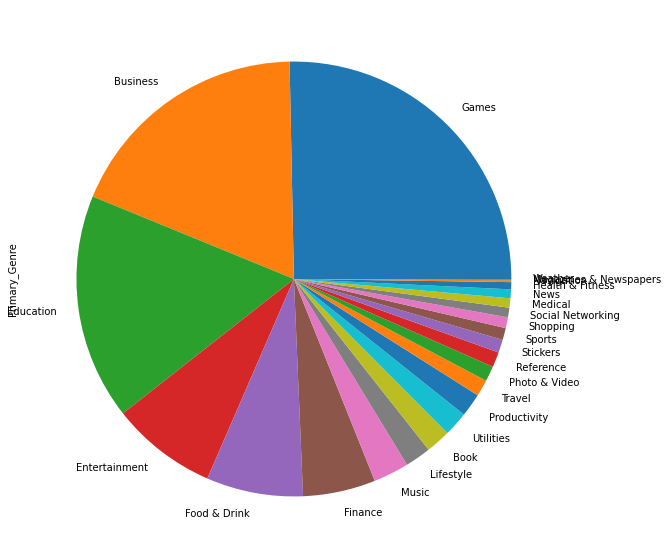

In [ ]:
# No of apps for each Genre

print(df['Primary_Genre'].value_counts())
pie = df['Primary_Genre'].value_counts().plot(kind = 'pie', figsize=(10, 10))

598607


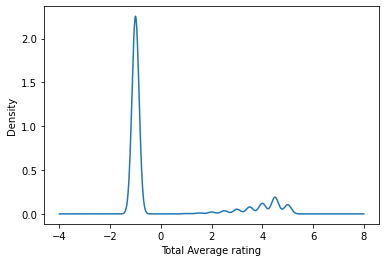

In [20]:
# Distribution for the total average rating
avg_rating = df['Total_Average_Rating'].plot.kde()
avg_rating.set_xlabel('Total Average rating')
# The spike at -1 shows some error as rate can't be -1 (needs to be fixed)
print(df[df['Total_Average_Rating']<0]['Total_Average_Rating'].count())

<AxesSubplot:ylabel='Density'>

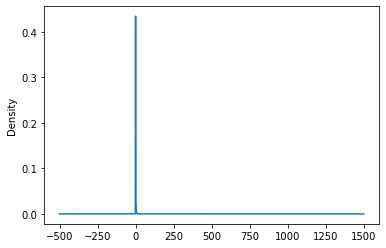

In [21]:
df['Price_USD'].plot.kde()

Enter Primary_Genre_enc:23
                                                    Title  ...  Primary_Genre
9342    Global Warming - How to Talk to a Climate Chan...  ...        Weather
25302                                  【必勝！無料】ＳＰＩ言語問題　問題集  ...        Weather
36267                                        Ag PhD Media  ...        Weather
36808                                     AgroClimate Pro  ...        Weather
42284                        ArabiaWeather - WeatherWatch  ...        Weather
...                                                   ...  ...            ...
564244                       Will Robots Take Over Today?  ...        Weather
569392                               ZeroWeather Forecast  ...        Weather
598276                            Open Hazards QuakeWorks  ...        Weather
683915           Bungee Stickmen - Classic Edition {FREE}  ...        Weather
738414                             Pixel Weather Forecast  ...        Weather

[247 rows x 3 columns]


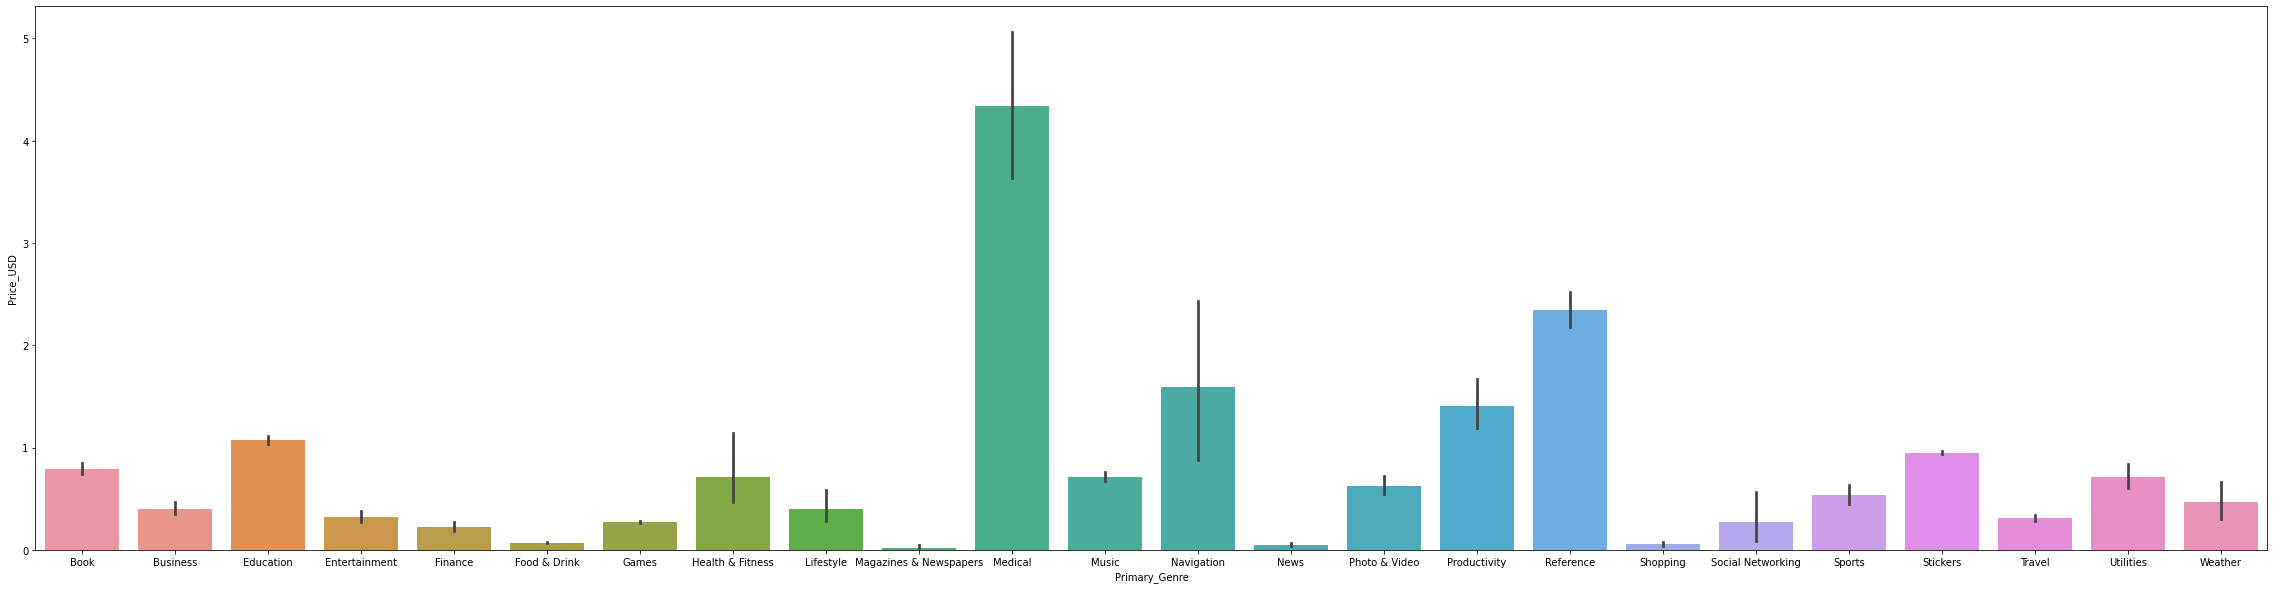

In [ ]:
# Gives the total price of apps for each Genre 
x=int(input('Enter Primary_Genre_enc:'))
df2=df[df['Primary_Genre_enc']==x]
print(df2[['Title','Price_USD','Primary_Genre']])
plt.subplots(figsize=(40,10))
sns.barplot(x='Primary_Genre',y='Price_USD',data=df)

In [ ]:
print("Are there missing values in our dataset ? ",df.isnull().values.any())

Are there missing values in our dataset ?  True


In [ ]:
print("The number of missing values in our dataset : ",df.isnull().values.sum())

The number of missing values in our dataset :  869211


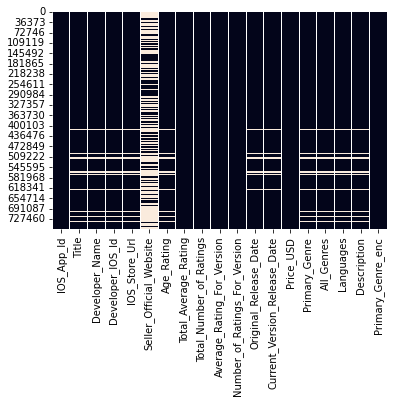

In [ ]:
# Heatmap for the null values 
# White color represents the null values
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Dropping the 'Seller_Official_Website' column as it contains more than 50% null values
df = df.drop('Seller_Official_Website', axis=1)
print('The remaining Columns are', len(df.columns))

The remaining Columns are 18


In [ ]:
# Removing all the rows with null values
df = df.dropna()
df.isna().sum()
print('The size after removing null values:',len(df))  

The size after removing null values: 724751


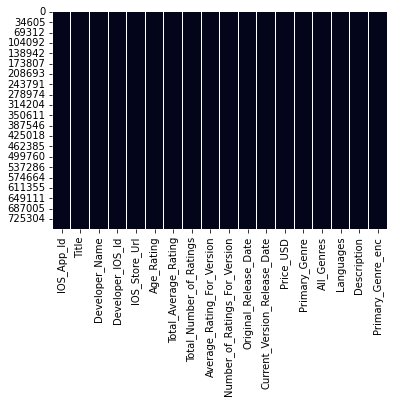

In [ ]:
# All the null values are removed
sns.heatmap(df.isnull(), cbar=False)

#### Correlation

In [ ]:
df.corr().style.background_gradient(cmap="Blues")                                                         
# There is no high correlation between features (except ids)

,IOS_App_Id,Developer_IOS_Id,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Price_USD,Primary_Genre_enc
IOS_App_Id,1.000000,0.613849,-0.301500,-0.028353,-0.009973,-0.029840,-0.045427,-0.046533
Developer_IOS_Id,0.613849,1.000000,-0.179295,-0.020203,-0.007967,-0.023635,-0.039605,-0.028618
Total_Average_Rating,-0.301500,-0.179295,1.000000,0.041821,0.018980,0.083786,0.007202,0.066077
Total_Number_of_Ratings,-0.028353,-0.020203,0.041821,1.000000,-0.000172,0.393404,-0.001147,0.005558
Average_Rating_For_Version,-0.009973,-0.007967,0.018980,-0.000172,1.000000,0.078373,-0.000483,0.001179
Number_of_Ratings_For_Version,-0.029840,-0.023635,0.083786,0.393404,0.078373,1.000000,-0.002108,0.008303
Price_USD,-0.045427,-0.039605,0.007202,-0.001147,-0.000483,-0.002108,1.000000,0.008495
Primary_Genre_enc,-0.046533,-0.028618,0.066077,0.005558,0.001179,0.008303,0.008495,1.000000


In [ ]:
# Encoding 'Primary_Genre' from categorical to numerical
df['Primary_Genre'] = df['Primary_Genre'].astype('category')
df["Primary_Genre_enc"] = df["Primary_Genre"].cat.codes
df.loc[:, ['Primary_Genre_enc', 'Primary_Genre']].head()

,Primary_Genre_enc,Primary_Genre
0,6,Games
1,2,Education
2,2,Education
3,2,Education
4,0,Book


In [ ]:
b=df.groupby(['Price_USD'])
b.first()
df.max()

IOS_App_Id                                                              1488843534
Title                                                     ￥０使い放題の出会い！ID交換もし放題の出会い！
Developer_Name                                                         �zg�r ?EV?K
Developer_IOS_Id                                                       1.50133e+09
IOS_Store_Url                    https://apps.apple.com/us/app/zzzz-zombies/id8...
Age_Rating                                                           Not yet rated
Total_Average_Rating                                                             5
Total_Number_of_Ratings                                                1.20361e+07
Average_Rating_For_Version                                             2.19323e+06
Number_of_Ratings_For_Version                                               257689
Original_Release_Date                                         2020-02-19T01:39:14Z
Current_Version_Release_Date                                  2020-03-04T12:25:49Z
Pric

In [ ]:
print("types of genres")
gen=df.groupby(["Primary_Genre"])["Primary_Genre"].count()
genr=list(gen)
print(gen)

types of genres
Primary_Genre
Book                       13370
Business                  134008
Education                 121714
Entertainment              57113
Finance                    39090
Food & Drink               52099
Games                     183498
Health & Fitness            3834
Lifestyle                  13955
Magazines & Newspapers       399
Medical                     5016
Music                      19148
Navigation                  1020
News                        4780
Photo & Video               8212
Productivity               12555
Reference                   8165
Shopping                    5850
Social Networking           5166
Sports                      6413
Stickers                    7042
Travel                      8947
Utilities                  13110
Weather                      247
Name: Primary_Genre, dtype: int64


### Machine Learning


  Model is trained to predict the "primary genre" based on the "desscription" given. Trained on 90% of the data and tested with the 10% data 

In [ ]:
new_df = df.loc[:, ['Primary_Genre_enc', 'Description']]
new_df.head()
eng_descsription = df['Description'].astype('str').map(english)

# Splitting our dataframes to compare them
ios_english = new_df[eng_descsription]
print('There are', len(ios_english), 'rows in English')
ios_english.head()

There are 471039 rows in English


,Primary_Genre_enc,Description
0,6,This application helps you practice cursive sc...
5,3,"aComic is an online novel application, always ..."
6,2,Al Musanna College of Technology Mobile applic...
7,0,"You have booked your next trip with ad gentes,..."
8,0,the best mandals coloring book for adults is n...


In [ ]:
tokenizer = Tokenizer(num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token='<oov>')
ios_english['Description'] = ios_english['Description'].astype('str')
tokenizer.fit_on_texts(ios_english['Description'])
sequence = tokenizer.texts_to_sequences(ios_english['Description'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
maxlen = max([len(x) for x in sequence])
pad_type = 'post'
trunc_type = 'post'
padded_sequence = pad_sequences(sequence,
                                padding=pad_type,
                                truncating=trunc_type,
                                maxlen=int(maxlen/2))

In [ ]:
print(padded_sequence.shape)

(471039, 434)


In [ ]:
# get_dummies will give the one hot encoding of the primary genre
y = pd.get_dummies(ios_english['Primary_Genre_enc'])

# splitting data into training and testing with test set of probability 0.1
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, y,
                                                    test_size=0.4,
                                                    random_state=SEED)
print('X_train: {}\nX_test: {}\ny_train: {}\ny_test: {}'.format(
      X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (282623, 434)
X_test: (188416, 434)
y_train: (282623, 24)
y_test: (188416, 24)


In [ ]:
# Artificial Neural Network with 4 layers 
def ANN():
  model = tf.keras.Sequential([                       
                       tf.keras.layers.Dense(248, input_shape = (X_train.shape[1],), activation='relu'),
                       tf.keras.layers.Dropout(0.2),
                       tf.keras.layers.Dense(124, activation='tanh'),
                       tf.keras.layers.Dense(62, activation='relu'),
                       tf.keras.layers.Dense(24, activation='relu')
  ])
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  return model
model1 = ANN()
model1.fit(X_train, y_train, 
          validation_data = (X_test, y_test),
          epochs=2,
          batch_size=12)

Epoch 1/2
23552/23552 [==============================] - 81s 3ms/step - loss: 4.4237 - val_loss: 4.3766
Epoch 2/2
23552/23552 [==============================] - 83s 4ms/step - loss: 4.3782 - val_loss: 4.3752


In [ ]:
# a simple multi layered perceptron
model2 = MLPRegressor(hidden_layer_sizes=(64,32),activation="logistic" ,random_state=SEED, max_iter=20)
model2.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(64, 32), max_iter=20,
             random_state=42)

In [ ]:
# Linear Regression Model
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction with all 3 models
preds1 = model1.predict(X_test) 
preds2 = model2.predict(X_test)
preds3 = model3.predict(X_test)

n = 10
def max_ind(li):
  return list(li).index(max(li))+1
preds1 = map(max_ind, preds1)
preds2 = map(max_ind, preds2)
preds3 = map(max_ind, preds3)
print(list(preds1)[n])
print(list(preds2)[n])
print(list(preds3)[n])
print(list(y_test)[n])

6
10
